In [1]:
!pip install opendatasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


In [4]:
od.download('https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ghfg
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


100%|██████████| 21.4M/21.4M [00:00<00:00, 318MB/s]

In [64]:
data = pd.read_csv('/content/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv')

In [65]:
data.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [66]:
data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434205.000000     436065.000000  439679.000000   416480.000000   
mean             4.347919          4.382649       7.022983        1.702691   
std              8.688912          8.387475       1.502425        0.107177   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403054.000000  396326.000000  
mean           83.074470      28.529842  
std            21.448173       6.554889  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.750000  
max           292.570000      99.640000

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

Is

## **Preprocessing**

In [68]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory                   9079
HeightInMeters               28652
WeightInKilograms            42078
BMI                          48806
AlcoholDrinkers              46574
HIVTesting                   66127
FluVaxLast12                 47121
PneumoVaxEver                77040
TetanusLast10Tdap            82516
HighRiskLastYear             50623
CovidPos                     50764
dtype: int64

In [69]:
data.duplicated().sum()

np.int64(157)

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data.shape

(444975, 40)

In [72]:
low_missing = ["GeneralHealth", "HadStroke", "HadAsthma", "HadDiabetes"]
for col in low_missing:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

In [73]:
def random_impute(series):
    values = series.dropna().unique()

    return series.apply(lambda x: np.random.choice(values) if pd.isna(x) else x)

medium_high_missing = ["DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating","SmokerStatus", "ECigaretteUsage", "ChestScan", "RaceEthnicityCategory",
                                       "AlcoholDrinkers", "HIVTesting", "FluVaxLast12","HighRiskLastYear", "CovidPos",'RemovedTeeth','DifficultyErrands','DifficultyDressingBathing',
                       'DifficultyWalking','HadArthritis','HadKidneyDisease','DifficultyErrands','DifficultyDressingBathing','DifficultyWalking','RemovedTeeth','LastCheckupTime']

for col in medium_high_missing:
    if col in data.columns:
        data[col] = random_impute(data[col])


In [74]:
data["BMI"] = data["BMI"].fillna(data["BMI"].median())

In [75]:
data.dropna(subset =["HeightInMeters", "WeightInKilograms", "BMI", "AgeCategory",'PhysicalActivities','HadKidneyDisease',
                       'HadCOPD','HadSkinCancer','HadAngina','HadHeartAttack','HadDepressiveDisorder','HadArthritis'] ,inplace=True)

In [76]:
data.drop(['PneumoVaxEver','TetanusLast10Tdap'], axis=1, inplace=True)

# **Visualization**

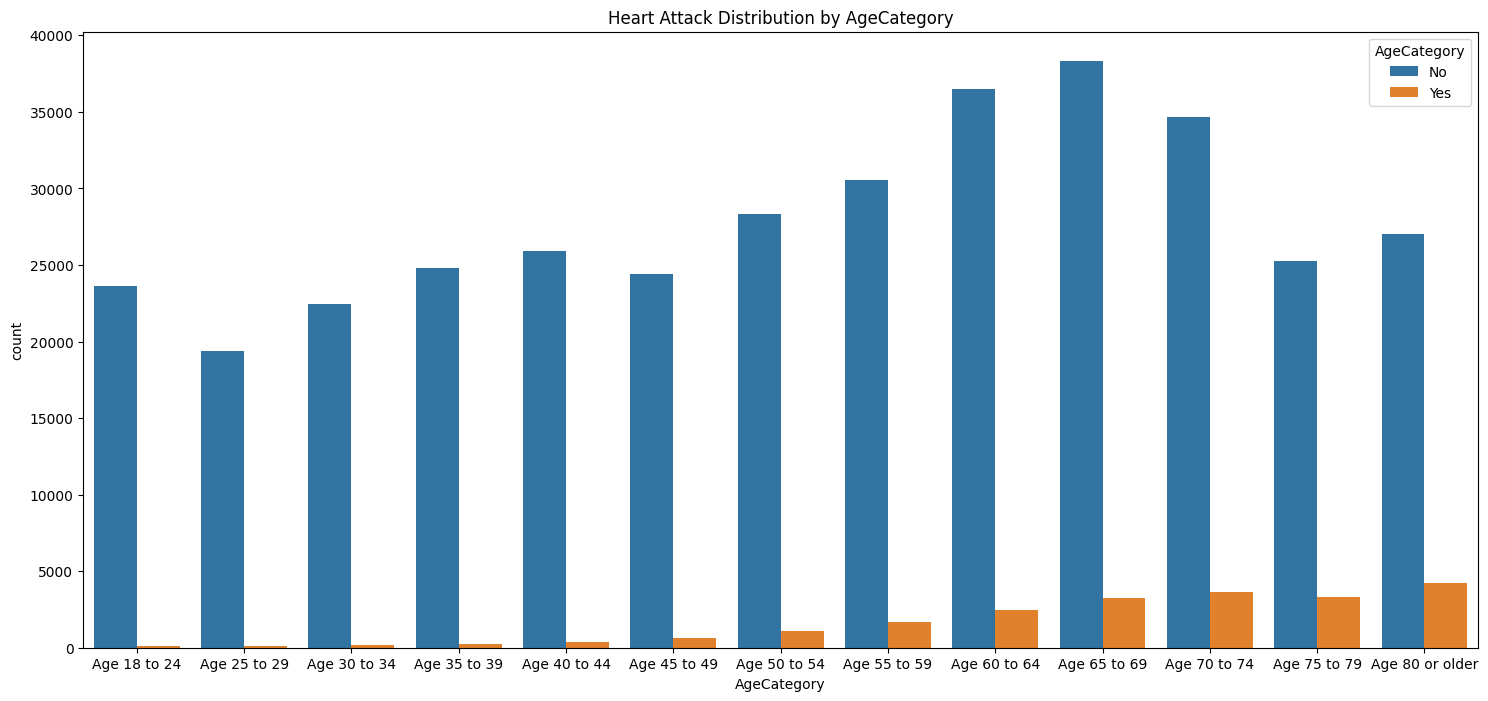

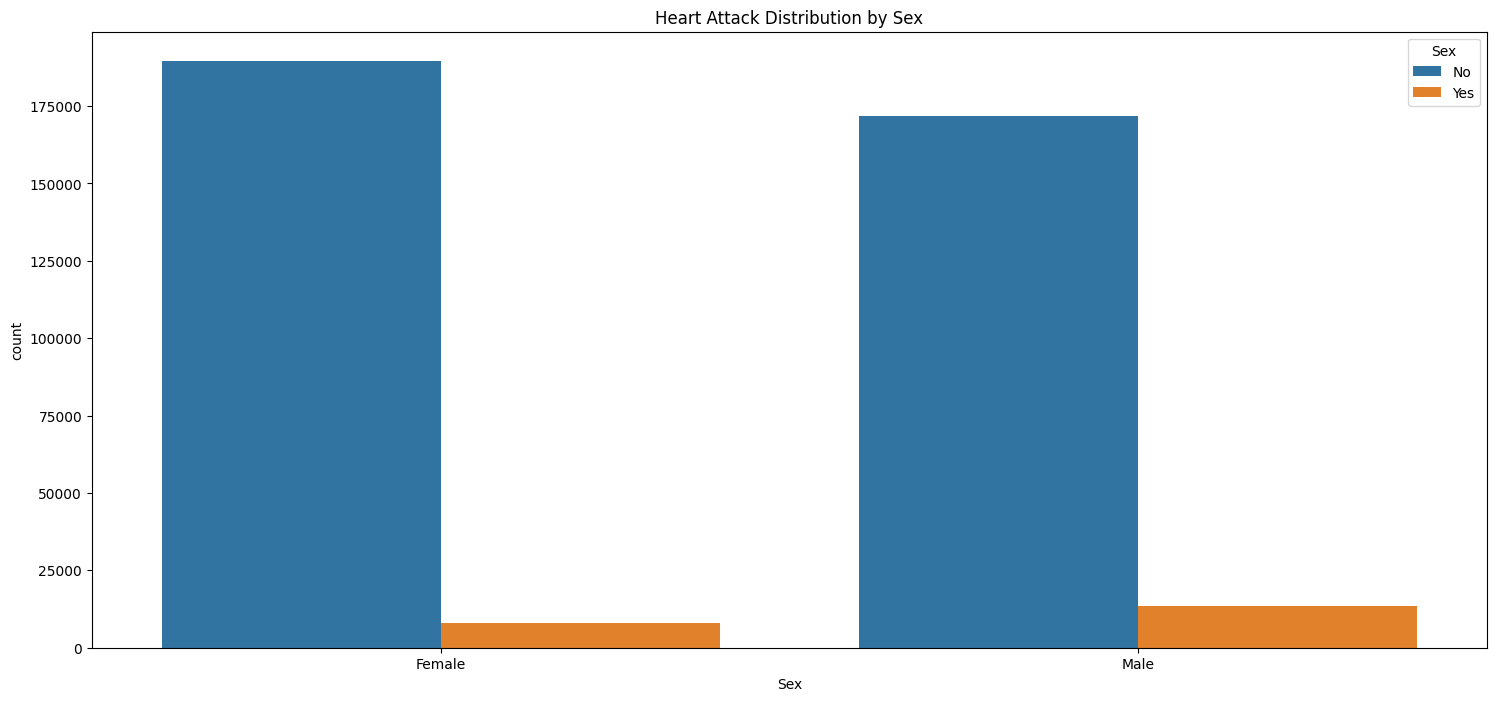

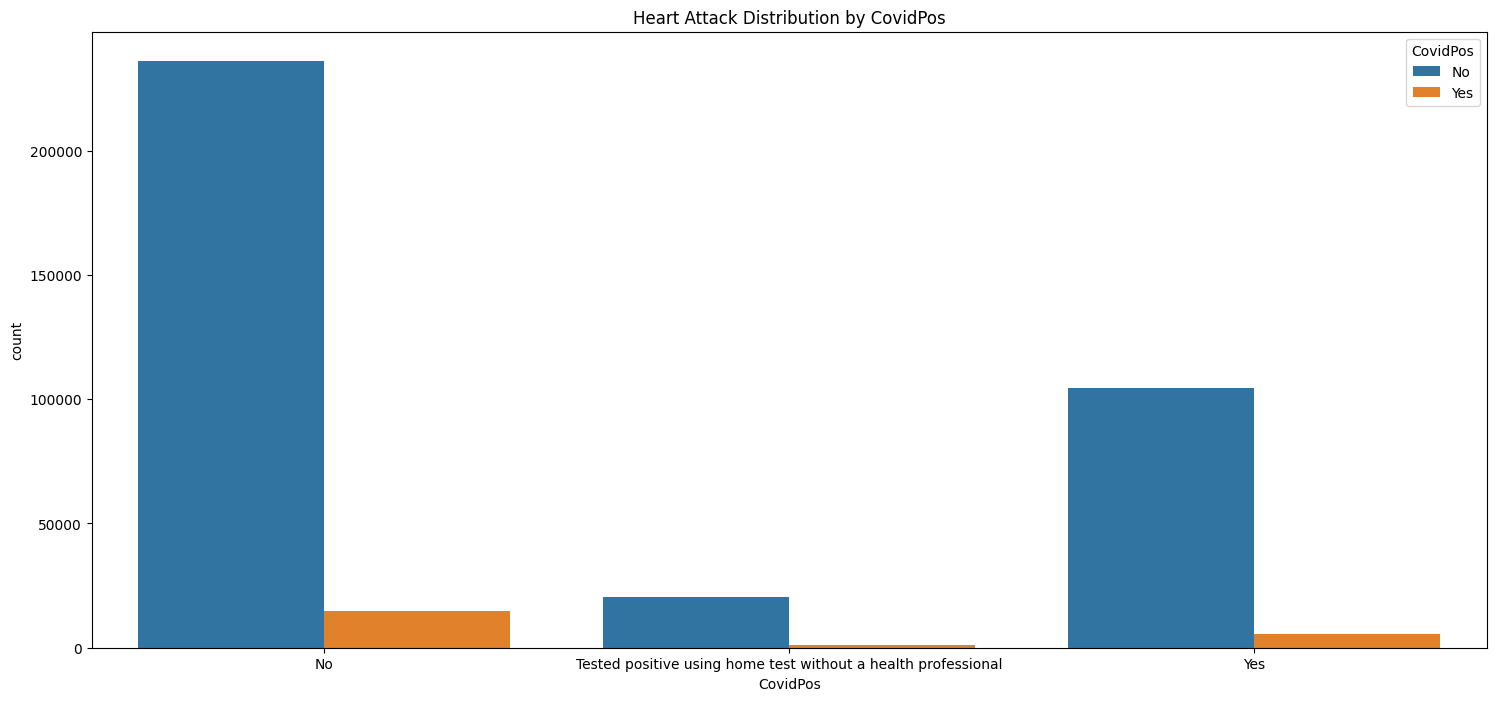

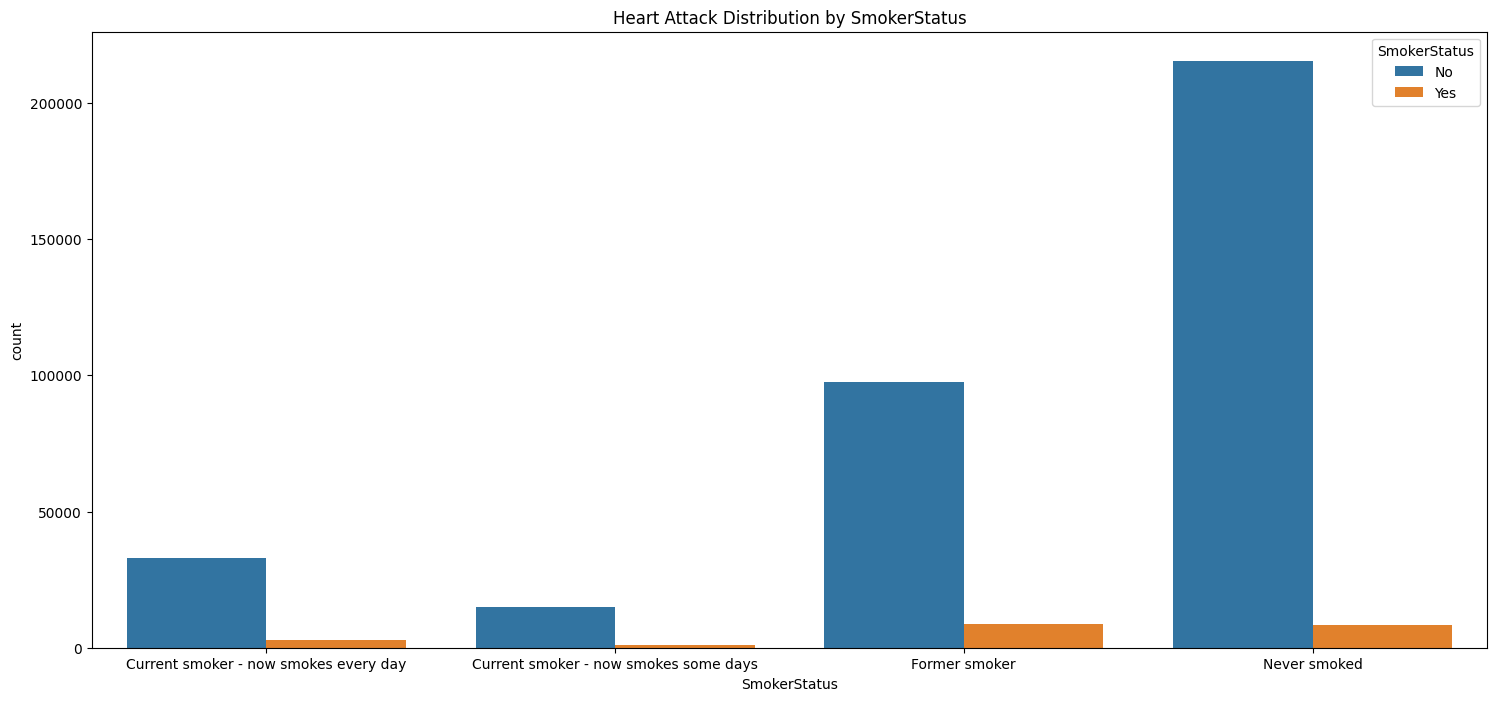

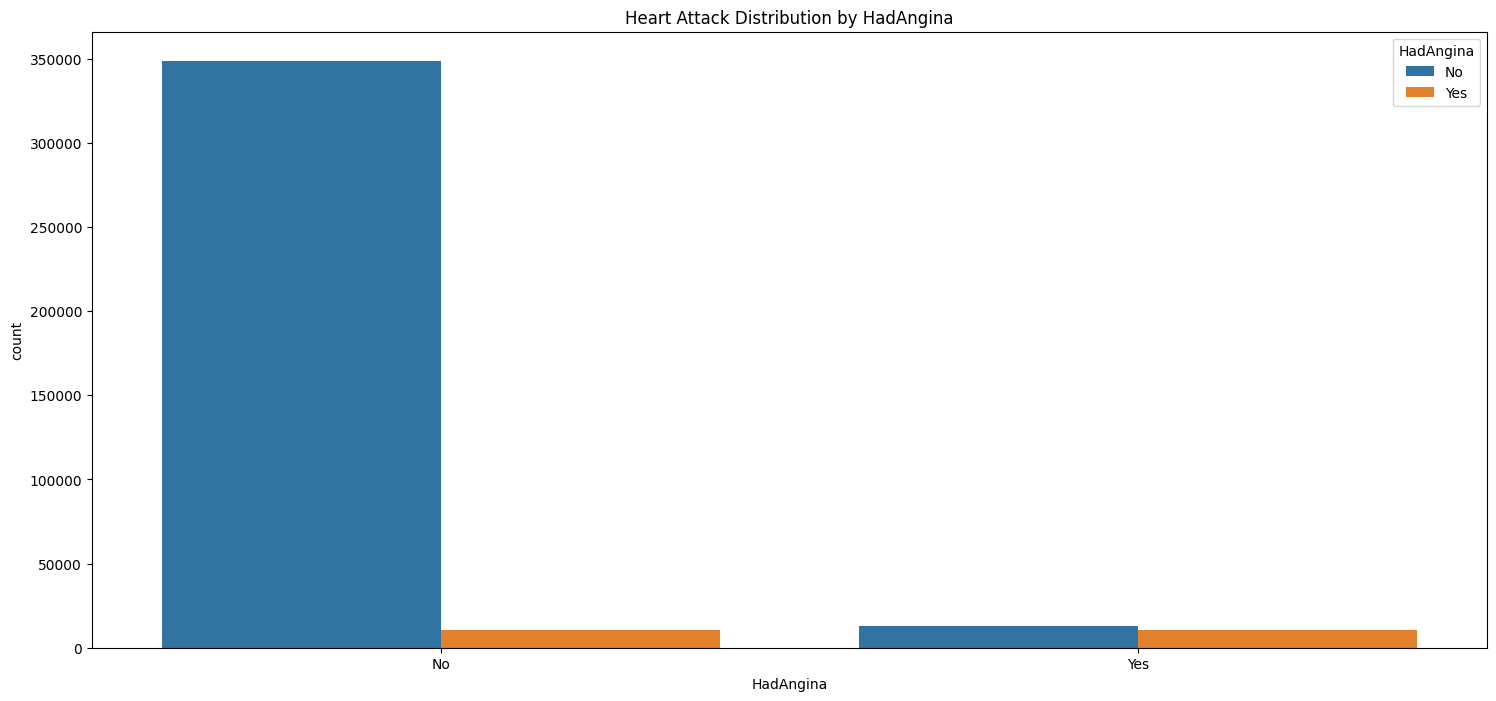

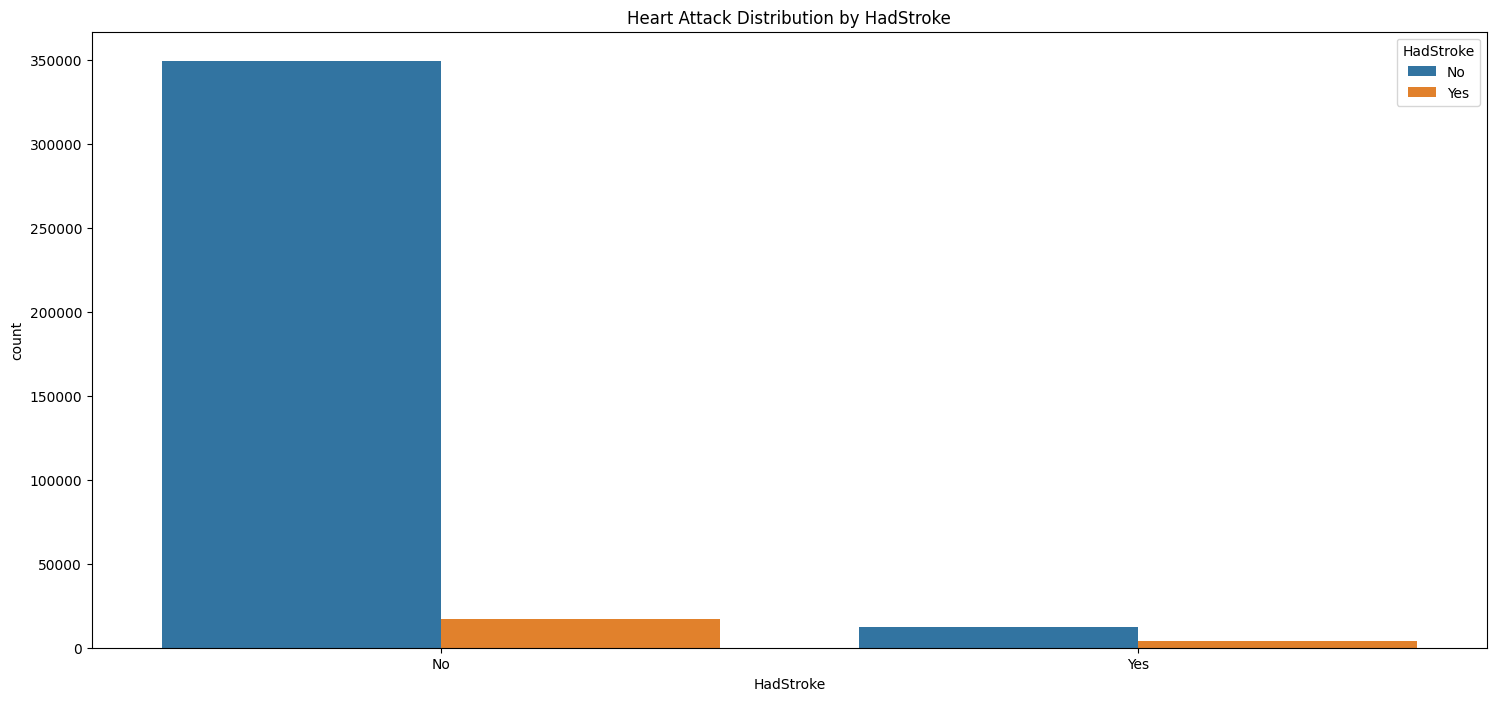

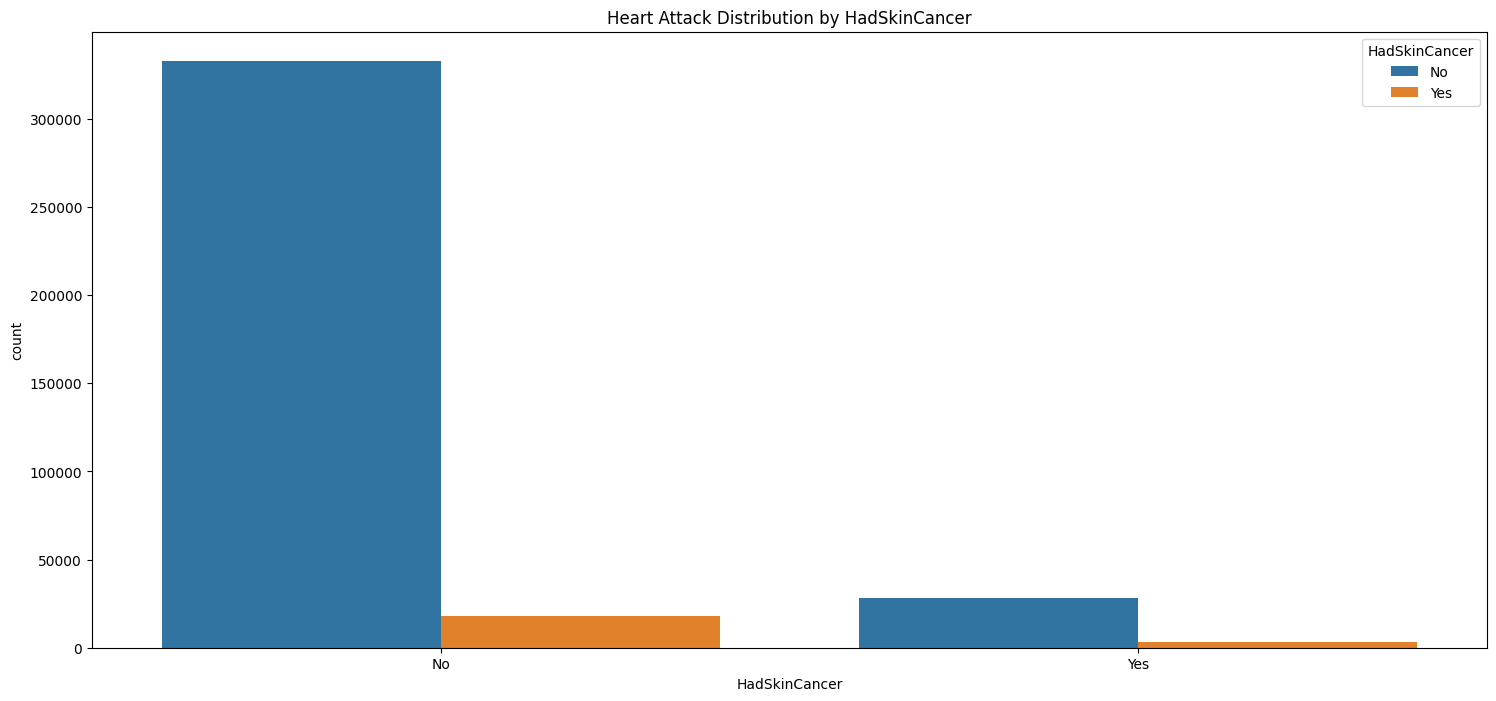

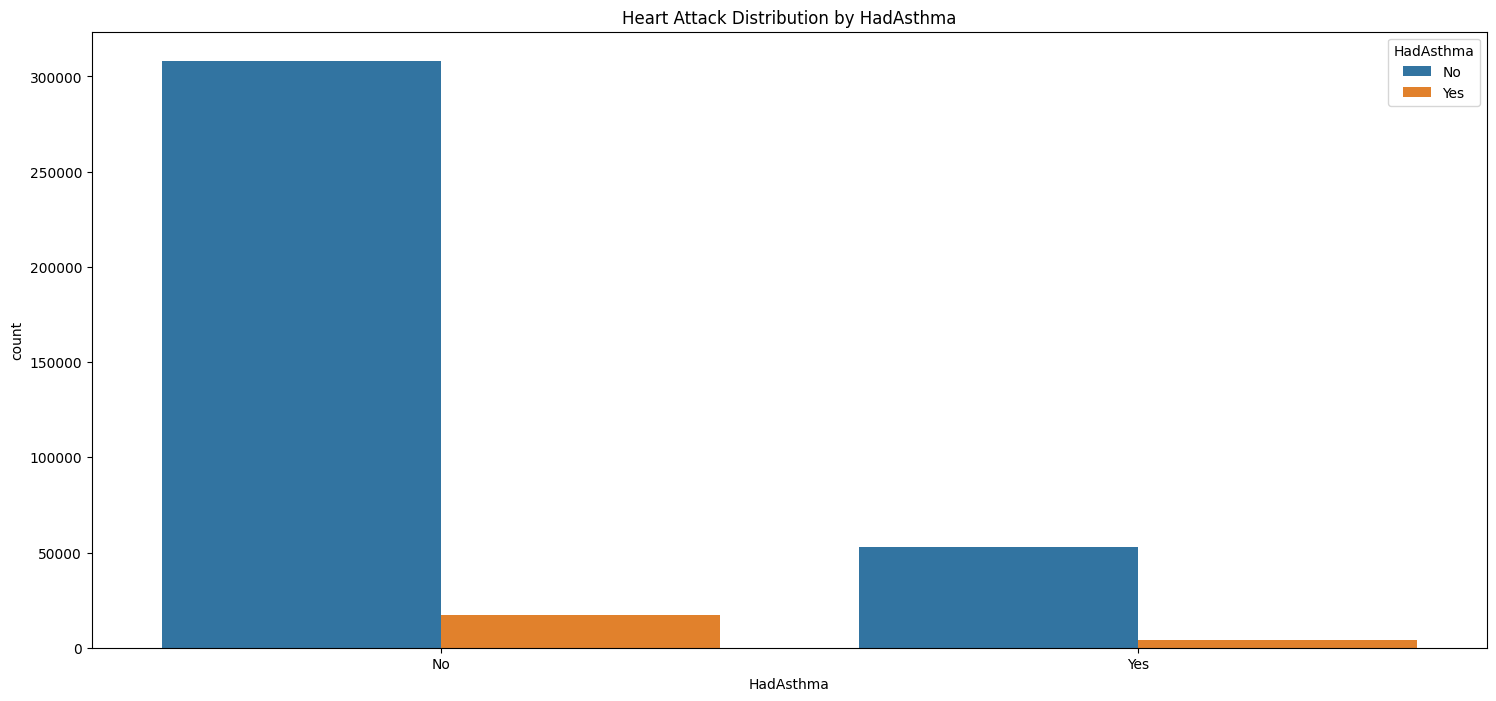

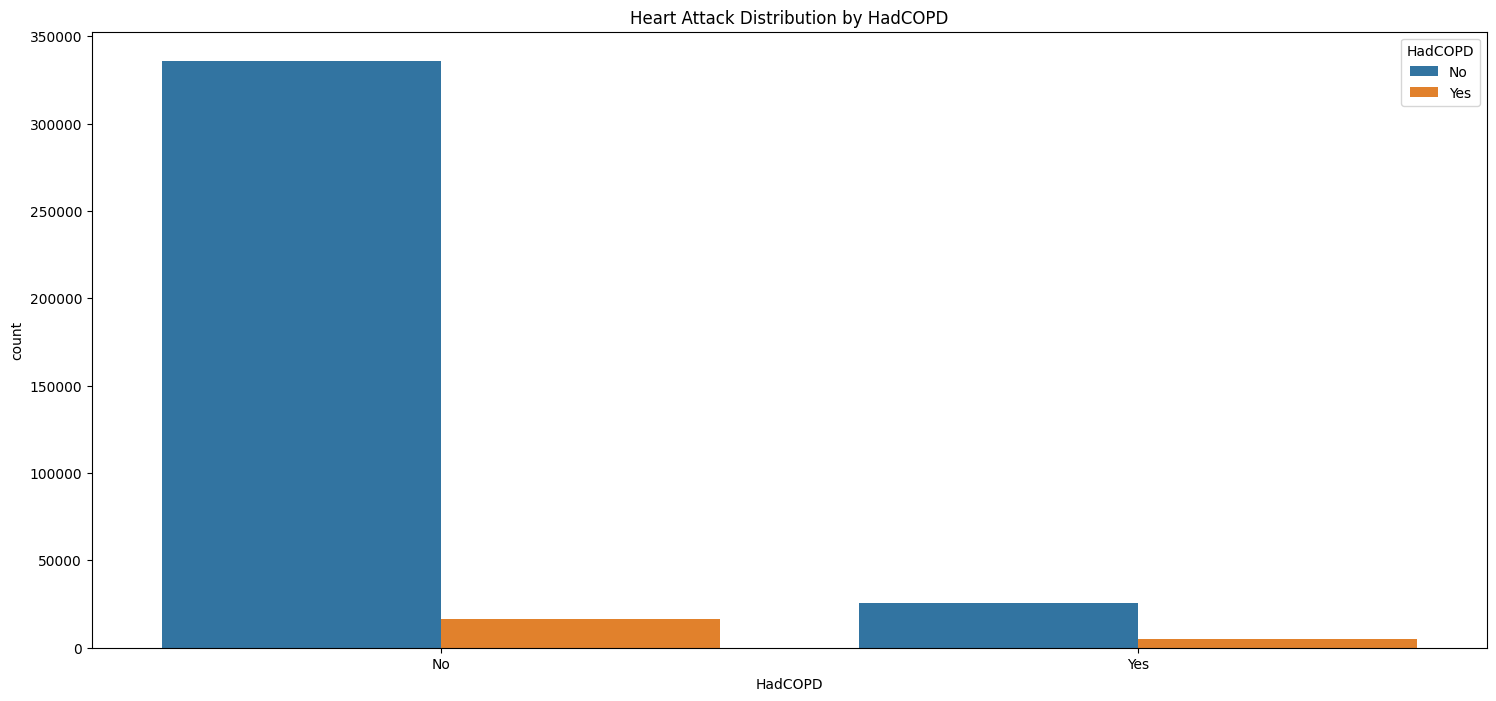

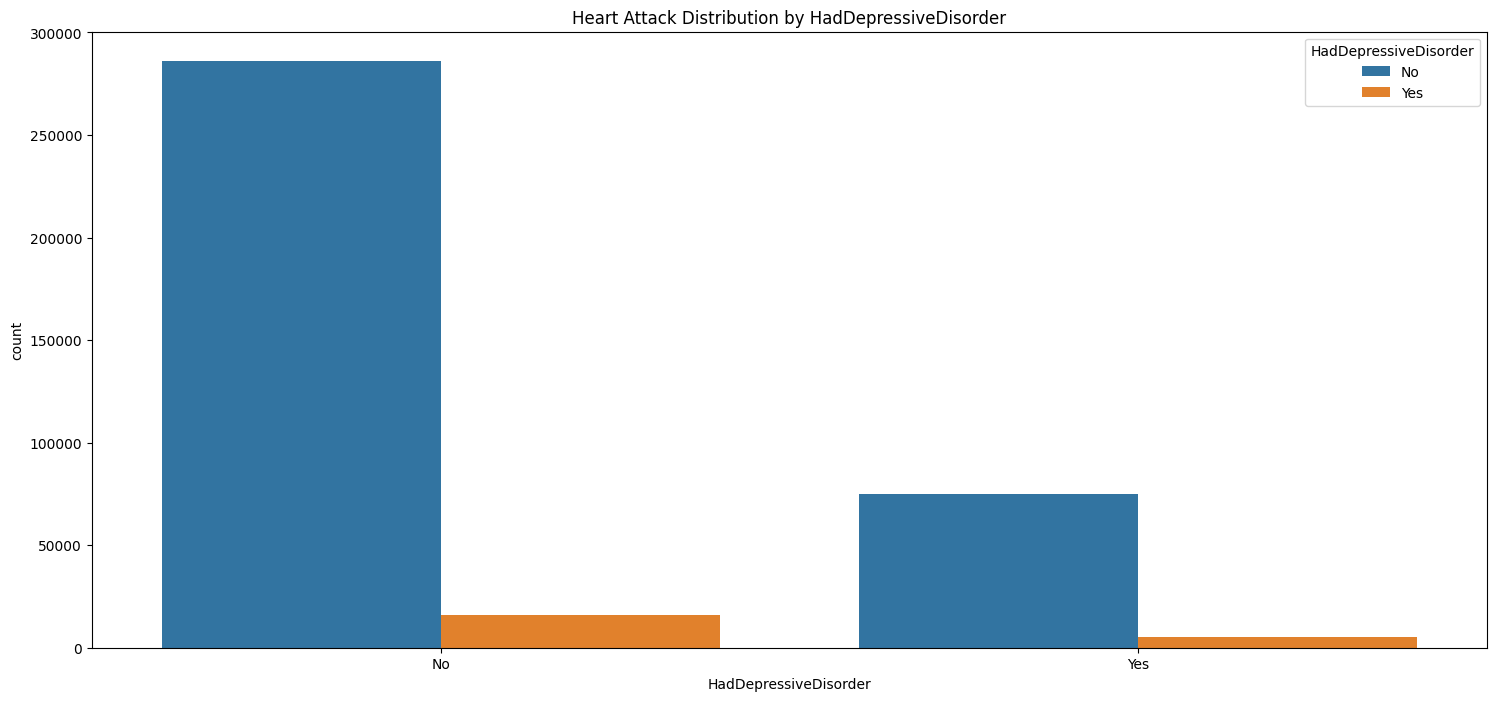

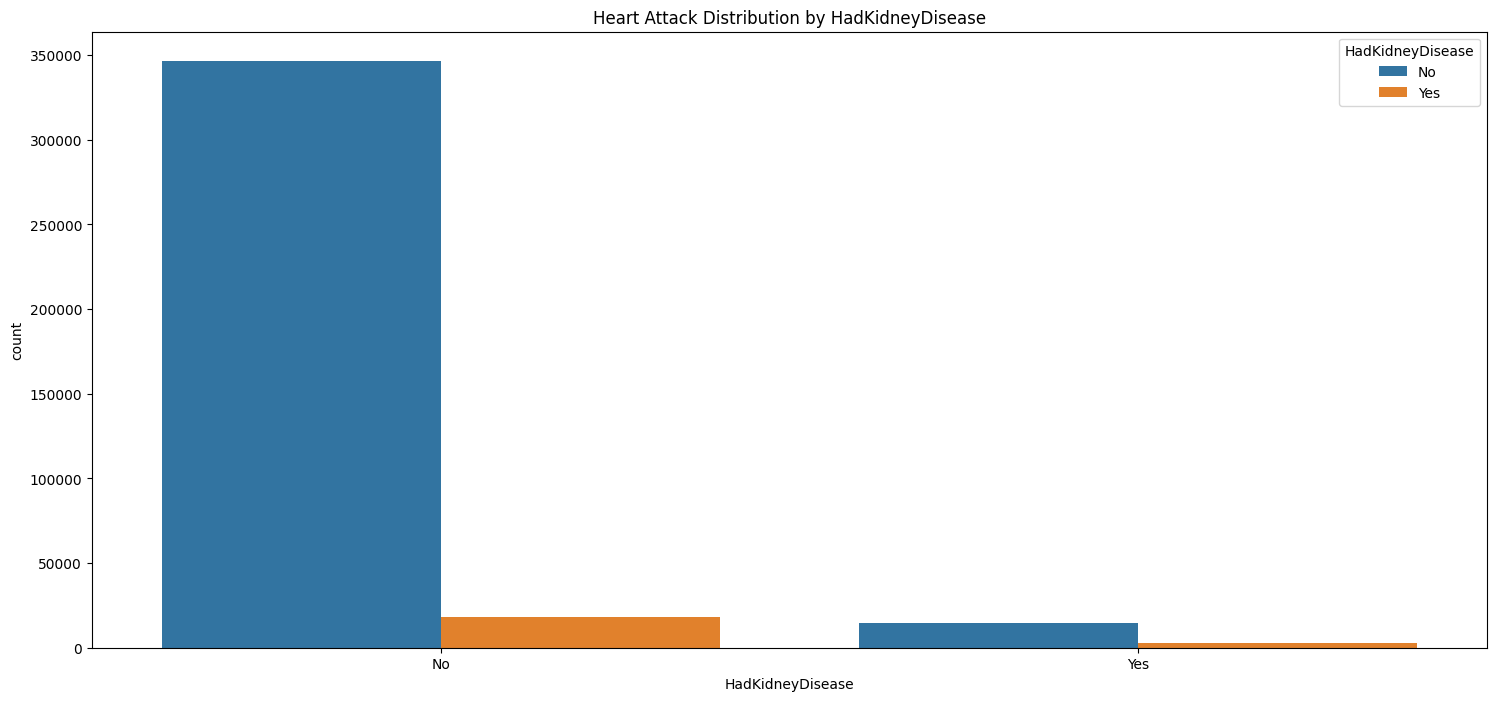

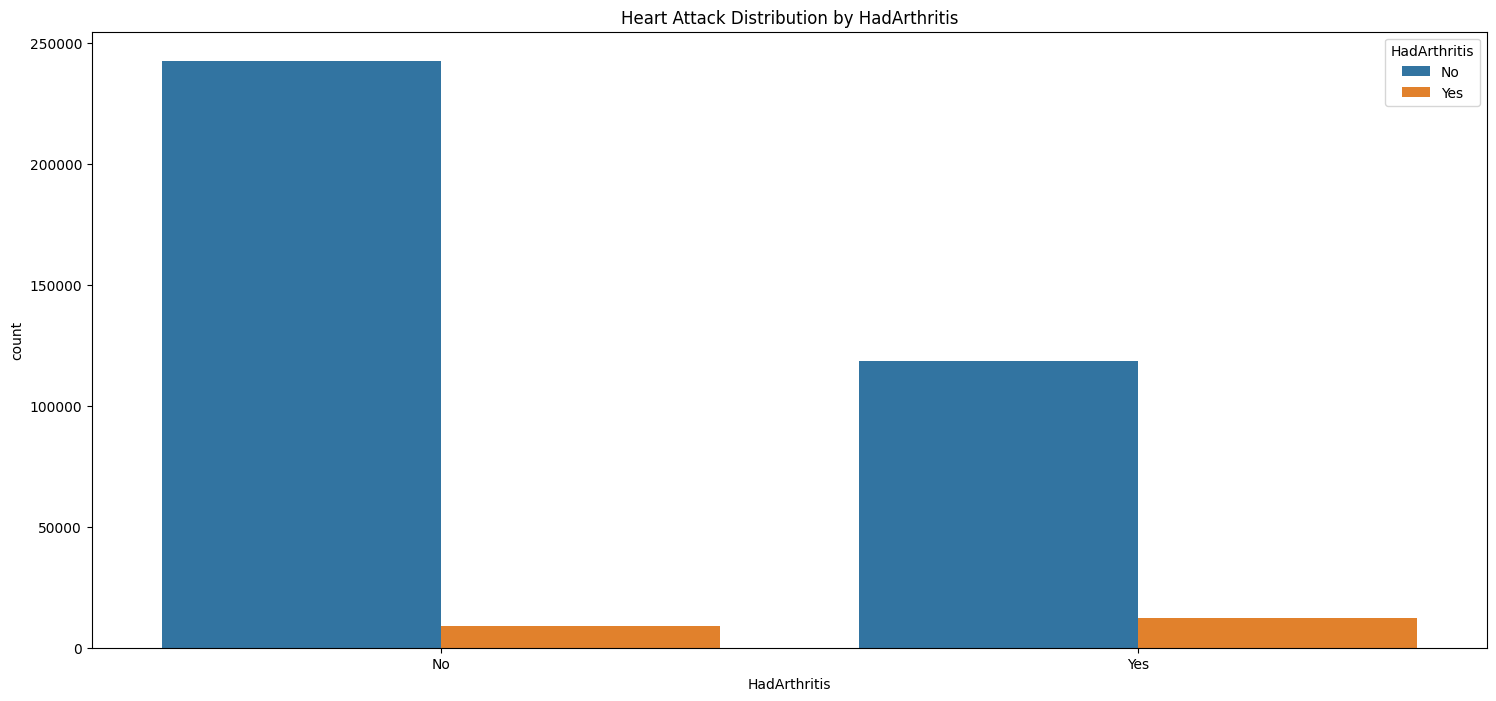

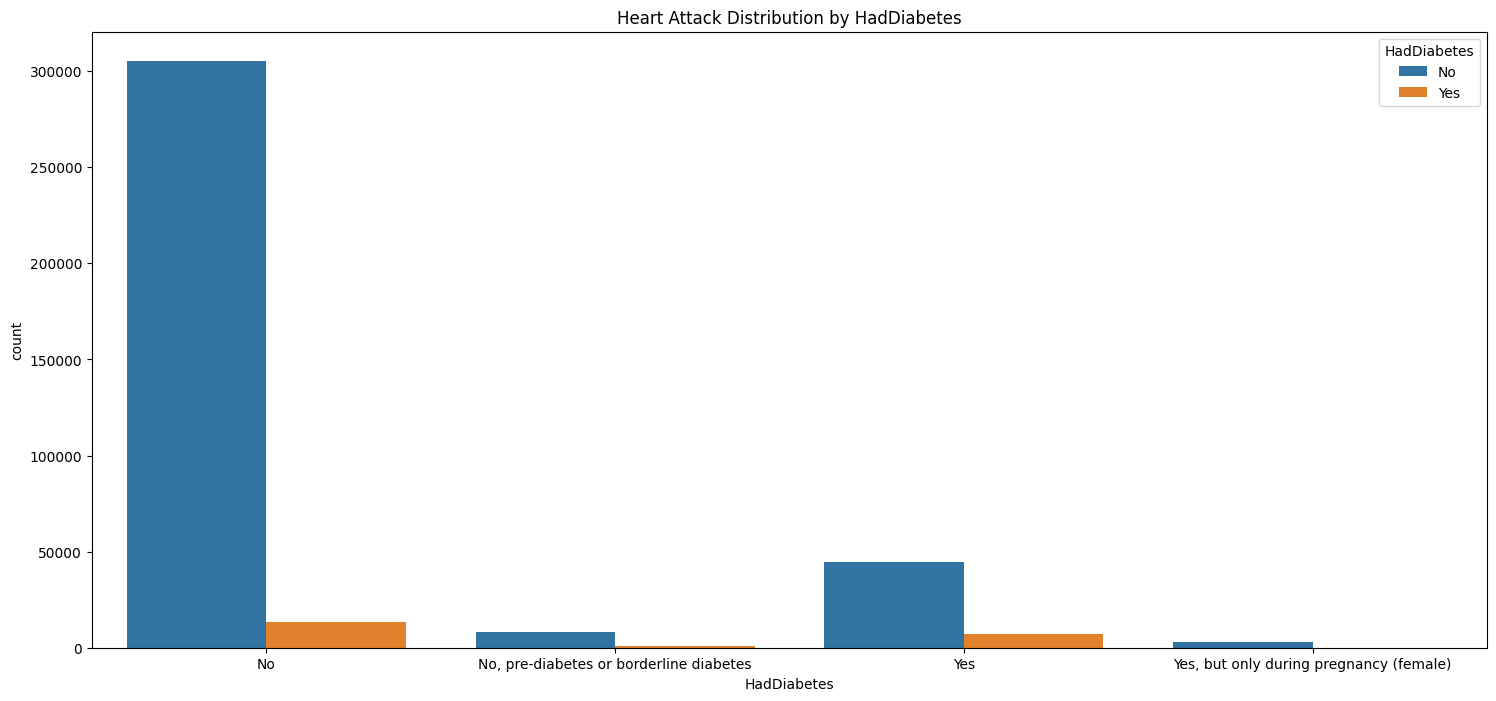

In [77]:
data_col = ['AgeCategory','Sex','CovidPos','SmokerStatus','HadAngina','HadStroke','HadSkinCancer','HadAsthma','HadCOPD',
                'HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes']

for col in data_col:
  plt.figure(figsize=(18, 8))
  sns.countplot(x= col, hue='HadHeartAttack', data=data,
             order=sorted(data[col].unique()))
  plt.title(f'Heart Attack Distribution by {col}')
  plt.xticks()
  plt.legend(title=f'{col}')
  plt.show()

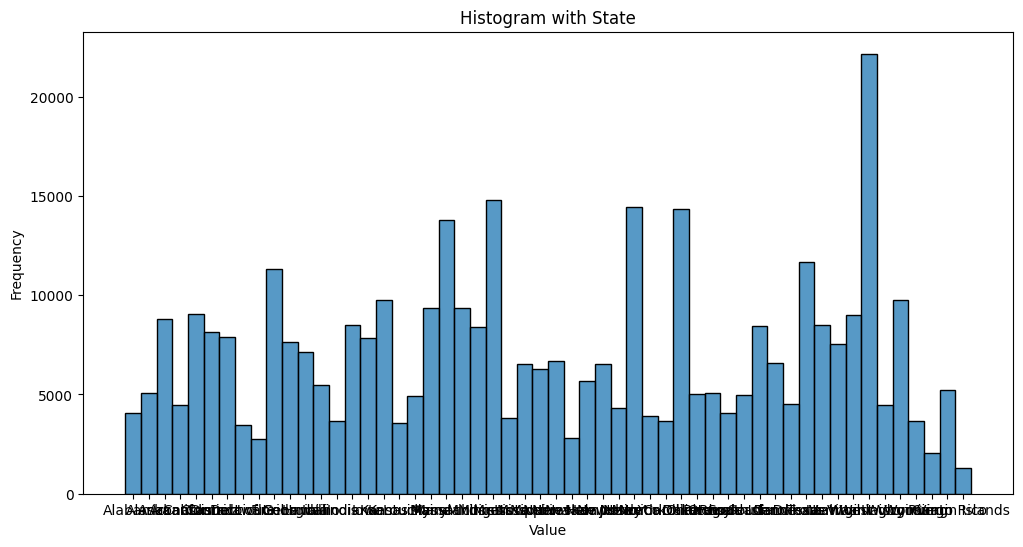

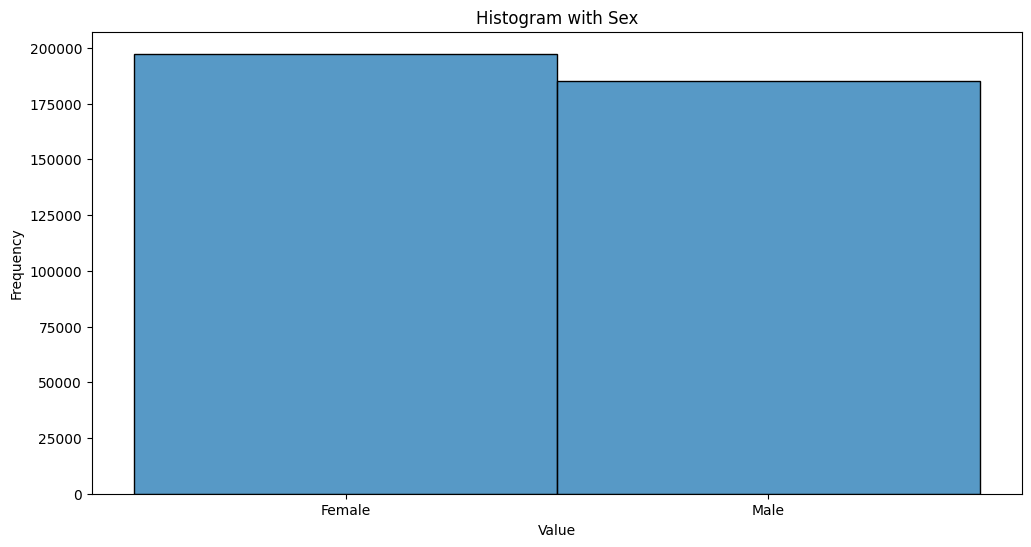

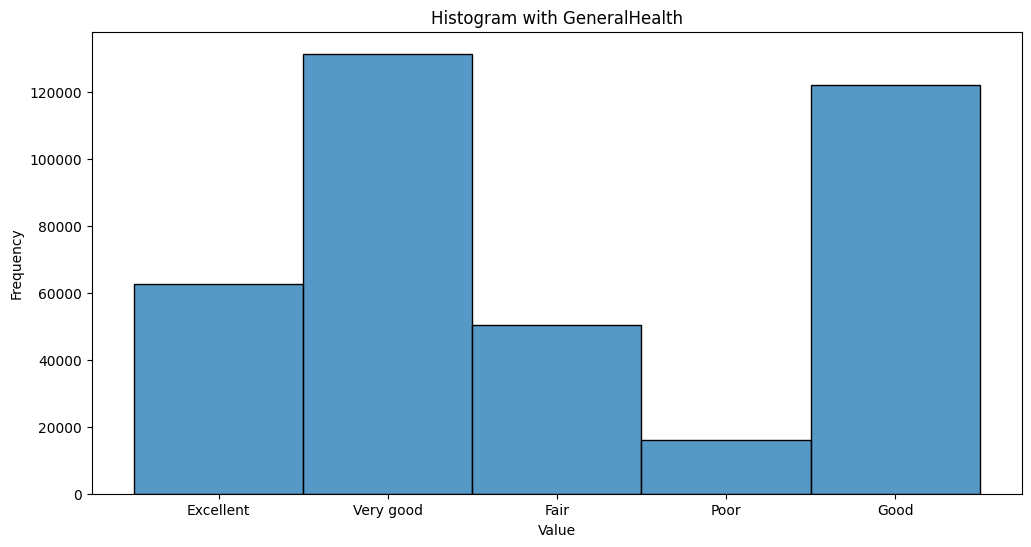

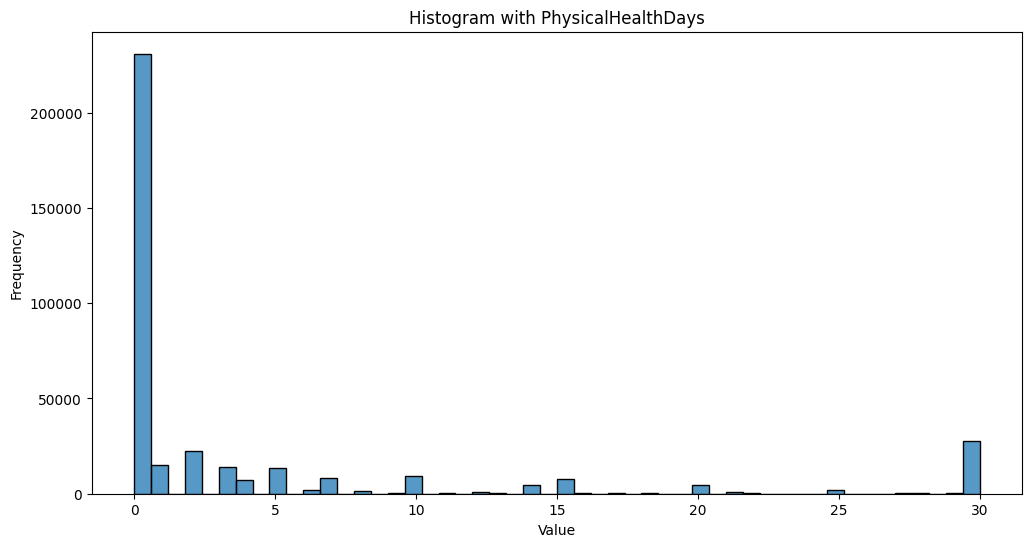

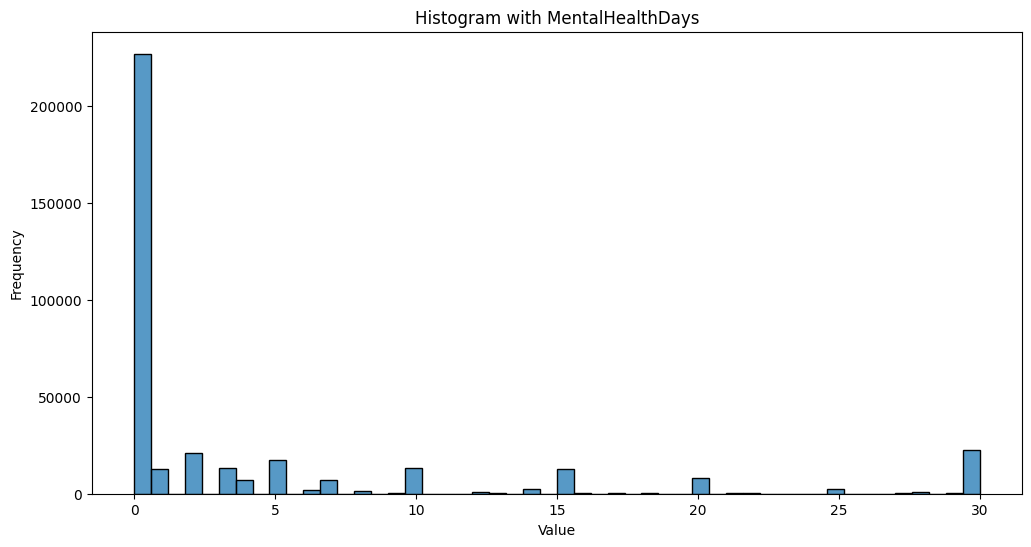

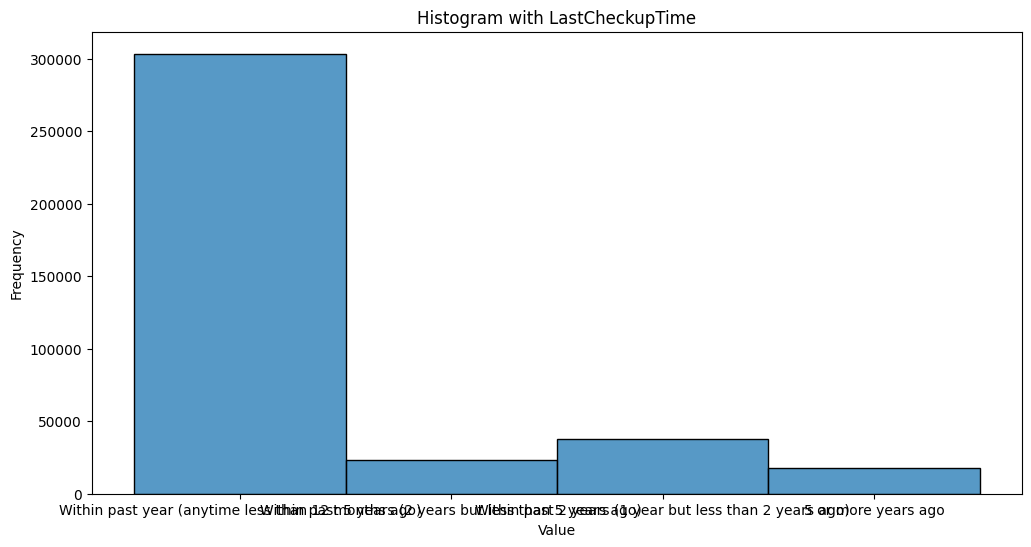

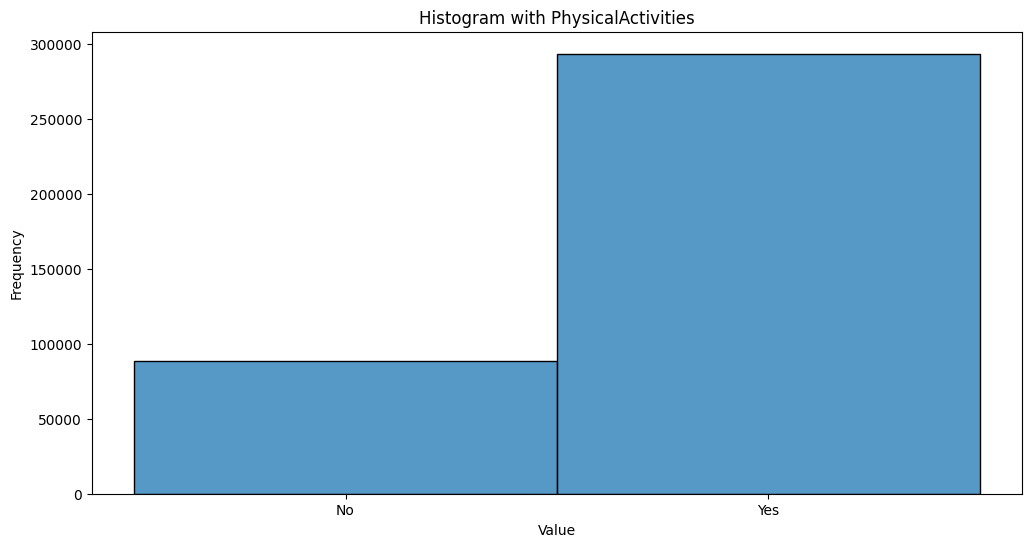

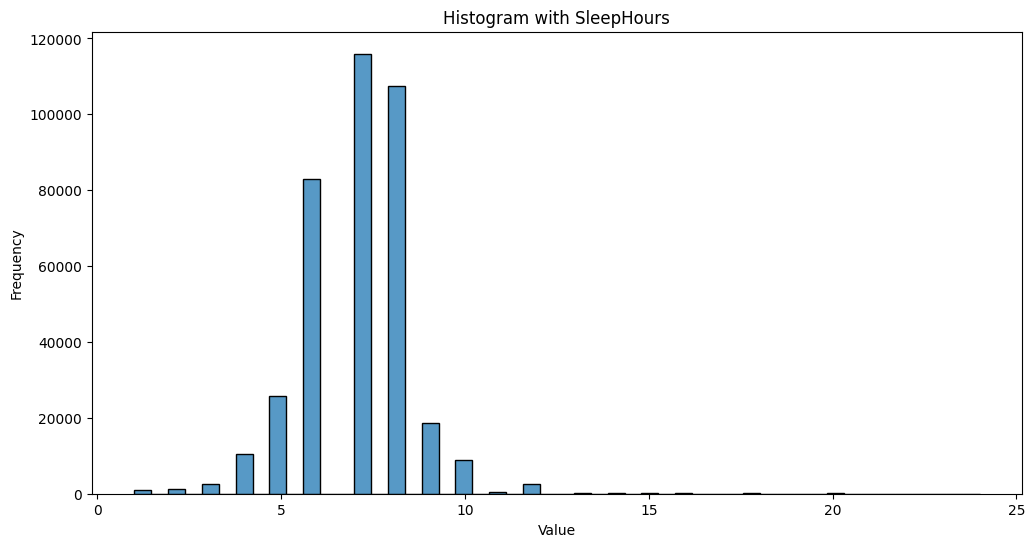

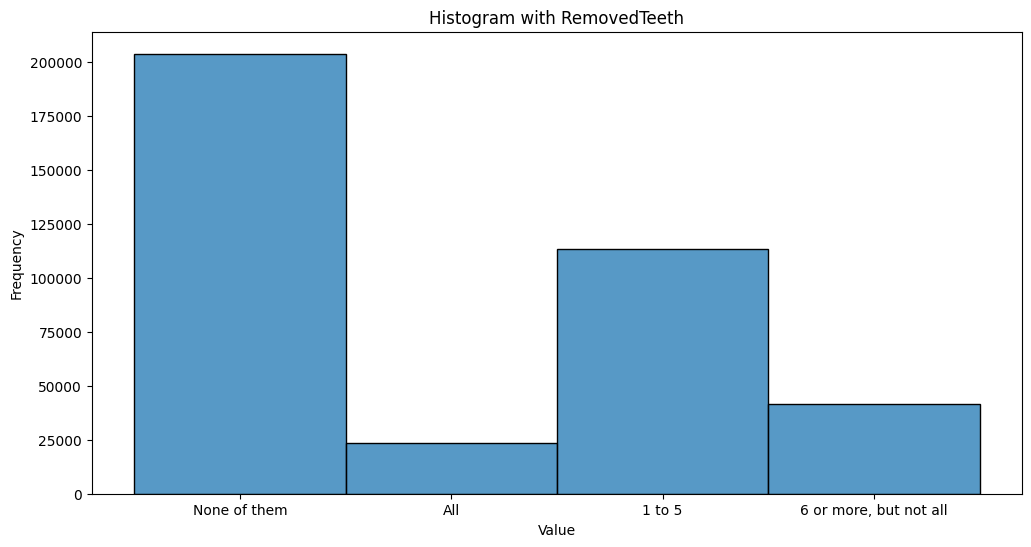

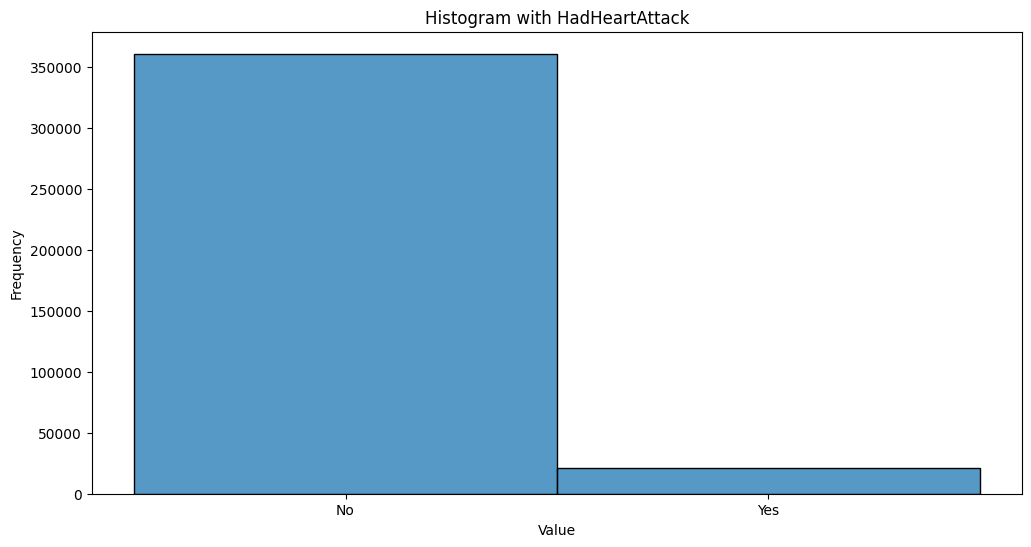

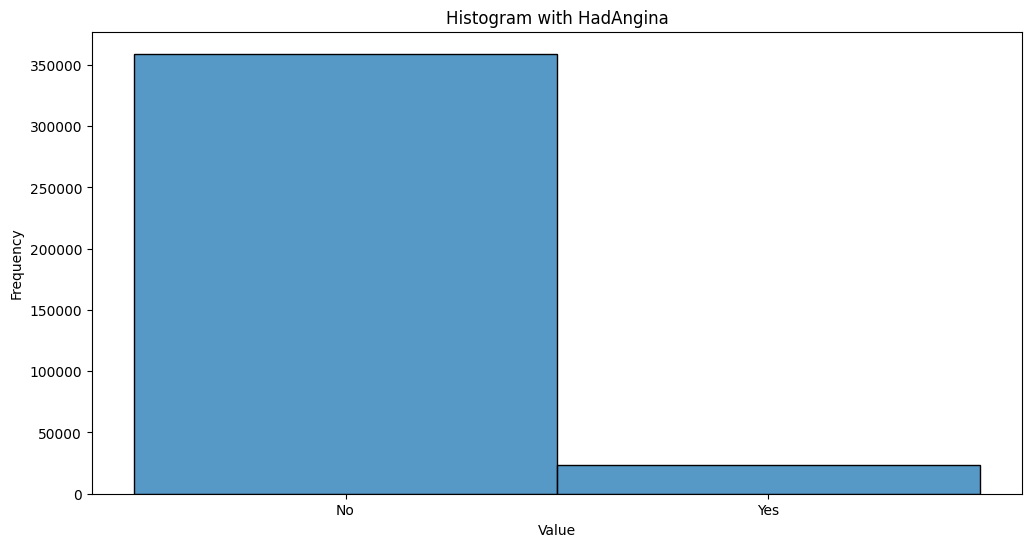

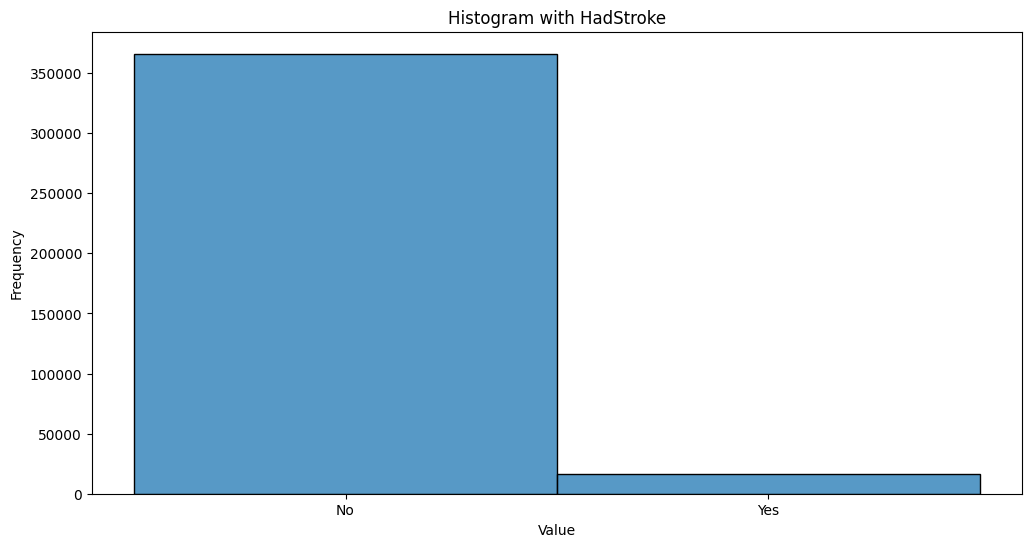

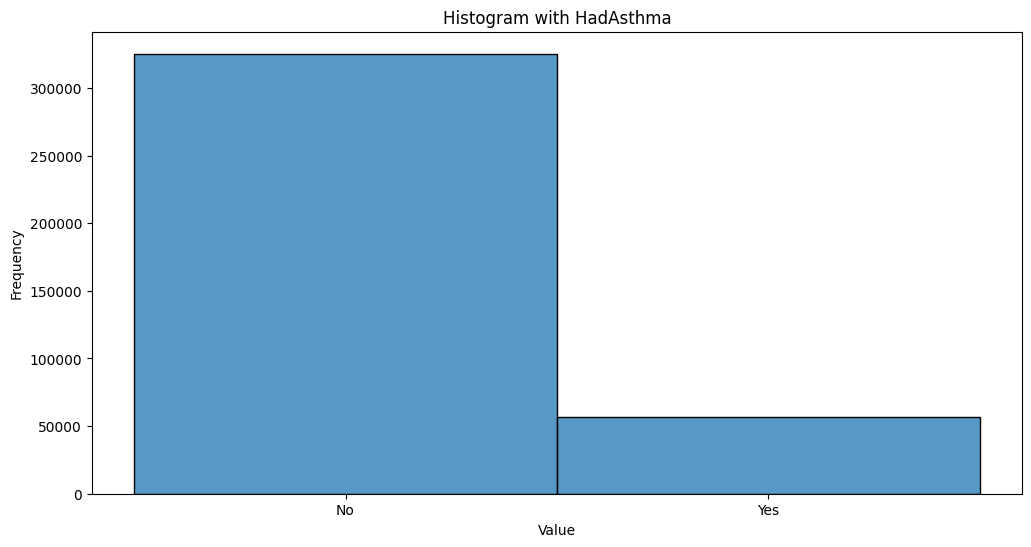

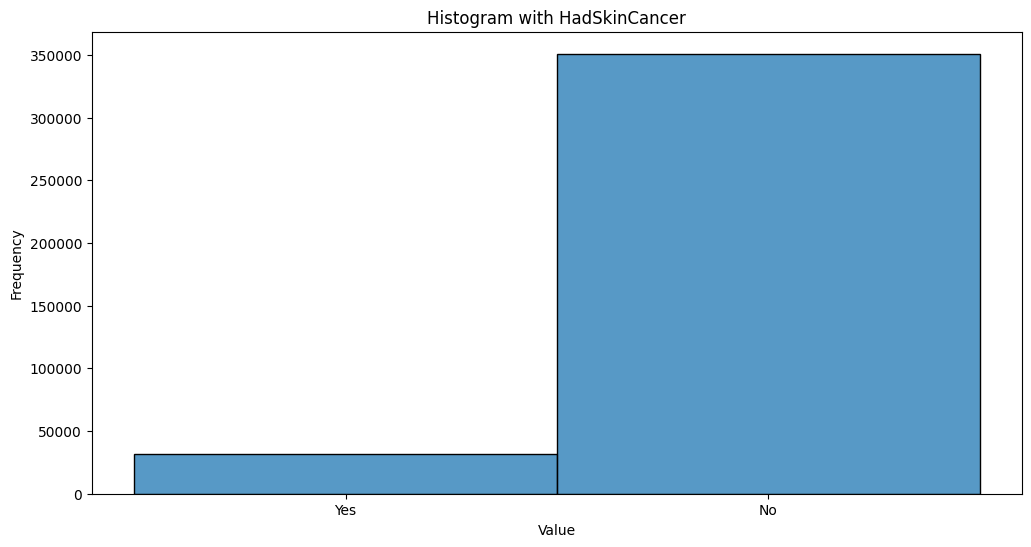

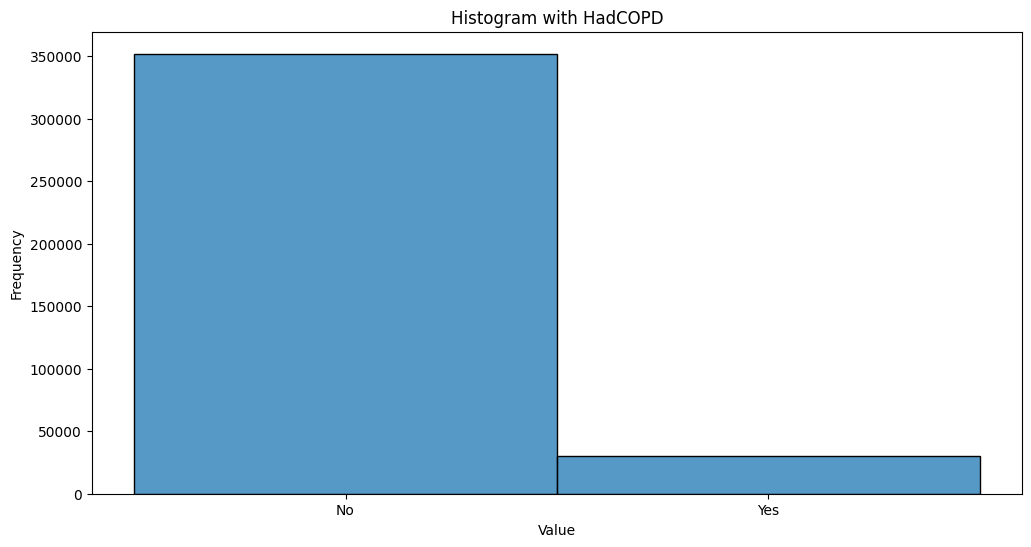

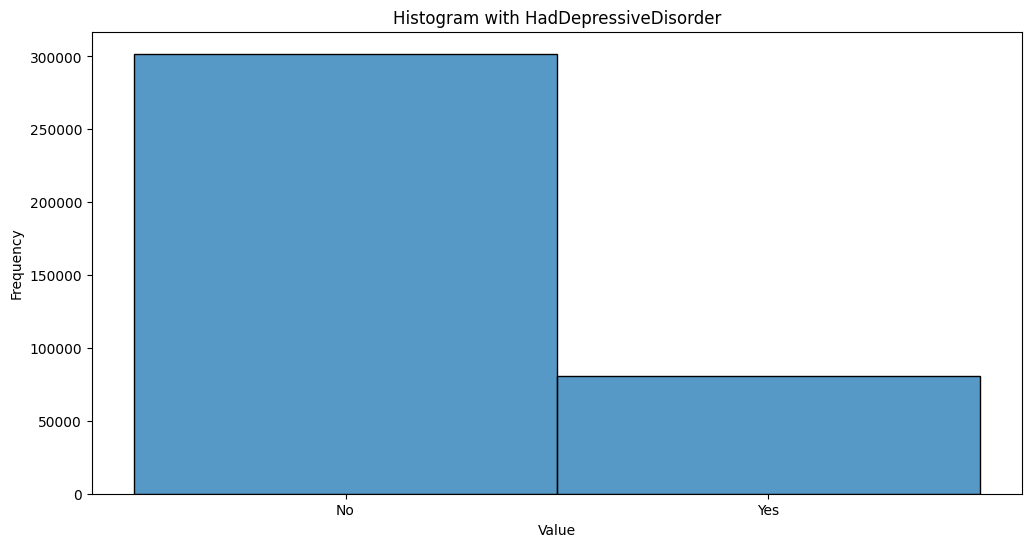

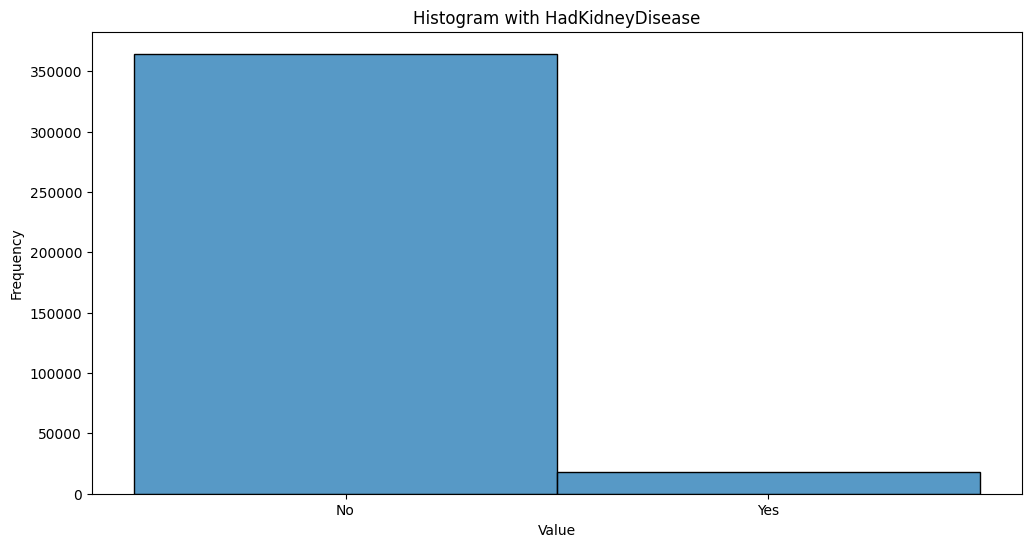

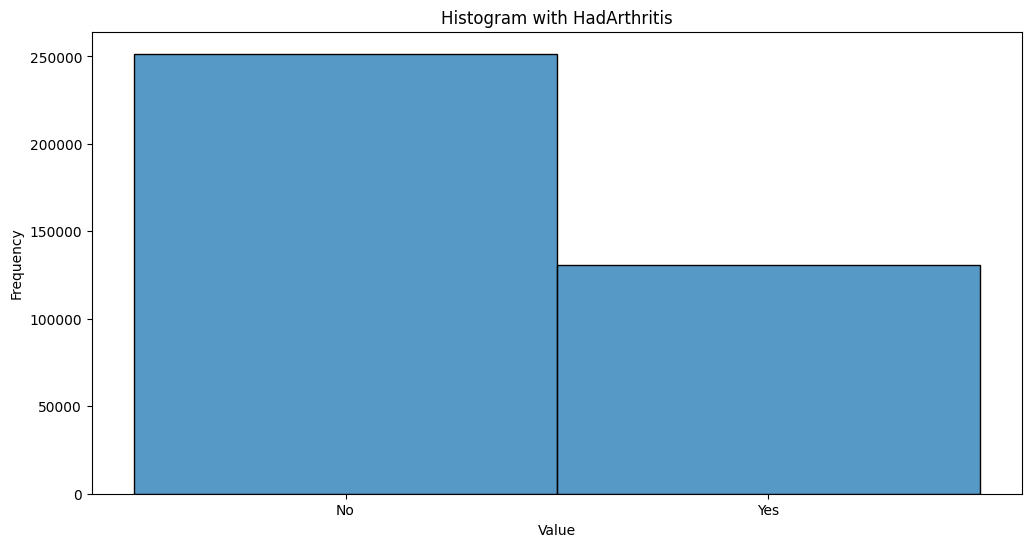

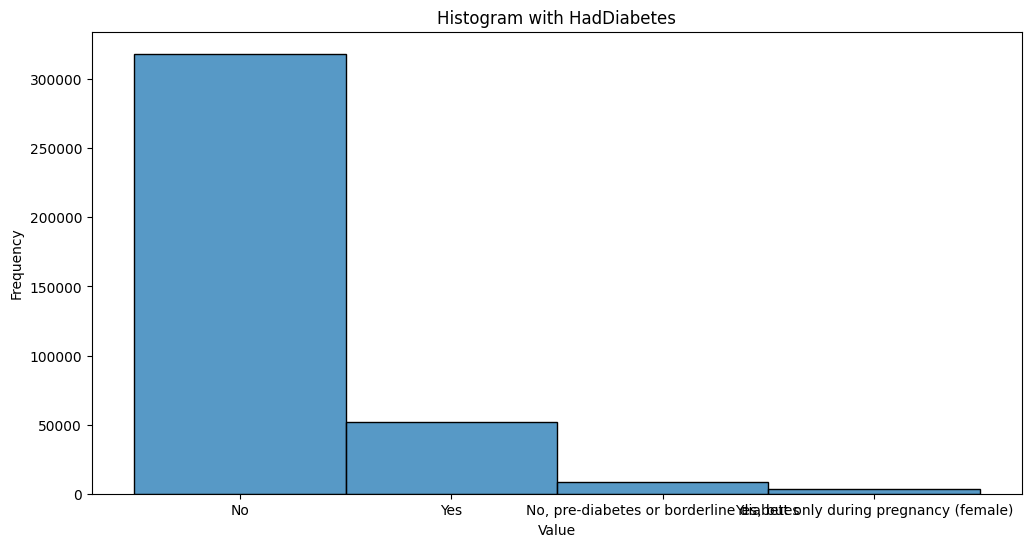

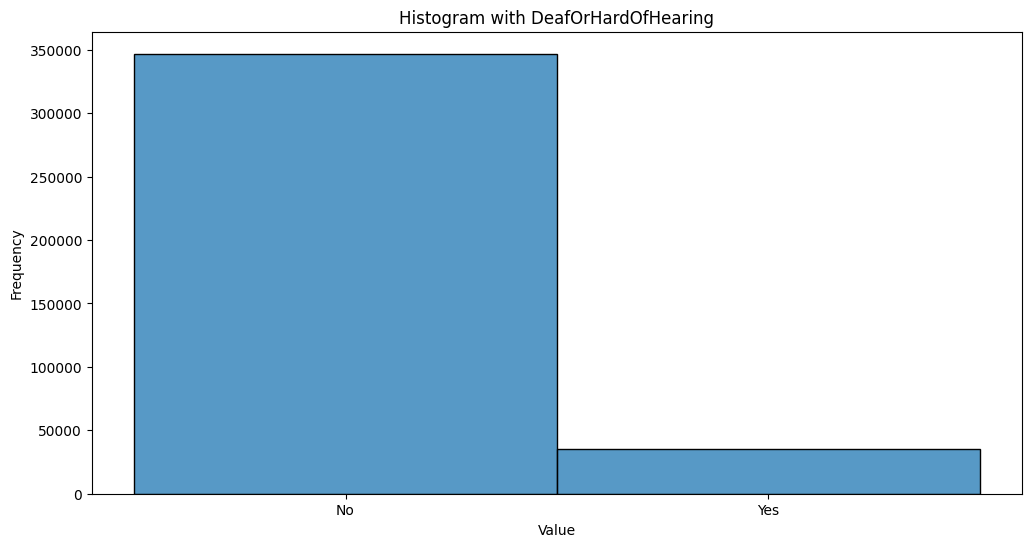

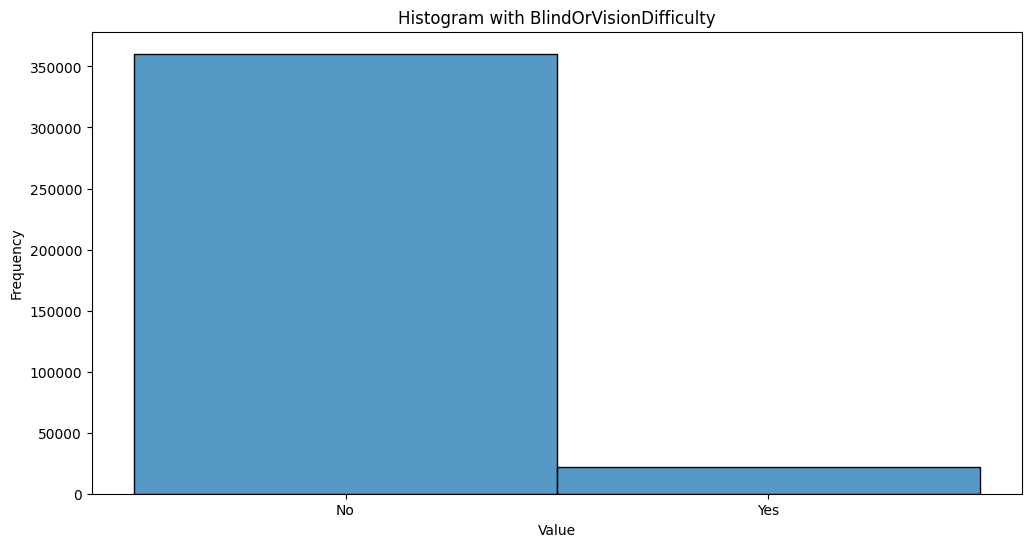

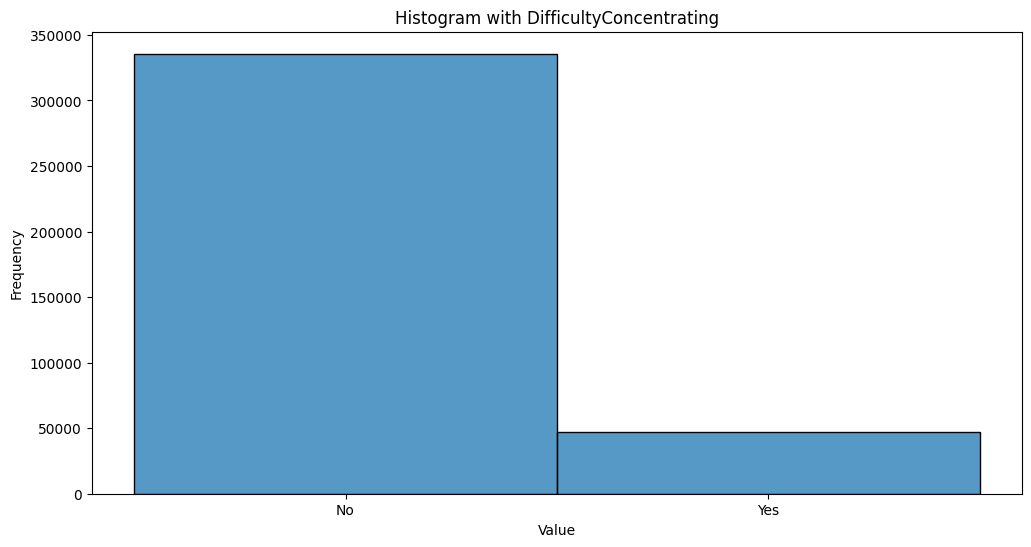

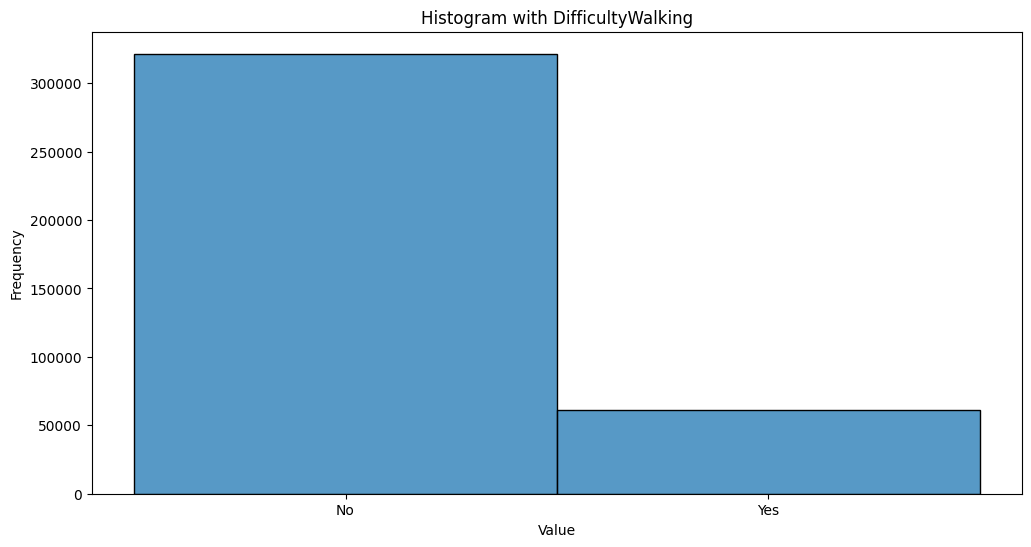

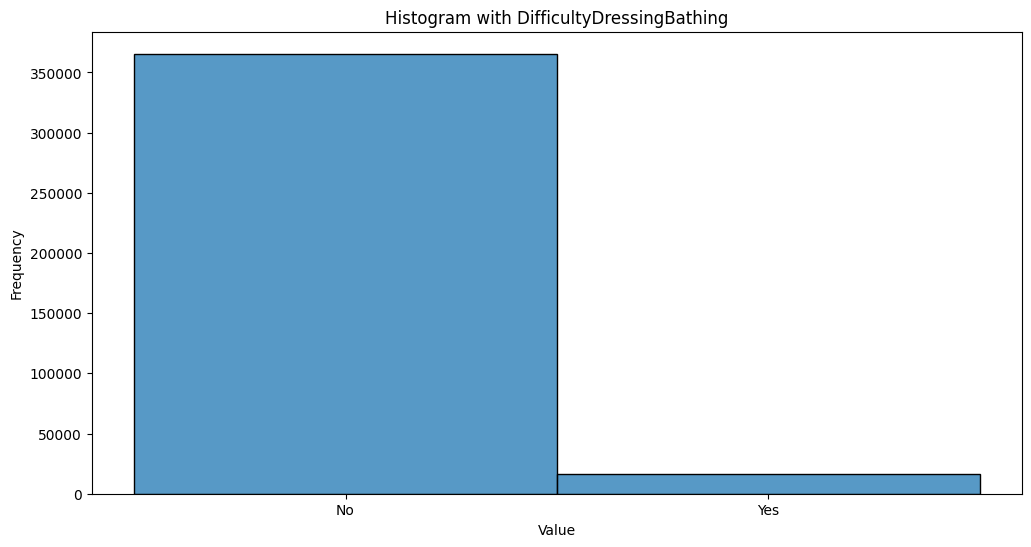

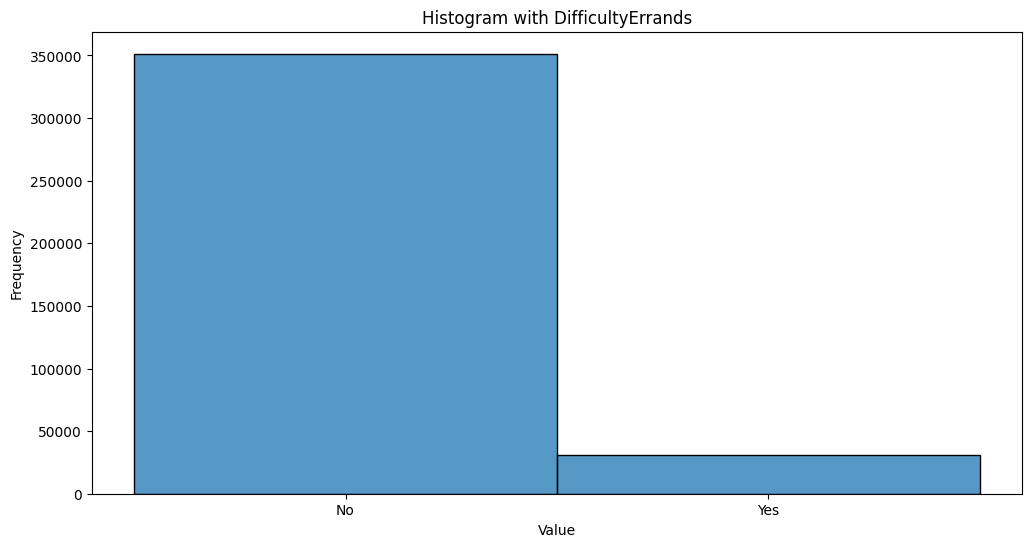

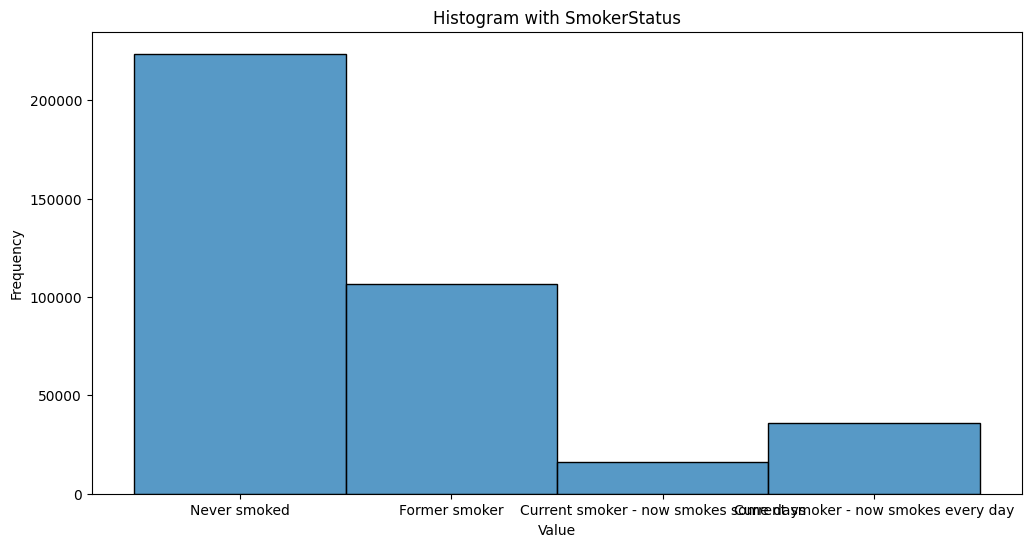

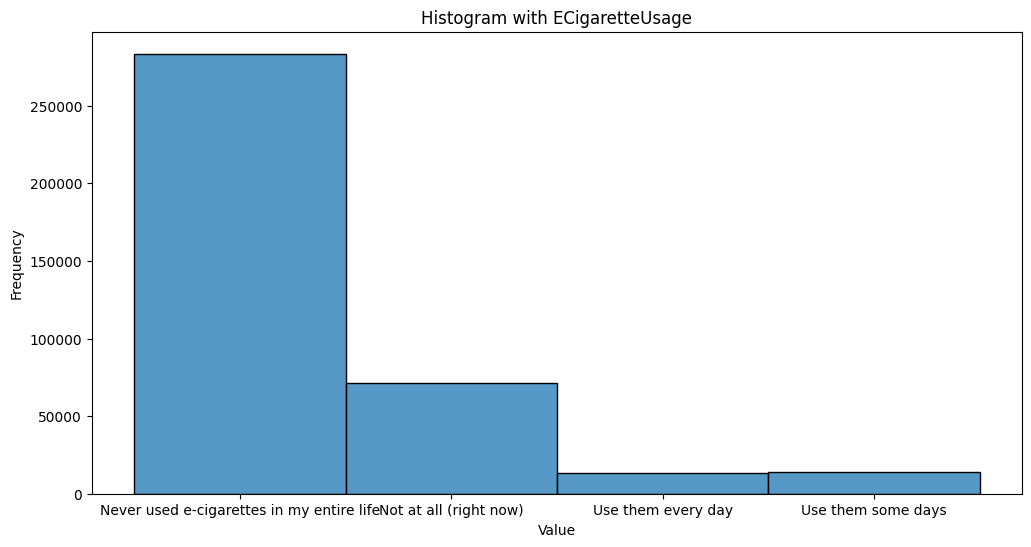

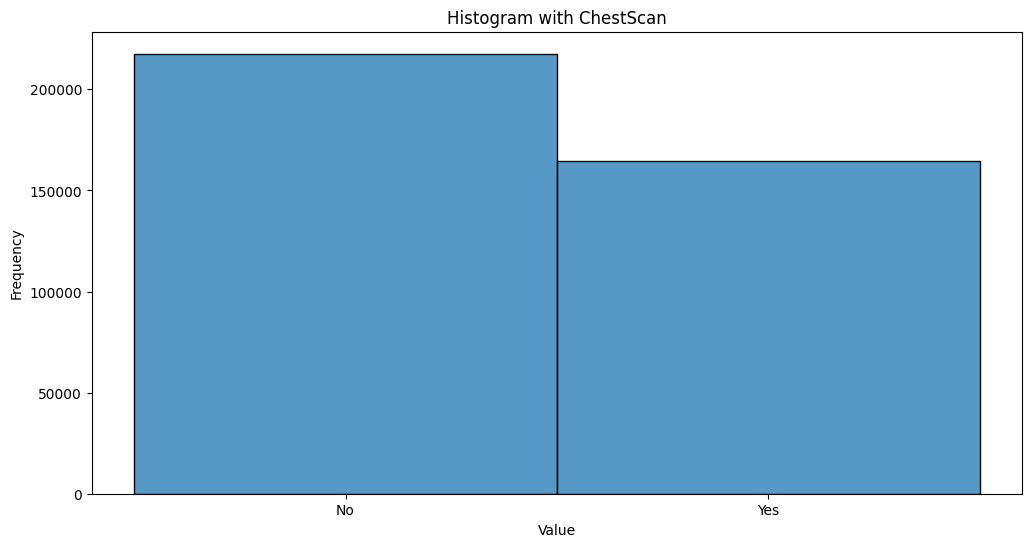

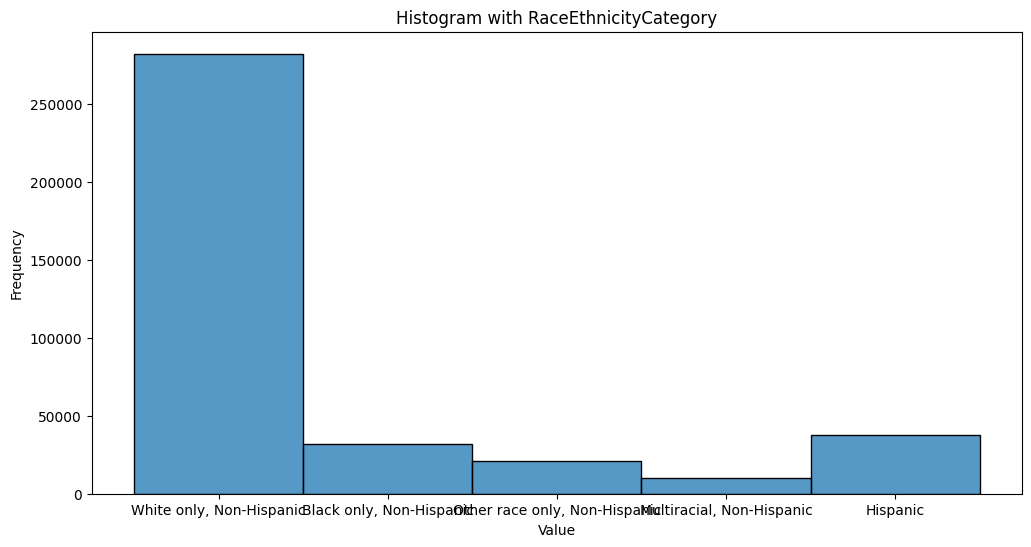

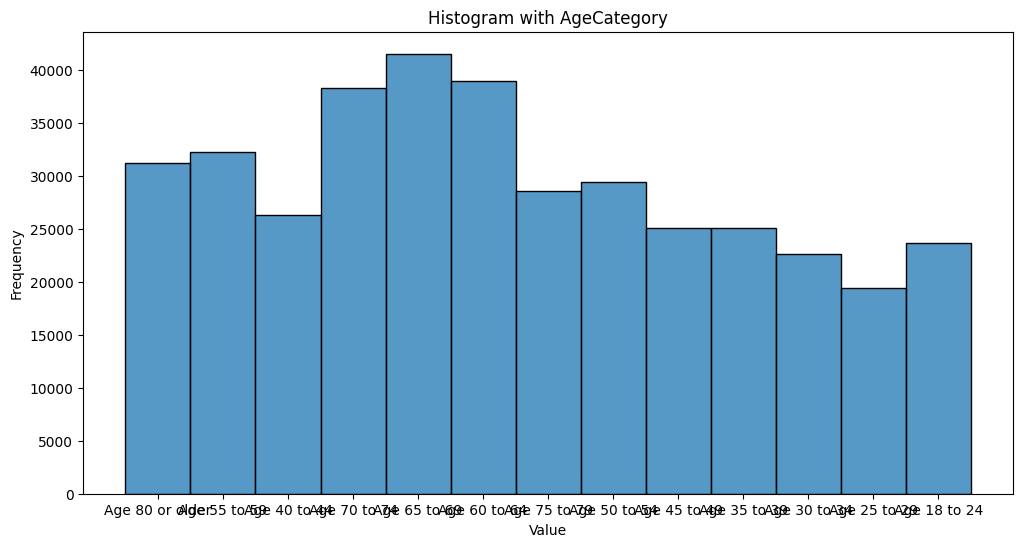

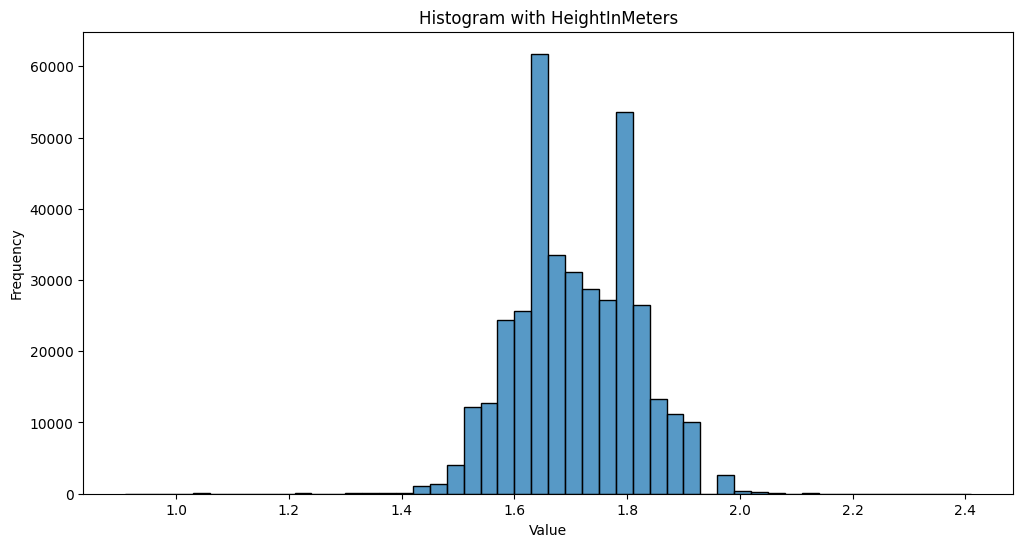

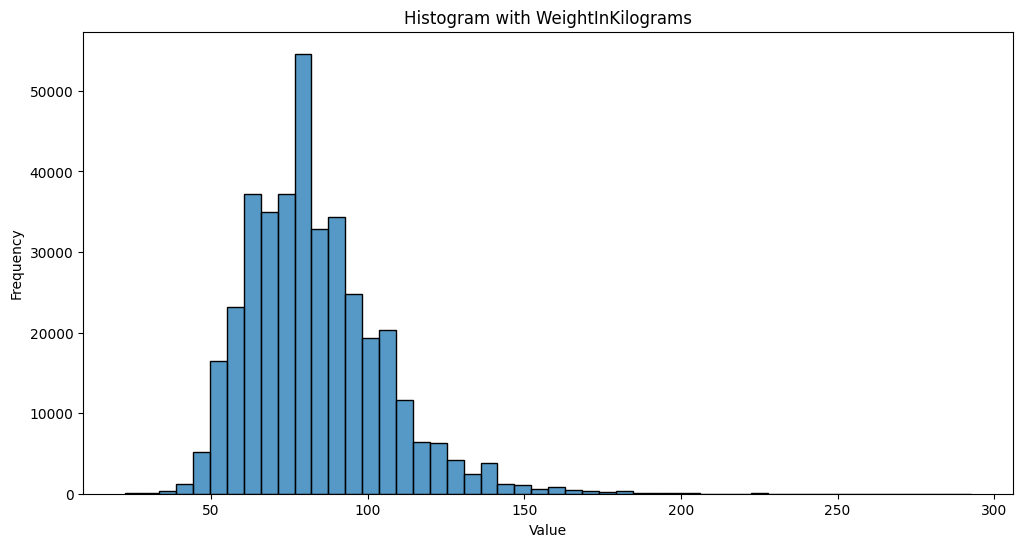

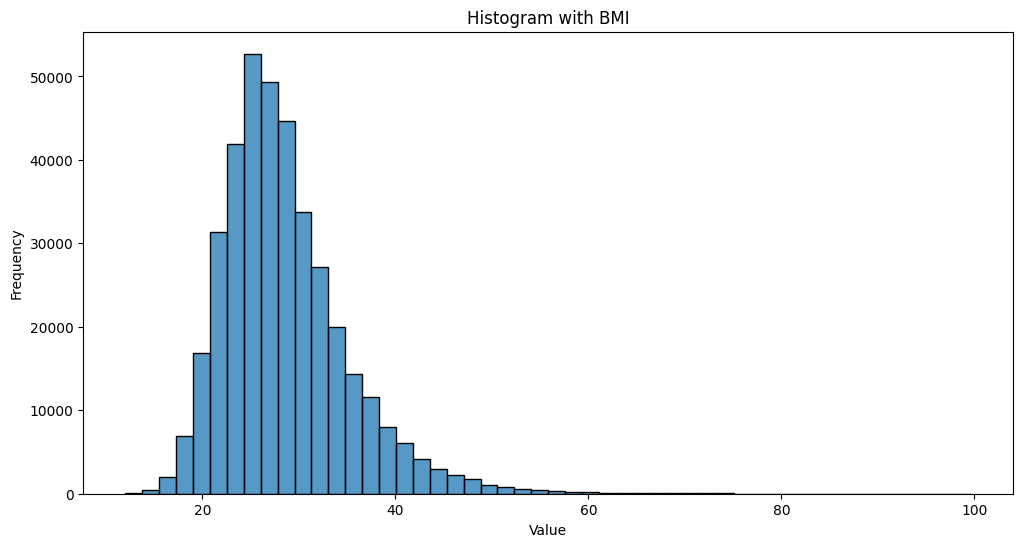

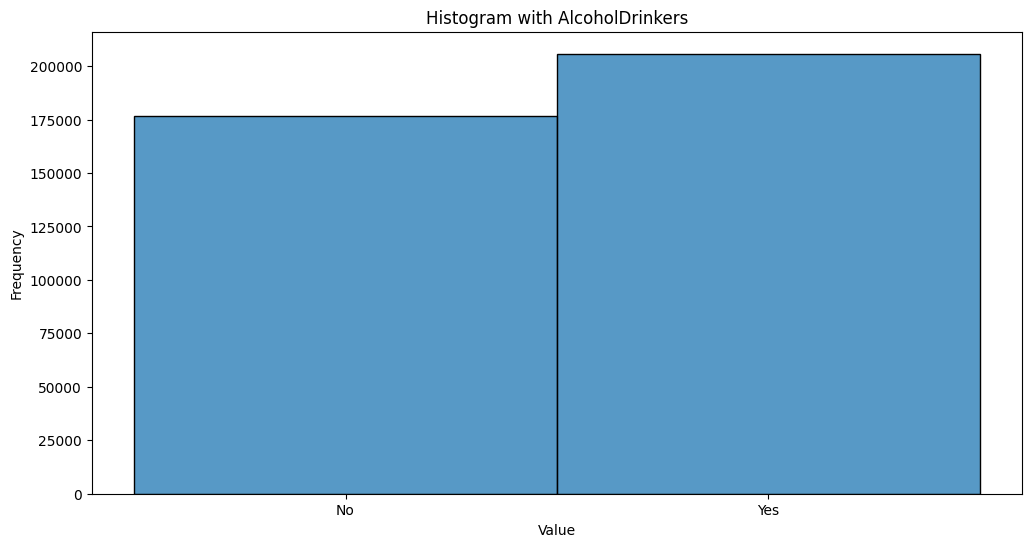

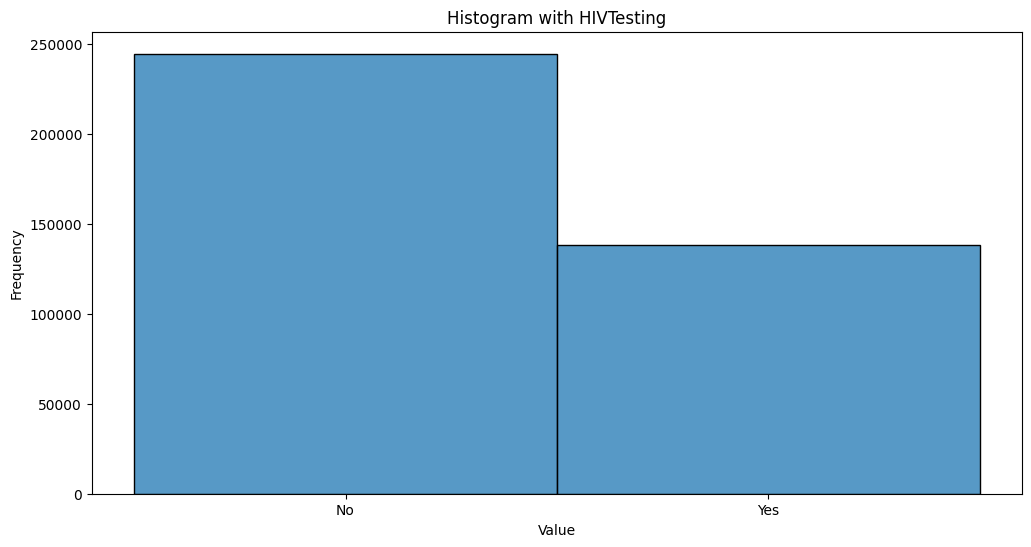

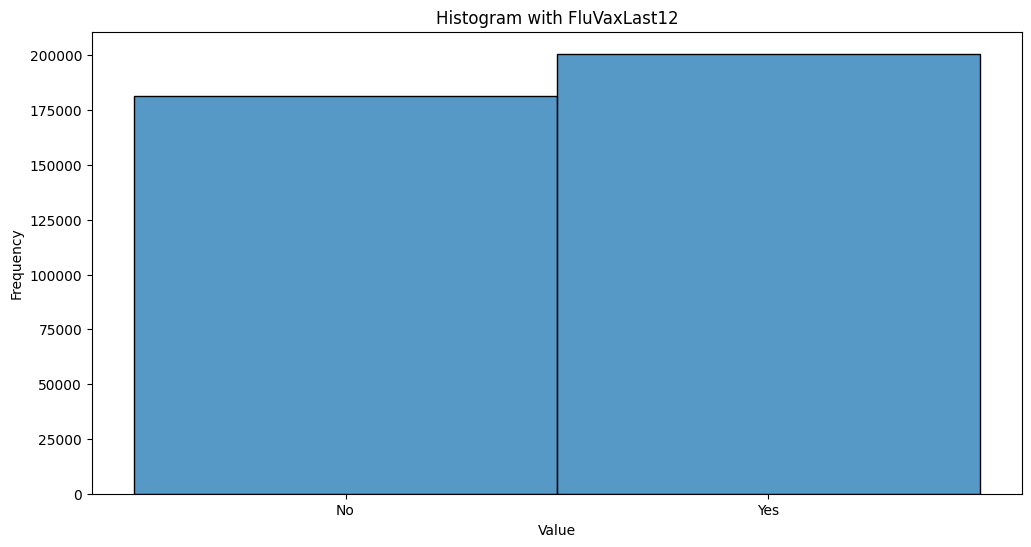

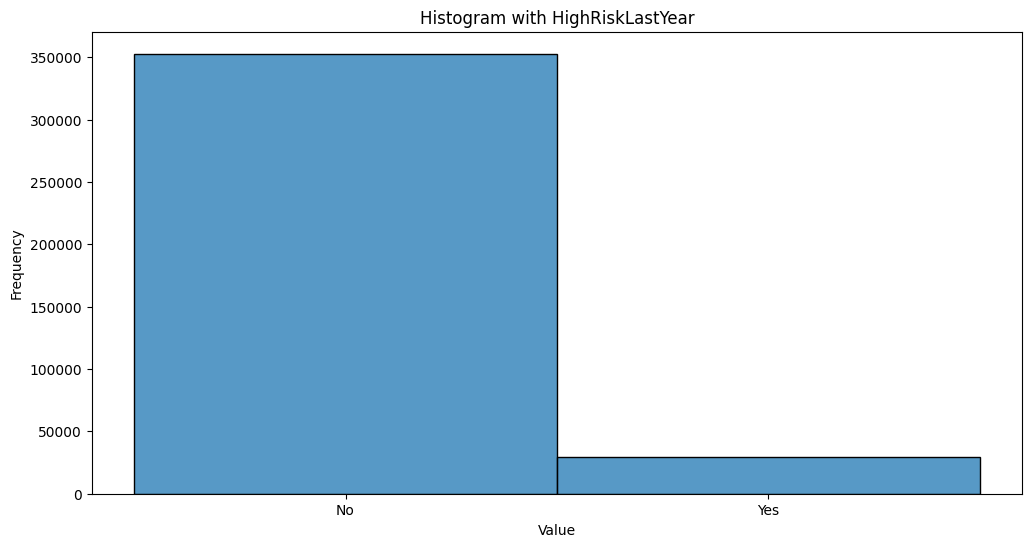

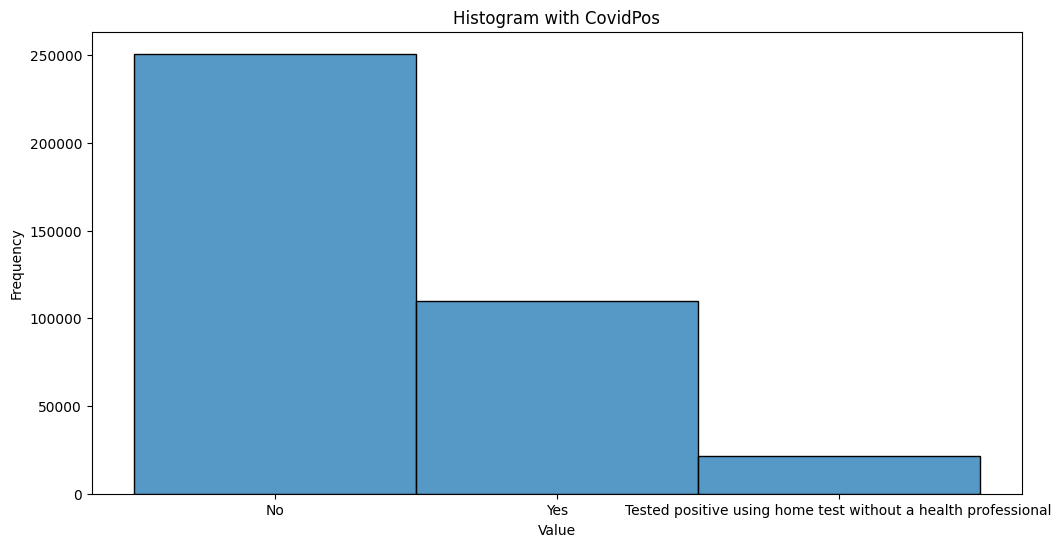

In [52]:
for col in data.columns:
  plt.figure(figsize=(12, 6))
  sns.histplot(data[col], bins=50, edgecolor="black")
  plt.title(f"Histogram with {col}")
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.show()

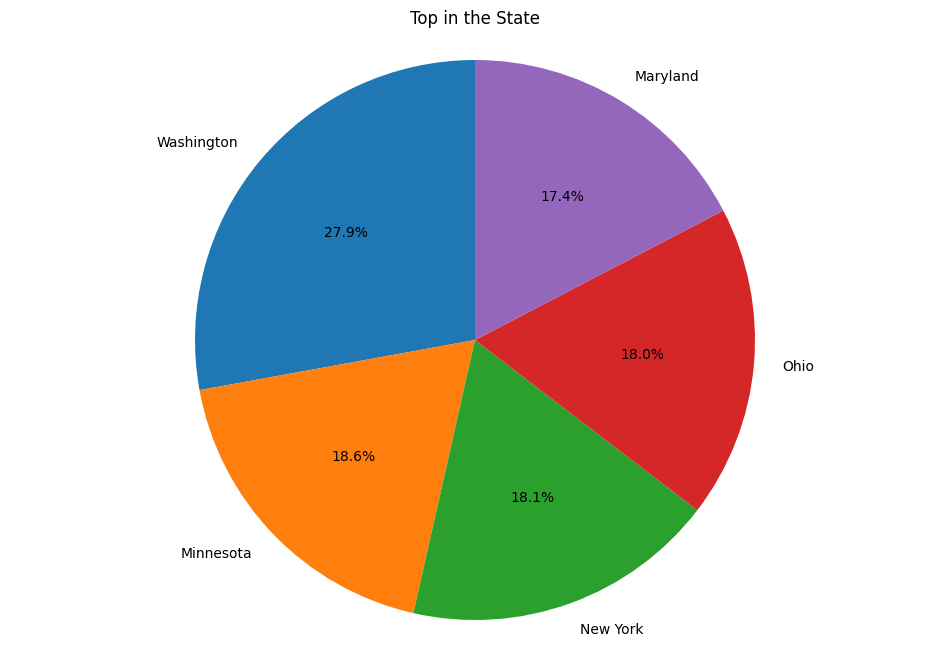

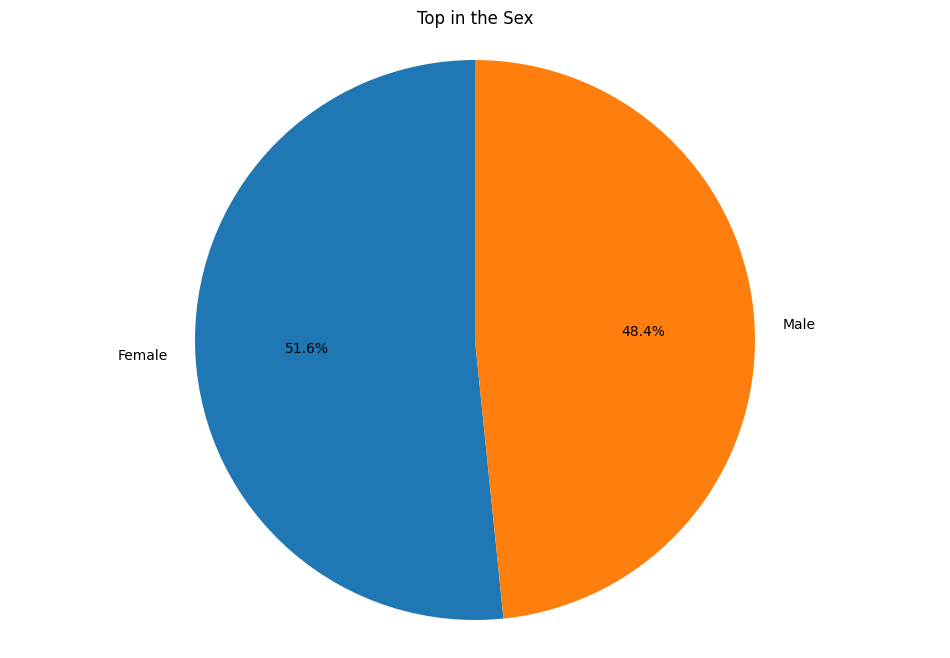

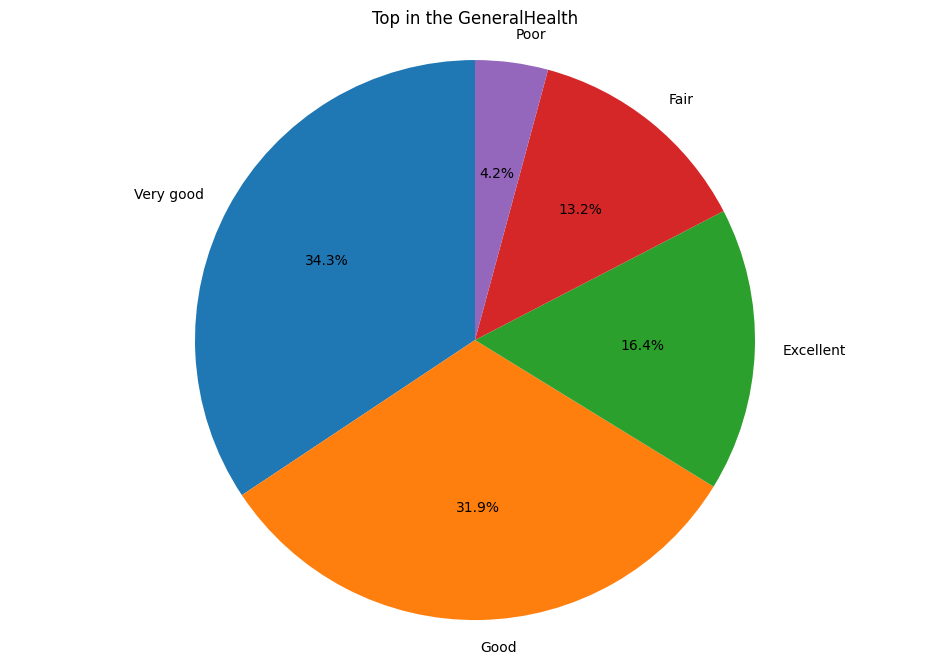

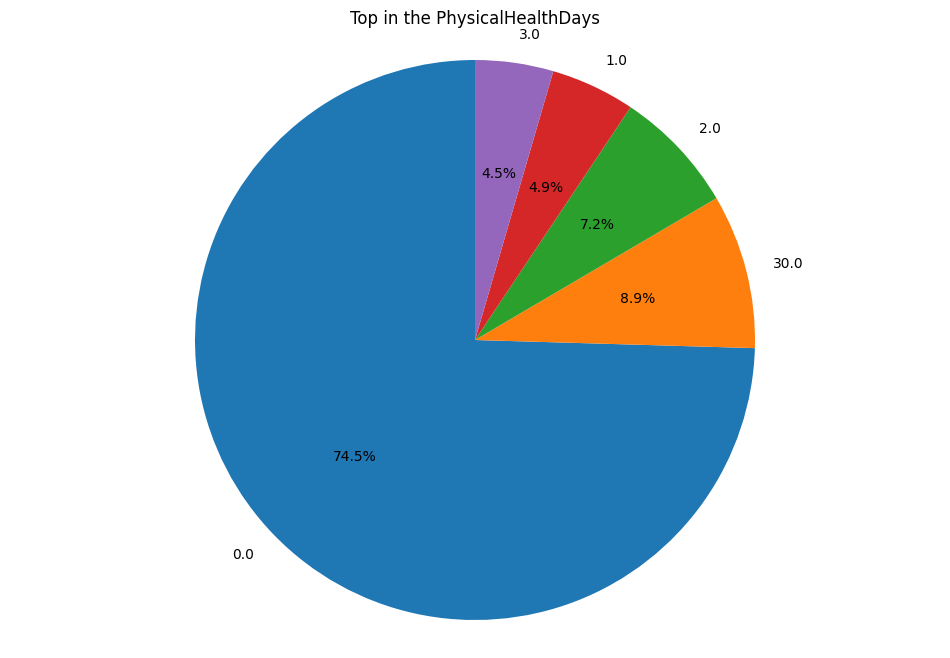

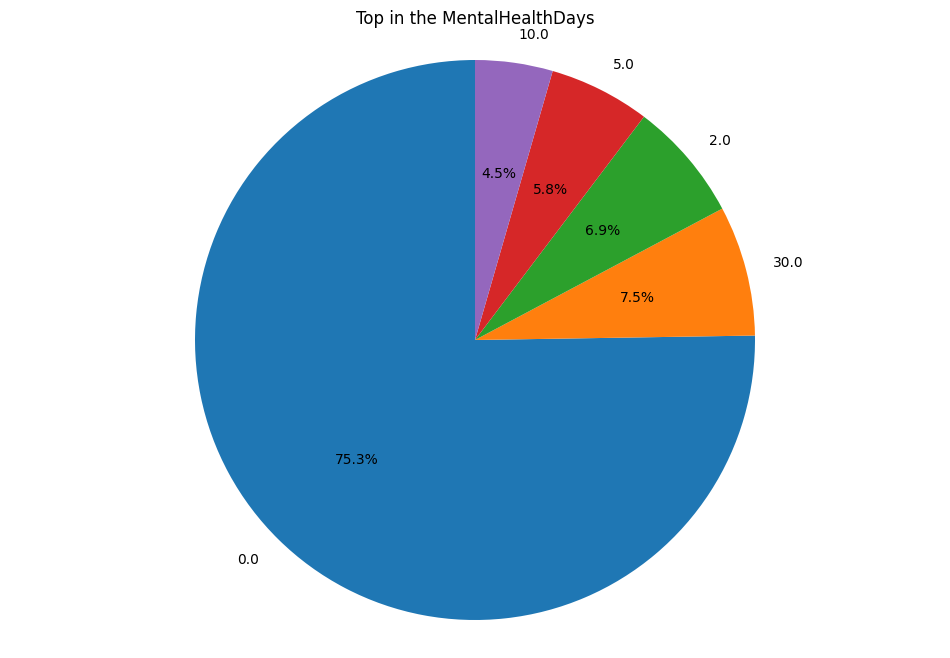

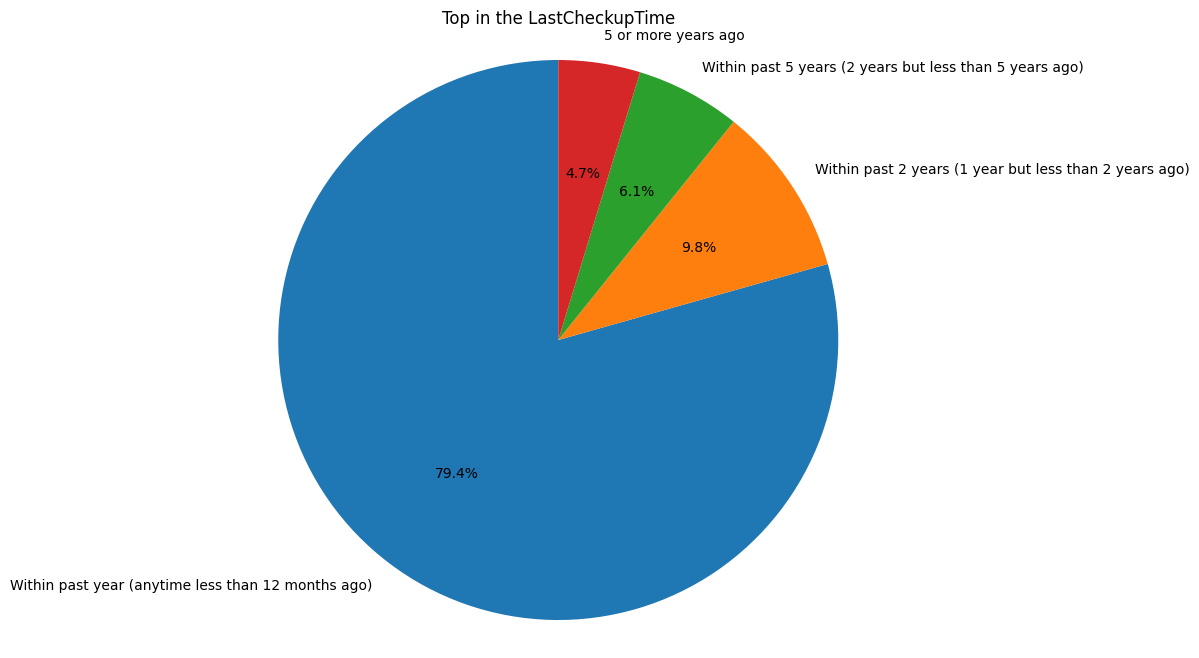

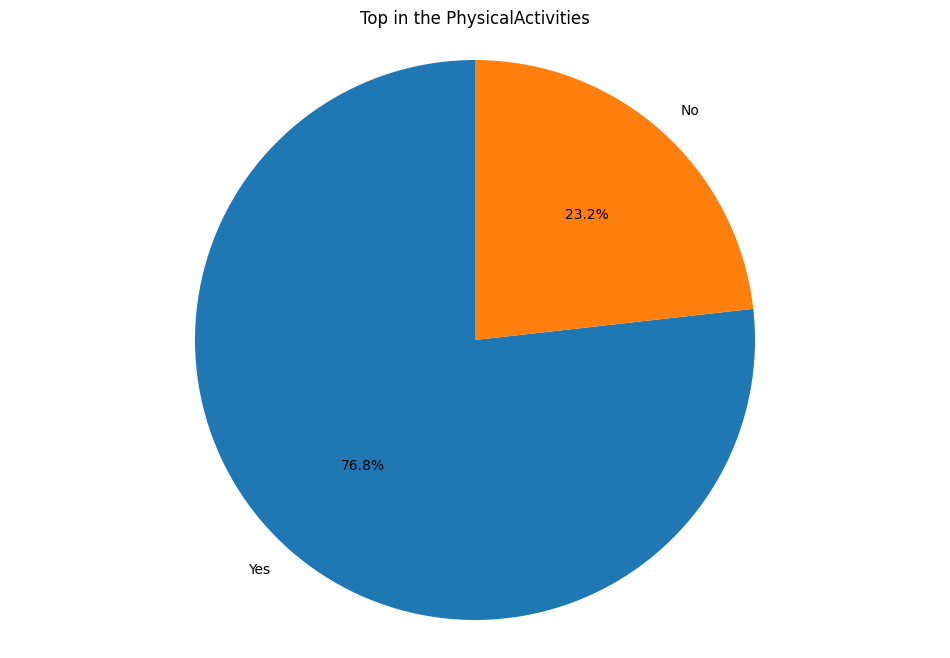

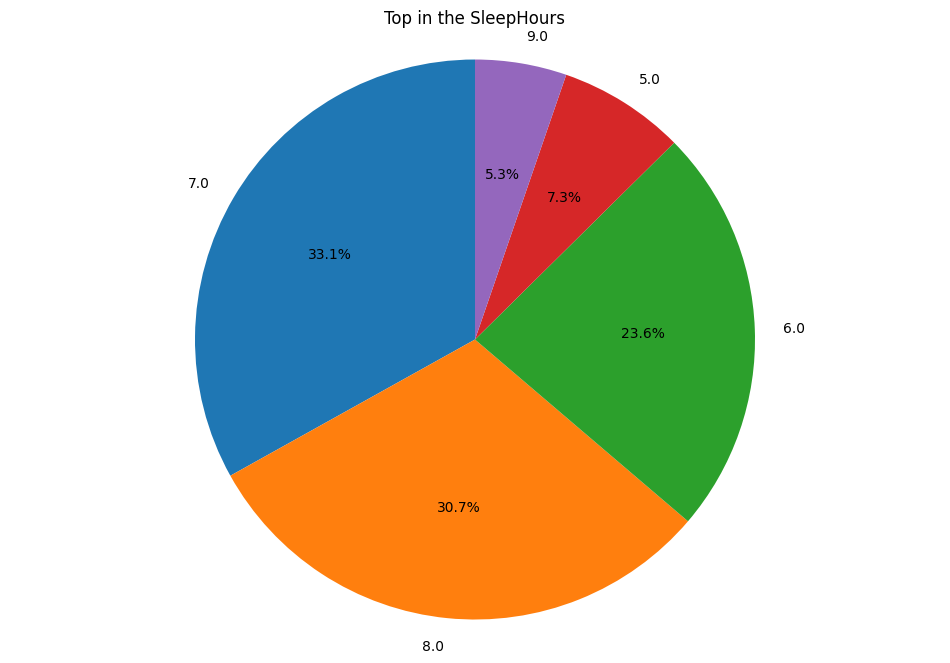

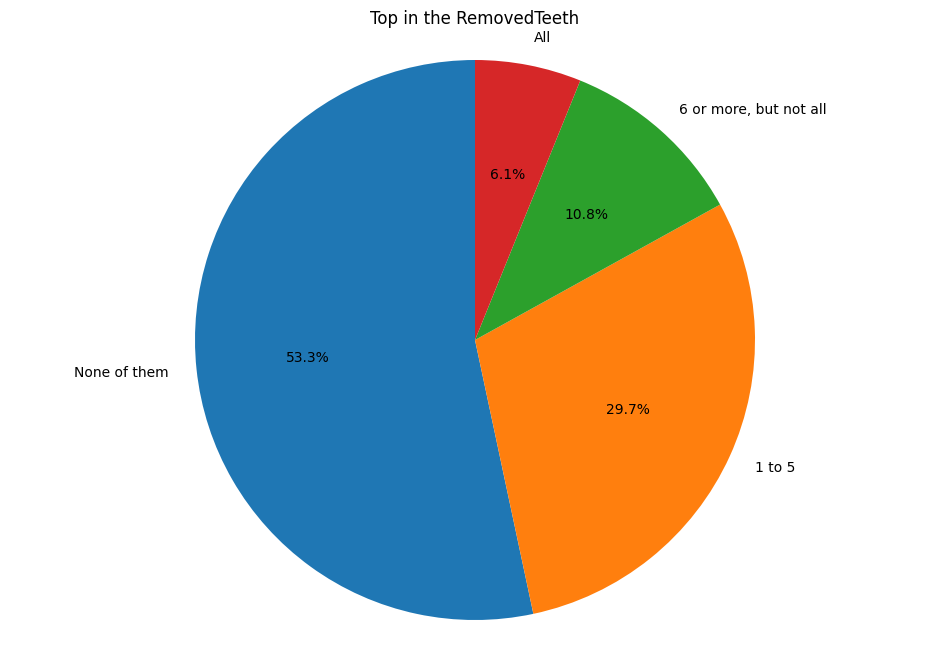

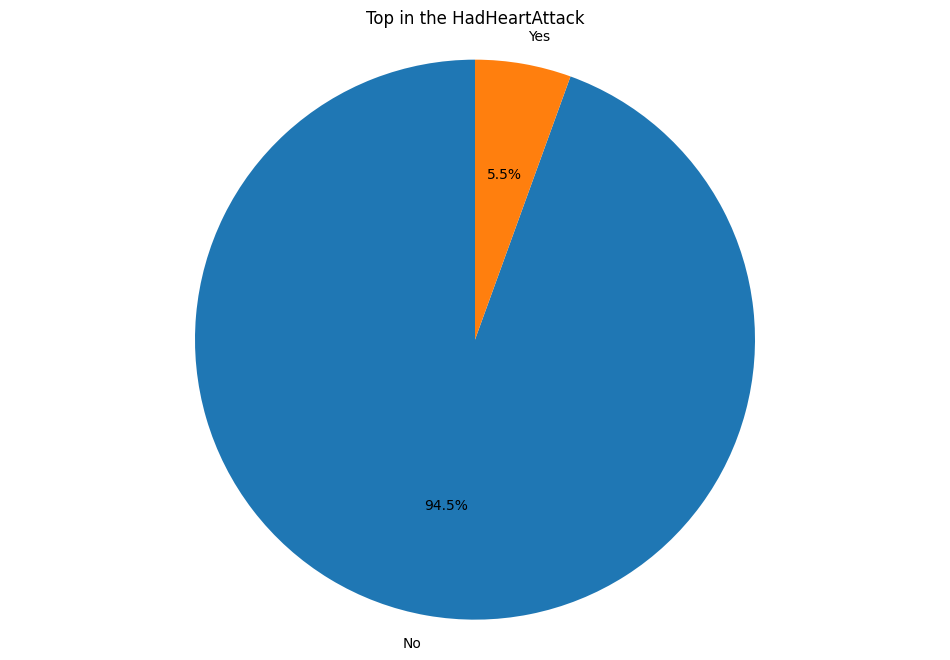

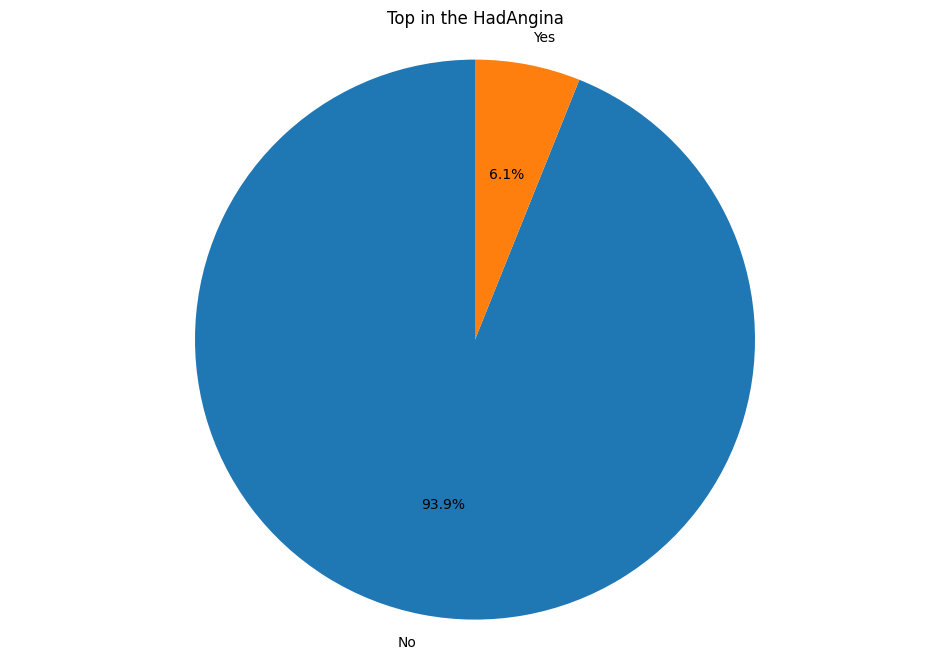

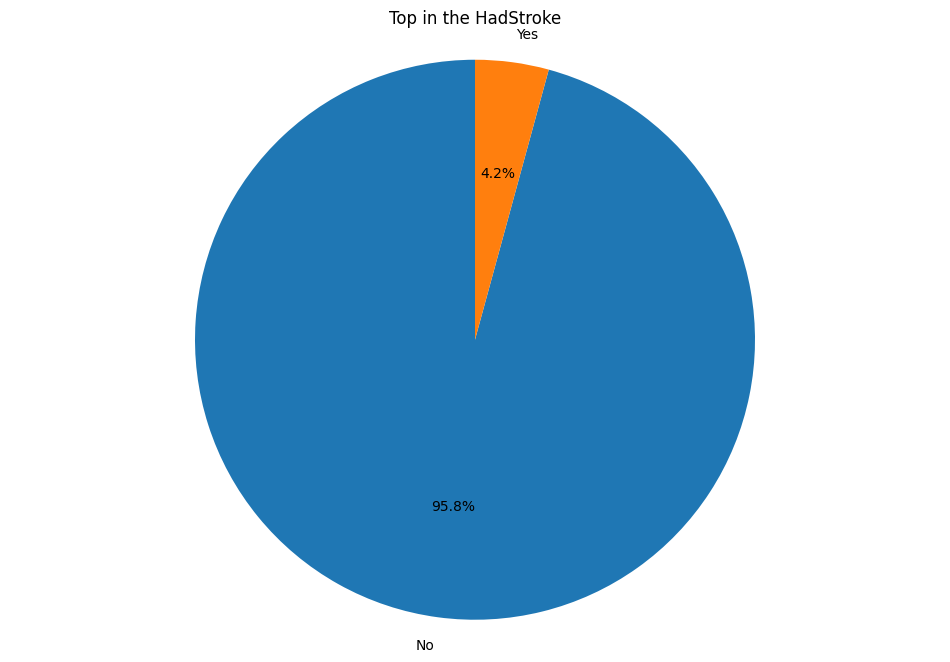

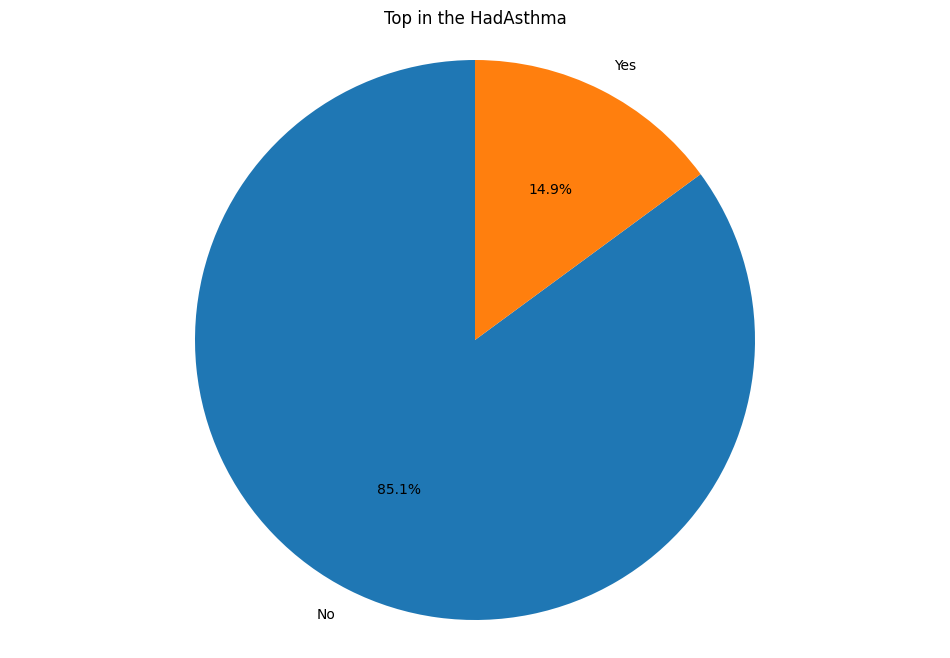

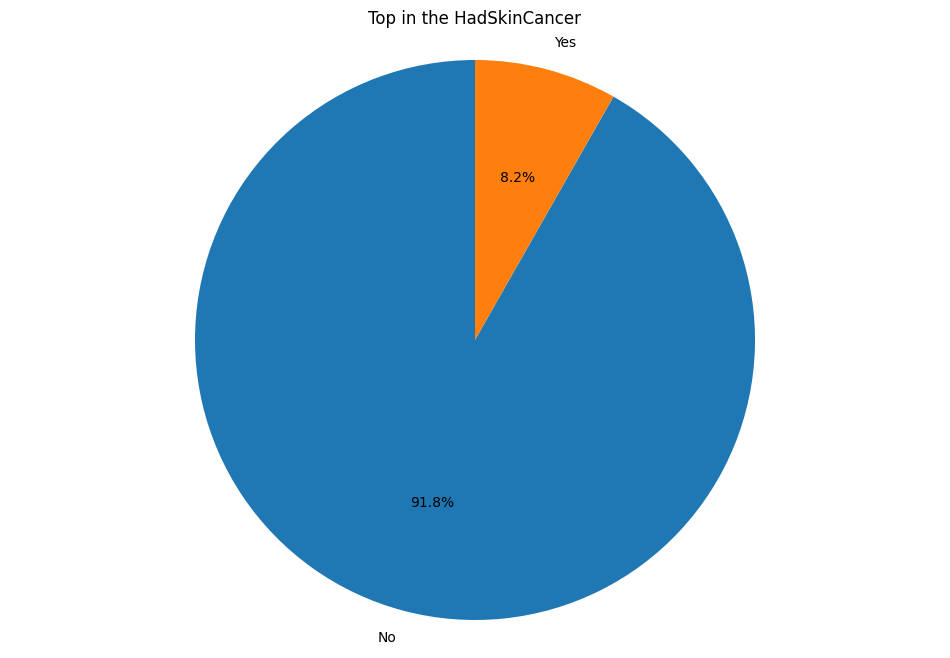

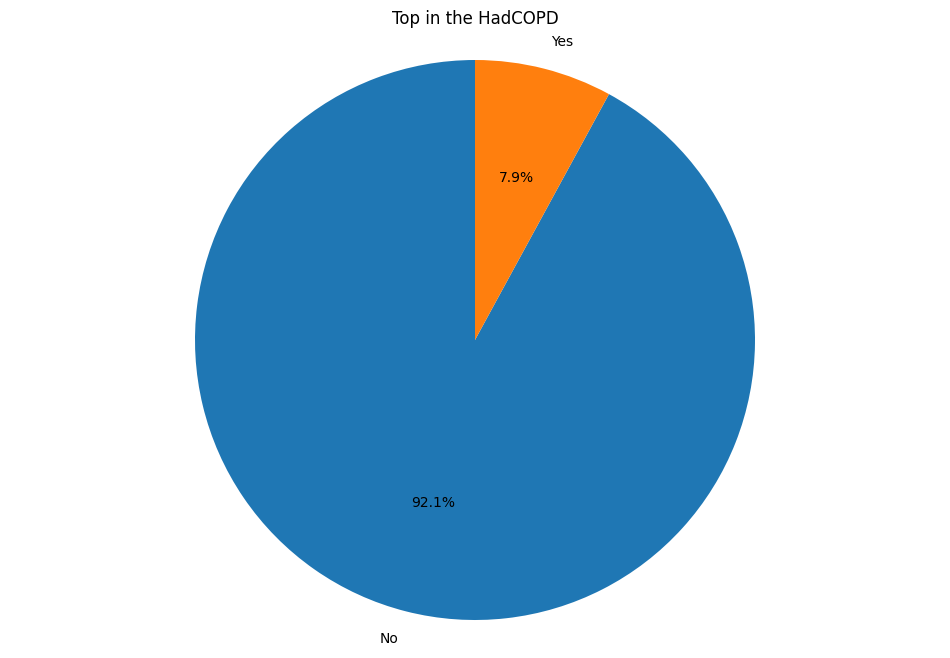

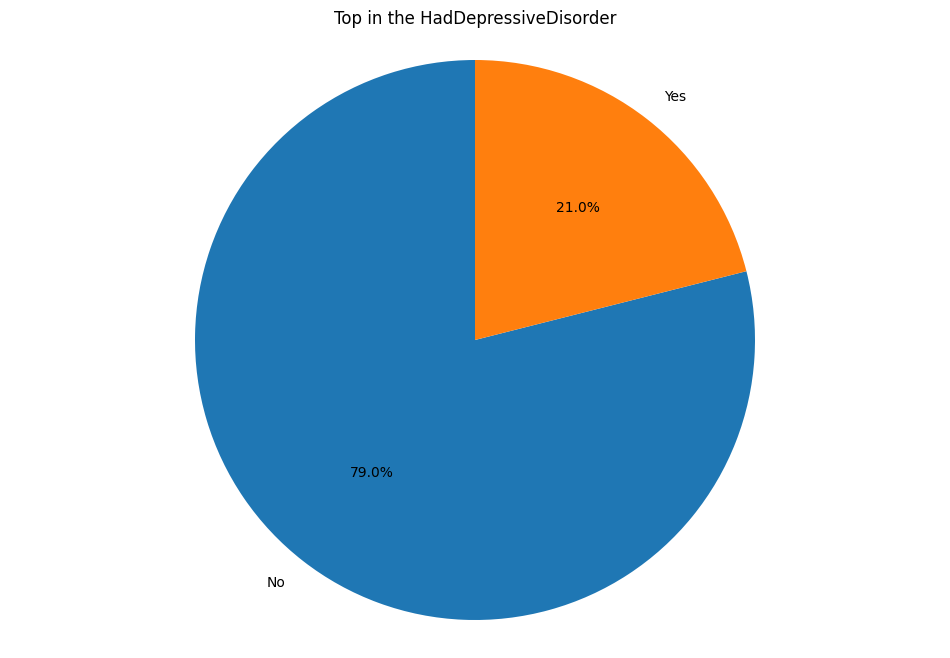

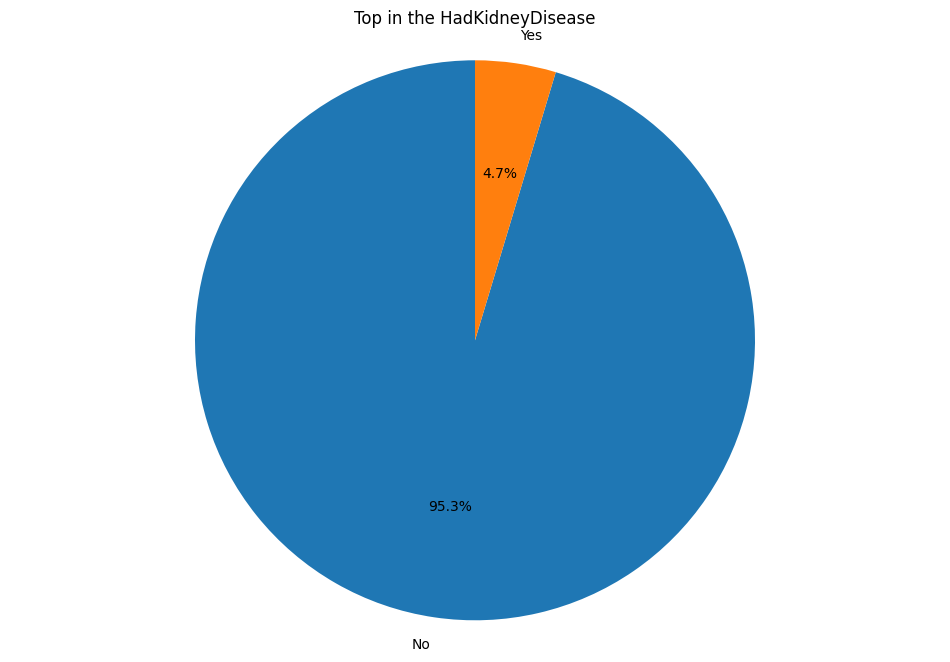

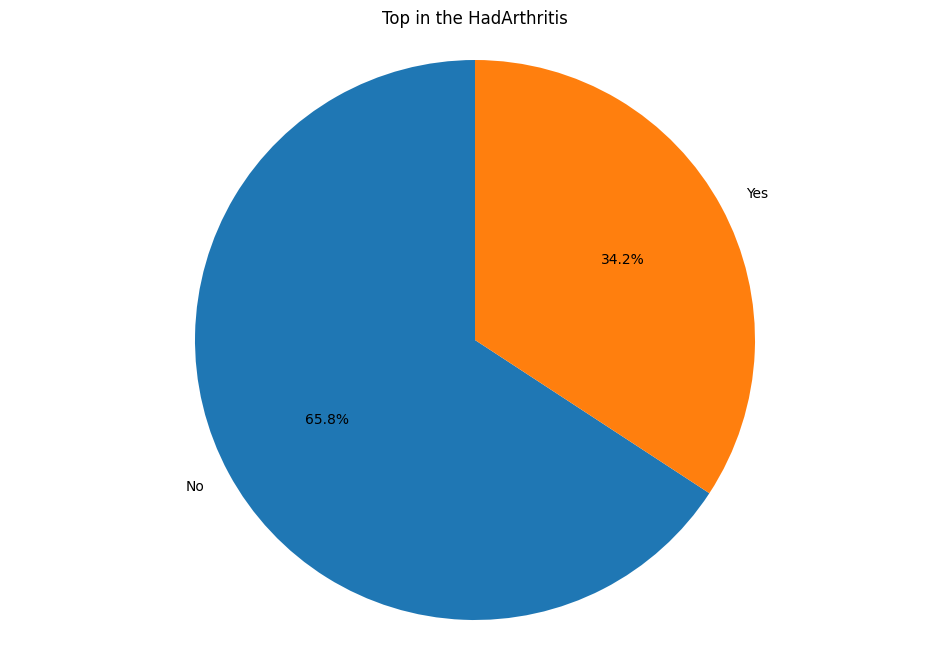

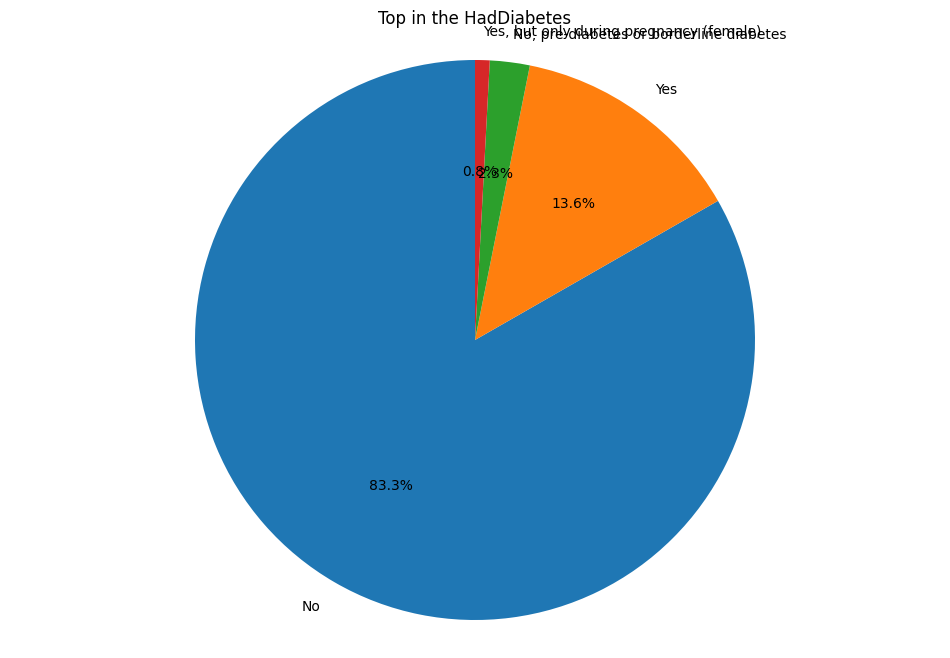

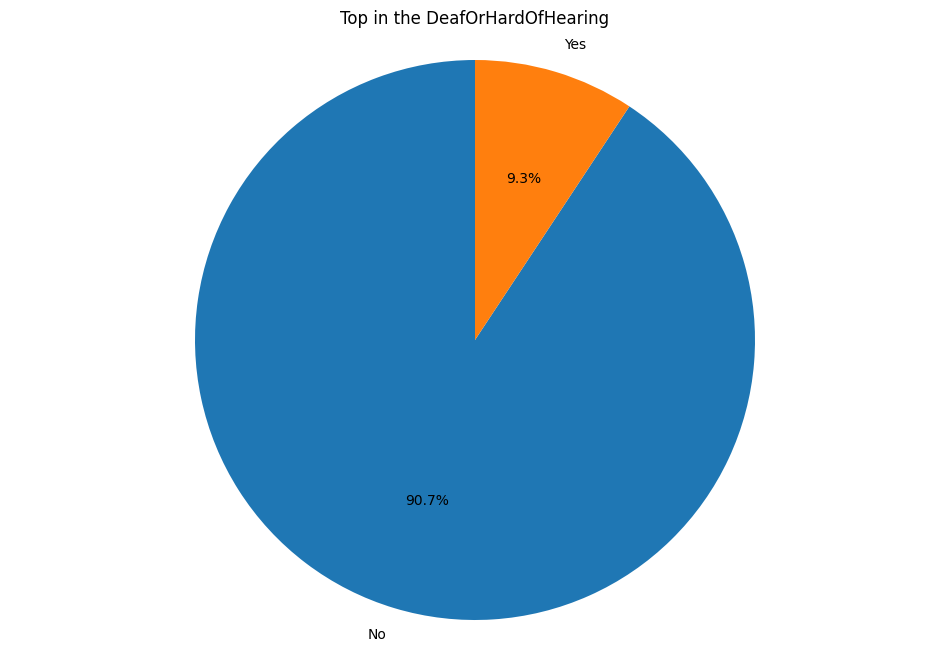

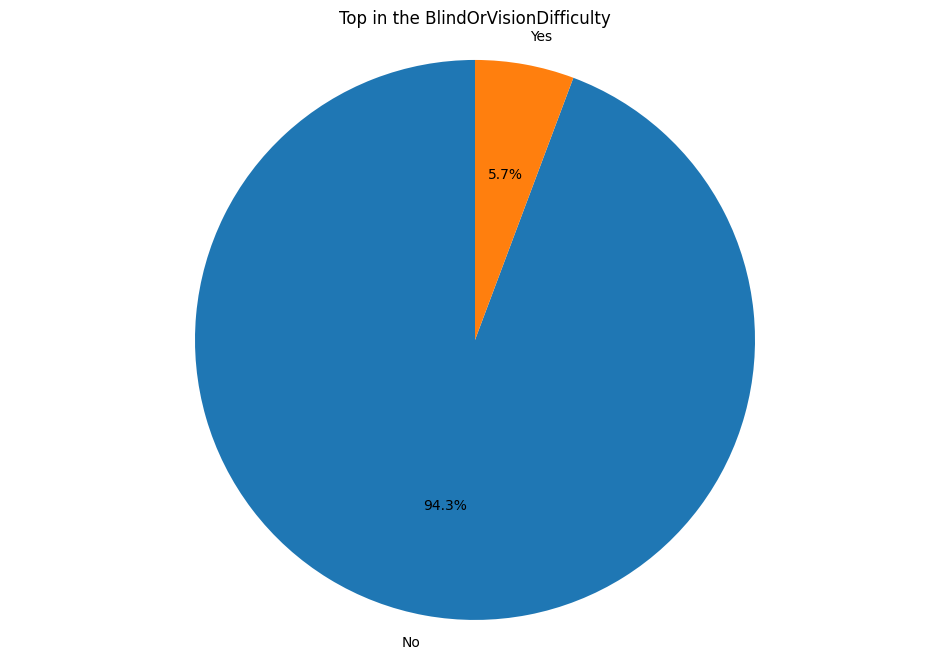

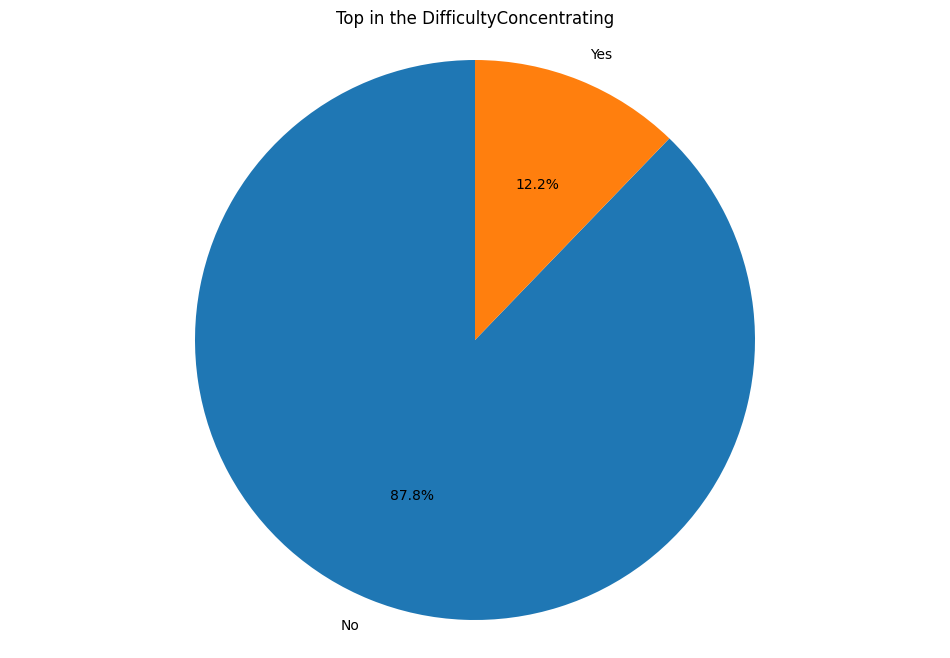

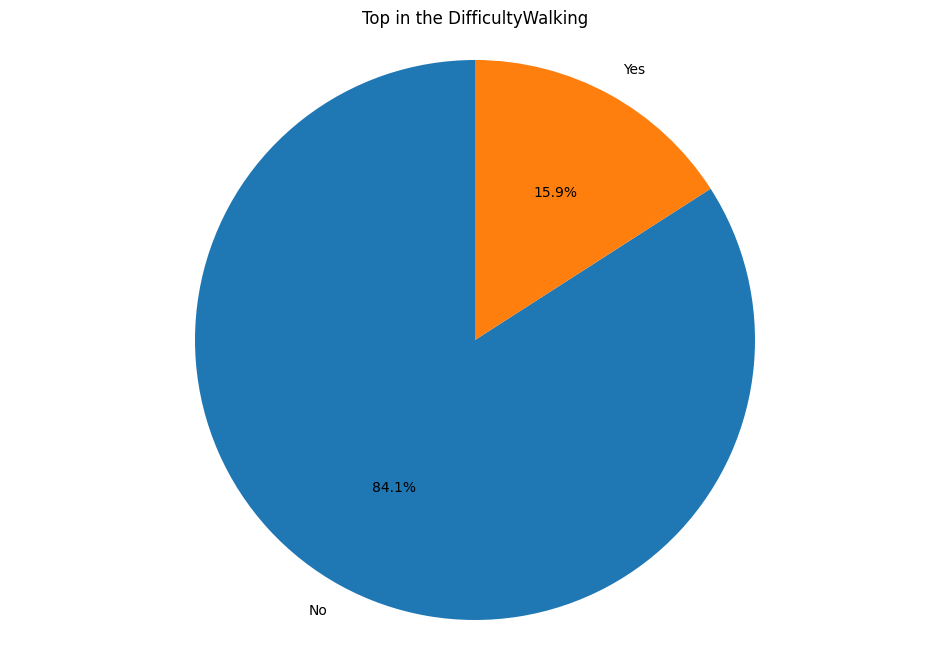

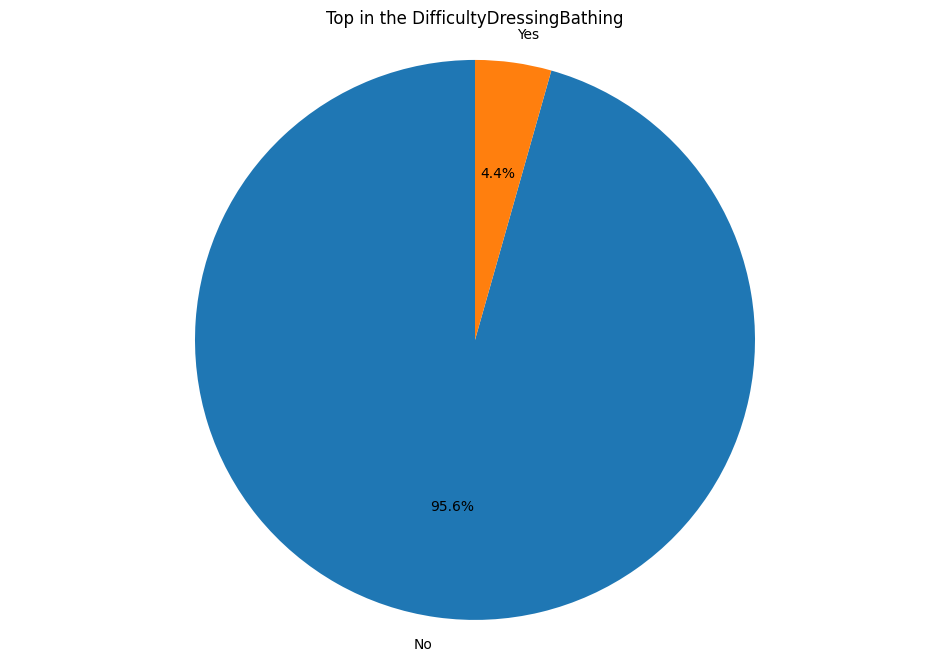

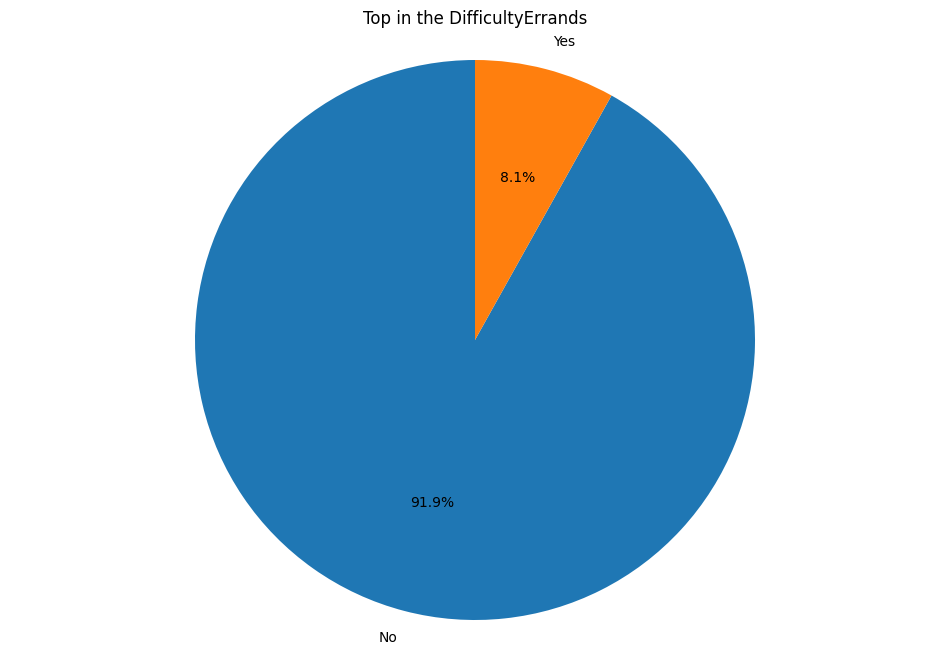

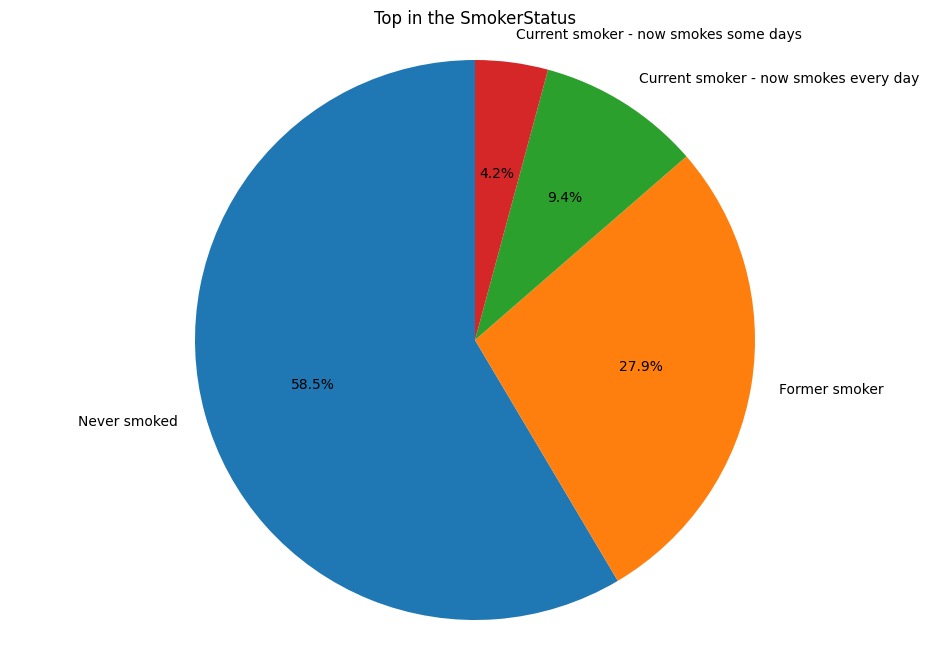

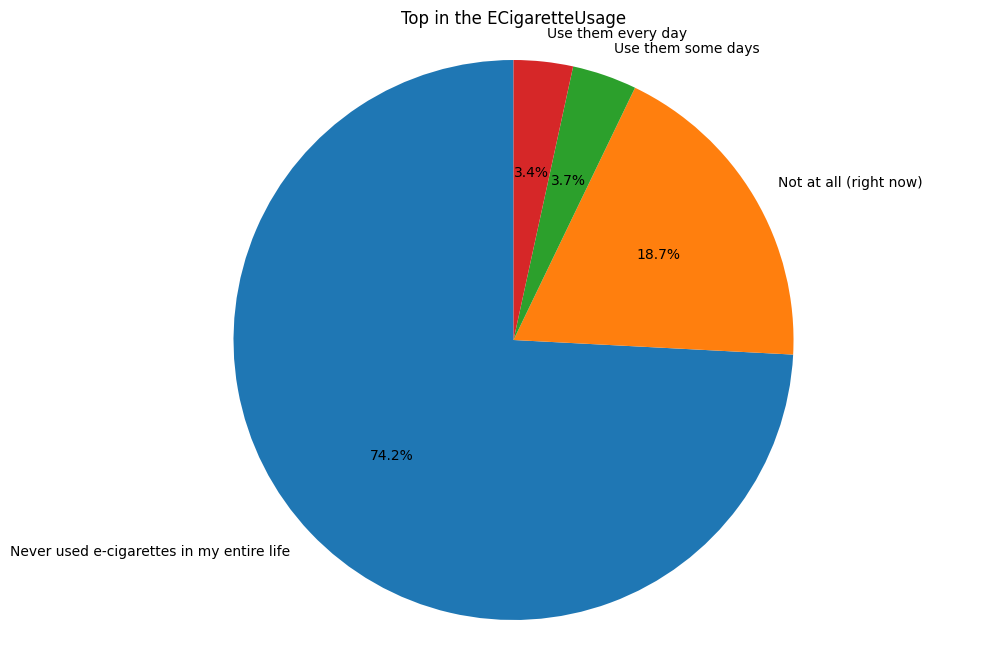

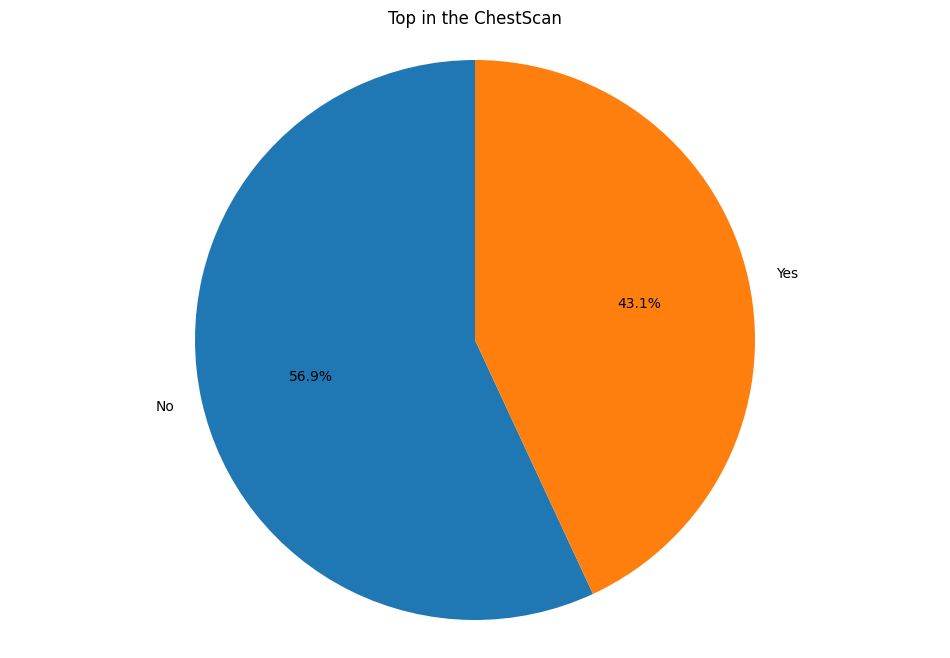

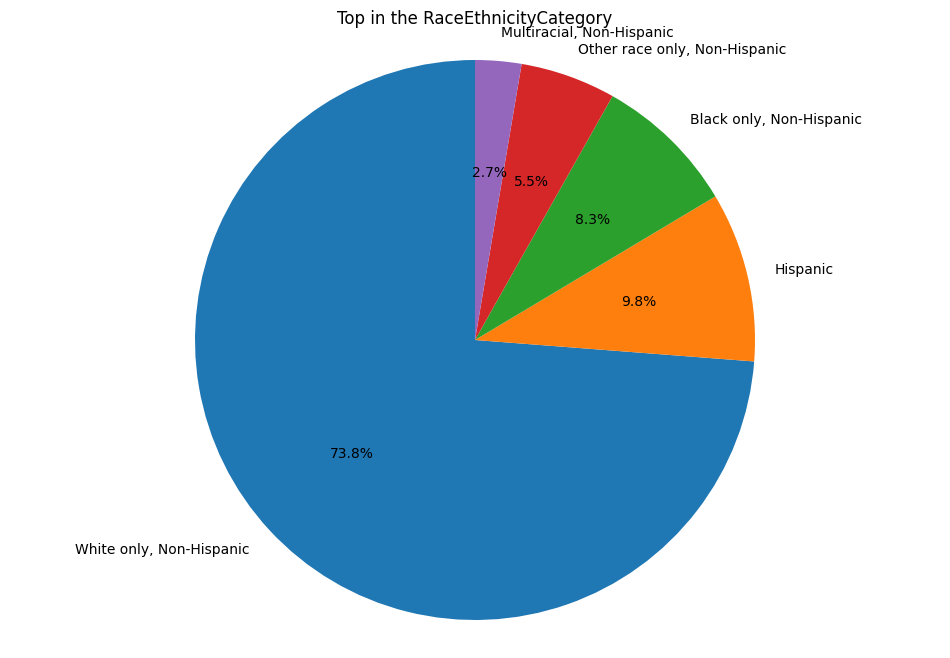

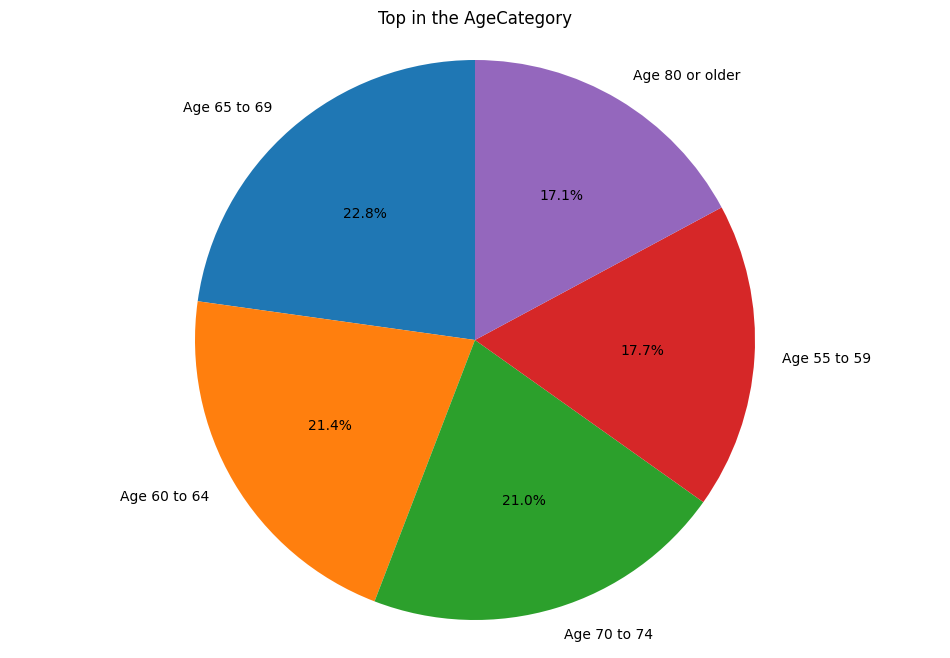

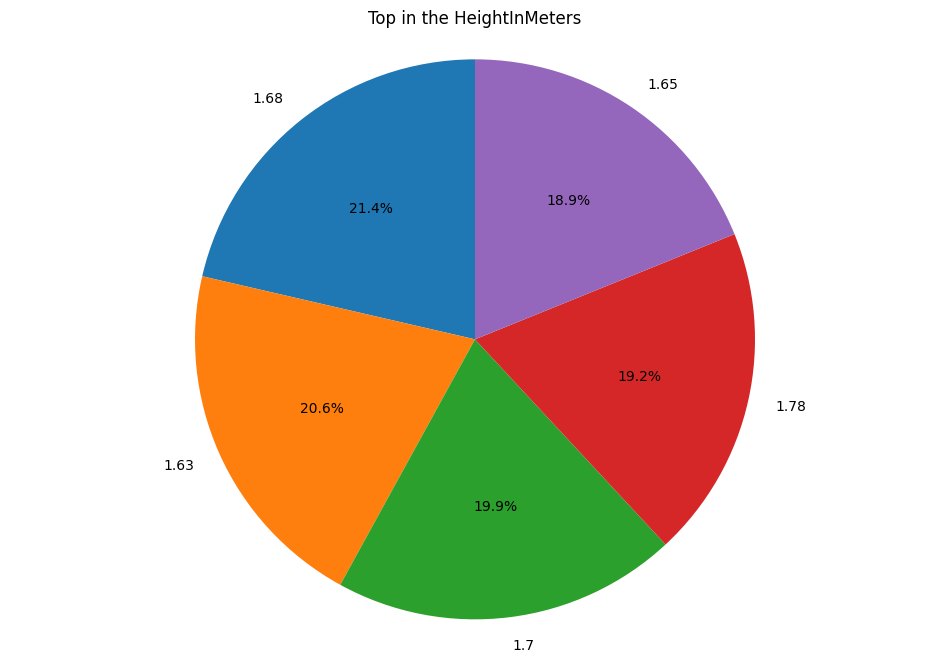

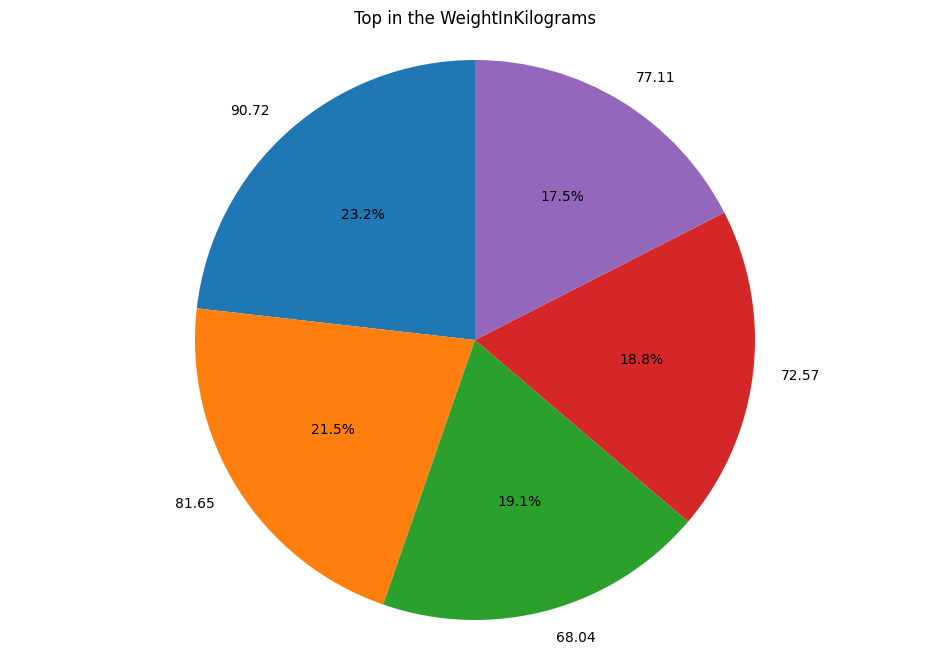

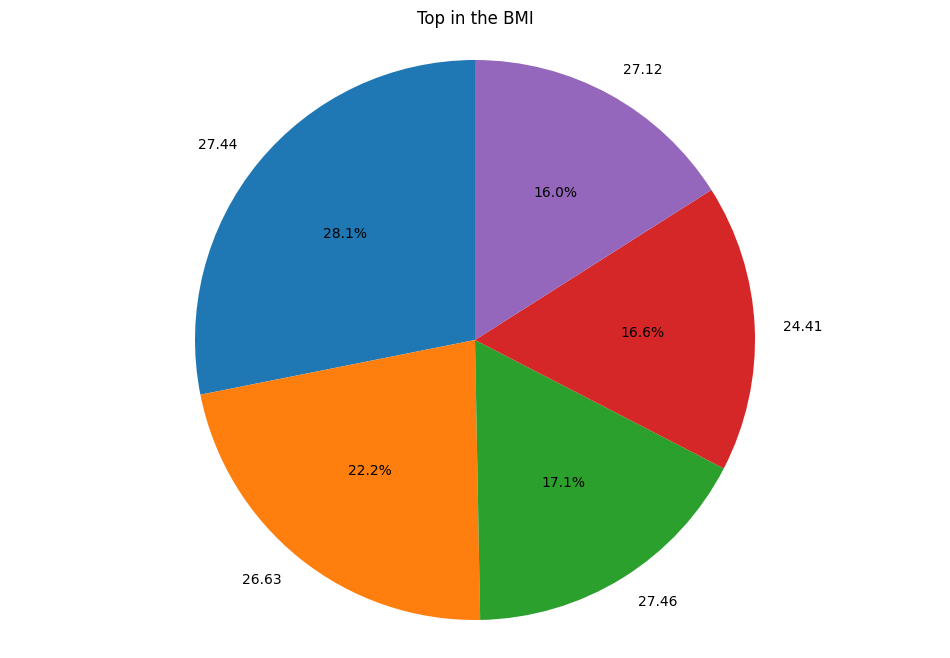

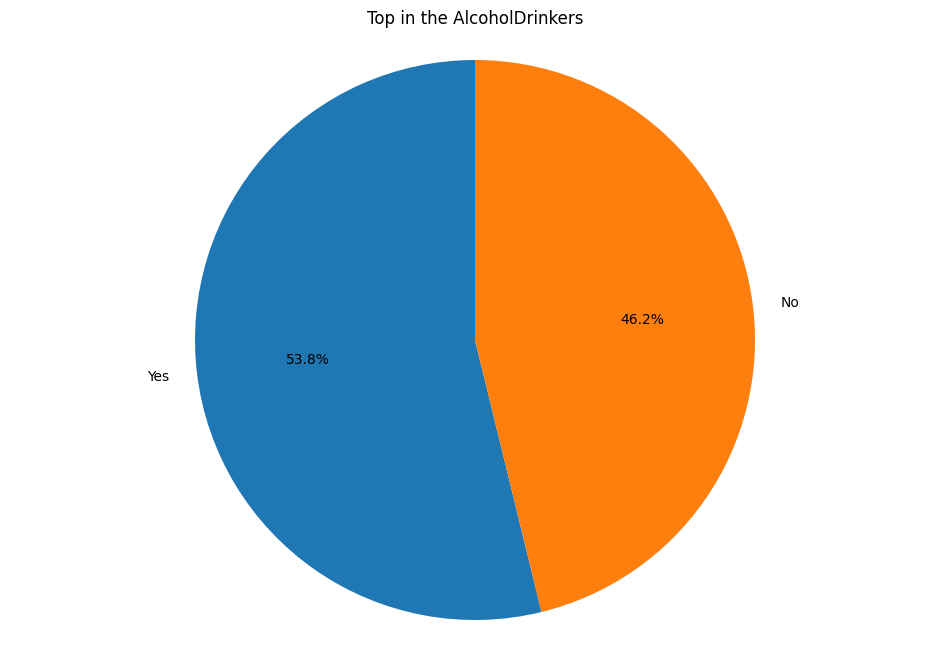

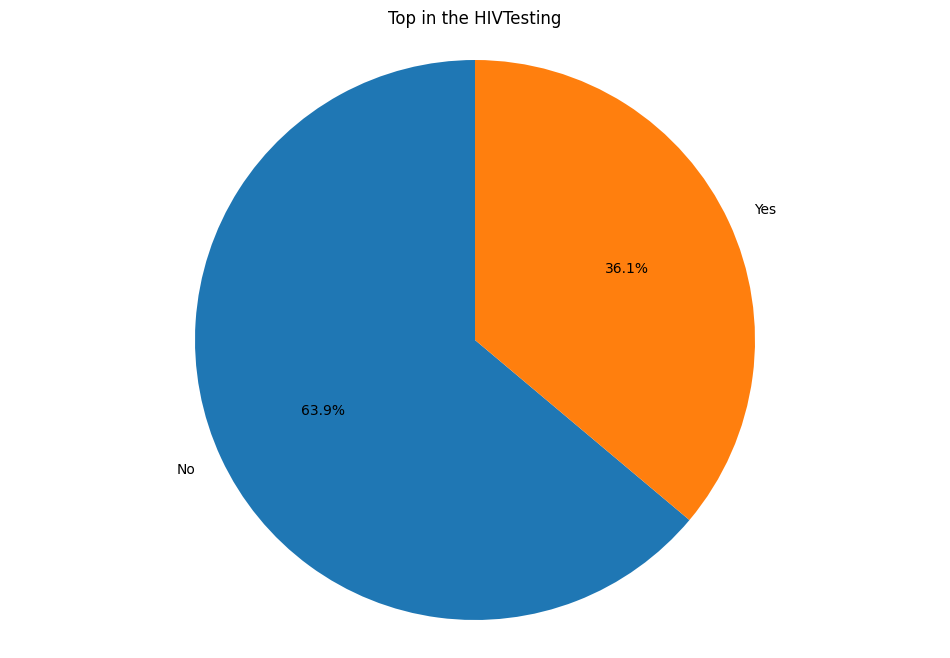

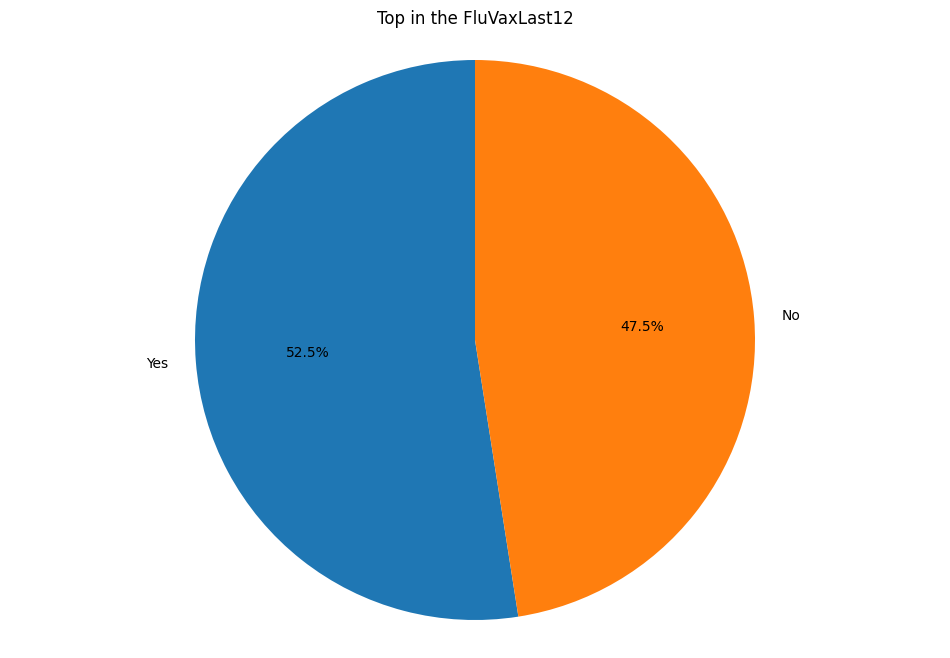

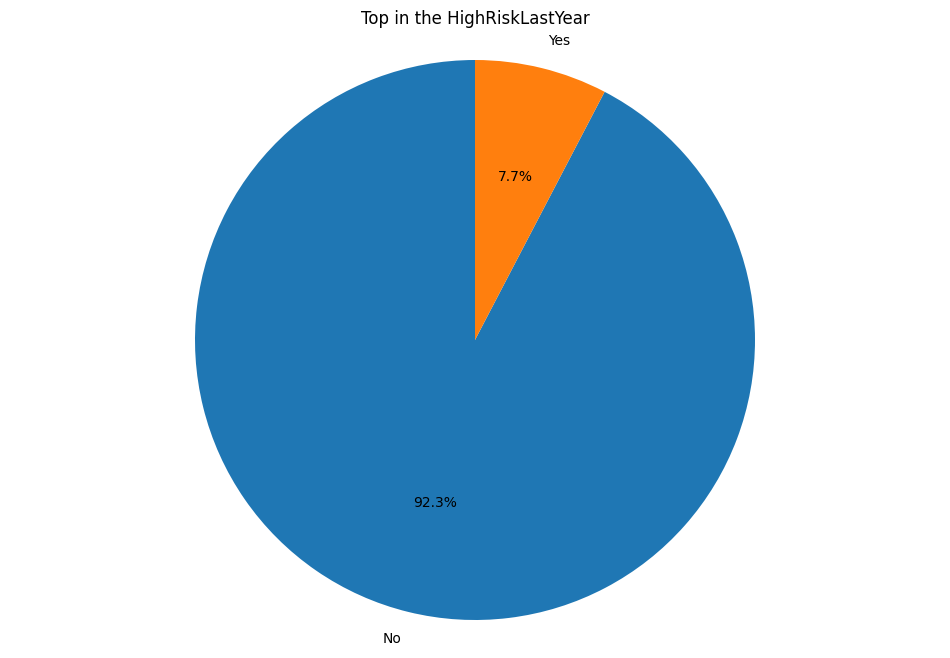

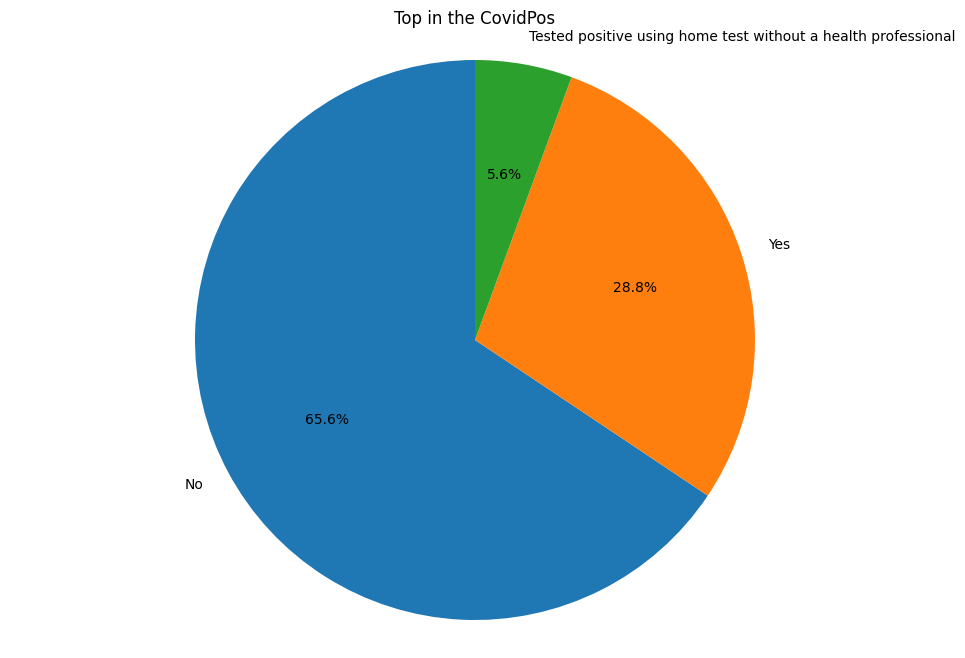

In [78]:
for col in data.columns:

  top = data[col].value_counts().head()
  plt.figure(figsize=(12, 8))
  plt.pie(top, labels=top.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Top in the {col}')
  plt.axis('equal')
  plt.show()

In [79]:
data = data.applymap(lambda x: 1 if x =='Yes' else (0 if x=='No' else x))
data = data.applymap(lambda x: 1 if x =='Male' else (0 if x=='Female' else x))
data.head()

/tmp/ipython-input-480527492.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x =='Yes' else (0 if x=='No' else x))
/tmp/ipython-input-480527492.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x =='Male' else (0 if x=='Female' else x))


State  Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1  Alabama    0     Excellent                 0.0               0.0   
2  Alabama    0     Very good                 2.0               3.0   
4  Alabama    0          Fair                 2.0               0.0   
5  Alabama    1          Poor                 1.0               0.0   
6  Alabama    0     Very good                 0.0               0.0   

                                     LastCheckupTime  PhysicalActivities  \
1  Within past 2 years (1 year but less than 2 ye...                   0   
2  Within past year (anytime less than 12 months ...                   1   
4  Within past year (anytime less than 12 months ...                   1   
5  Within past year (anytime less than 12 months ...                   0   
6  Within past year (anytime less than 12 months ...                   1   

   SleepHours            RemovedTeeth  HadHeartAttack  ...  \
1         6.0                     All               0  ...   
2         5.0                  1 to 5               0  ...   
4         9.0  6 or more, but not all               0  ...   
5         7.0                  1 to 5               1  ...   
6         7.0                     All               0  ...   

      RaceEthnicityCategory      AgeCategory  HeightInMeters  \
1  White only, Non-Hispanic  Age 80 or older            1.60   
2  White only, Non-Hispanic     Age 55 to 59            1.57   
4  White only, Non-Hispanic     Age 40 to 44            1.57   
5  White only, Non-Hispanic  Age 80 or older            1.80   
6  Black only, Non-Hispanic  Age 80 or older            1.65   

   WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
1              68.04  26.57                0           0             0   
2              63.50  25.61                0           0             0   
4              53.98  21.77                1           0             0   
5              84.82  26.08                0           0             0   
6              62.60  22.96                1           0             0   

  HighRiskLastYear  CovidPos  
1                0         0  
2                0         1  
4                0         0  
5                0         0  
6                0         0  

[5 rows x 38 columns]

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382377 entries, 1 to 445131
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      382377 non-null  object 
 1   Sex                        382377 non-null  int64  
 2   GeneralHealth              382377 non-null  object 
 3   PhysicalHealthDays         374402 non-null  float64
 4   MentalHealthDays           375981 non-null  float64
 5   LastCheckupTime            382377 non-null  object 
 6   PhysicalActivities         382377 non-null  int64  
 7   SleepHours                 378852 non-null  float64
 8   RemovedTeeth               382377 non-null  object 
 9   HadHeartAttack             382377 non-null  int64  
 10  HadAngina                  382377 non-null  int64  
 11  HadStroke                  382377 non-null  int64  
 12  HadAsthma                  382377 non-null  int64  
 13  HadSkinCancer              382377 

In [81]:
data['HadHeartAttack'].unique()

array([0, 1])

In [82]:
data['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [83]:
data['CovidPos'].unique()

array([0, 1,
       'Tested positive using home test without a health professional'],
      dtype=object)

In [84]:
data = data[data['CovidPos'] != 'Tested positive using home test without a health professional']


In [85]:
data.drop(['RemovedTeeth', 'LastCheckupTime','State'], axis=1, inplace=True)


In [87]:
# Make labelEncoding

object_cols = ['HadDiabetes','GeneralHealth','CovidPos','ECigaretteUsage','AgeCategory','SmokerStatus','RaceEthnicityCategory' ]

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].astype(str)
        data[col] = le.fit_transform(data[col])
    else:
        data[col] = le.fit_transform(data[col])

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360952 entries, 1 to 445131
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Sex                        360952 non-null  int64
 1   GeneralHealth              360952 non-null  int64
 2   PhysicalHealthDays         360952 non-null  int64
 3   MentalHealthDays           360952 non-null  int64
 4   PhysicalActivities         360952 non-null  int64
 5   SleepHours                 360952 non-null  int64
 6   HadHeartAttack             360952 non-null  int64
 7   HadAngina                  360952 non-null  int64
 8   HadStroke                  360952 non-null  int64
 9   HadAsthma                  360952 non-null  int64
 10  HadSkinCancer              360952 non-null  int64
 11  HadCOPD                    360952 non-null  int64
 12  HadDepressiveDisorder      360952 non-null  int64
 13  HadKidneyDisease           360952 non-null  int64
 14  HadArthri

In [89]:
data.corr()['HadHeartAttack'].sort_values(ascending=False)


HadHeartAttack               1.000000
HadAngina                    0.445474
HadStroke                    0.182953
AgeCategory                  0.177956
ChestScan                    0.160603
DifficultyWalking            0.160142
HadCOPD                      0.138293
PhysicalHealthDays           0.133354
HadArthritis                 0.121284
HadKidneyDisease             0.113824
DeafOrHardOfHearing          0.101271
HadDiabetes                  0.100318
DifficultyErrands            0.087778
DifficultyDressingBathing    0.078946
BlindOrVisionDifficulty      0.075128
Sex                          0.070768
HadSkinCancer                0.052905
DifficultyConcentrating      0.048886
FluVaxLast12                 0.046890
WeightInKilograms            0.036985
BMI                          0.030560
MentalHealthDays             0.026852
RaceEthnicityCategory        0.025876
HadDepressiveDisorder        0.024918
HadAsthma                    0.024169
HeightInMeters               0.021418
SleepHours                   0.016715
HIVTesting                  -0.012976
HighRiskLastYear            -0.016567
ECigaretteUsage             -0.017057
CovidPos                    -0.019446
GeneralHealth               -0.022102
AlcoholDrinkers             -0.070763
SmokerStatus                -0.074695
PhysicalActivities          -0.084013
Name: HadHeartAttack, dtype: float64

# **Heatmap**

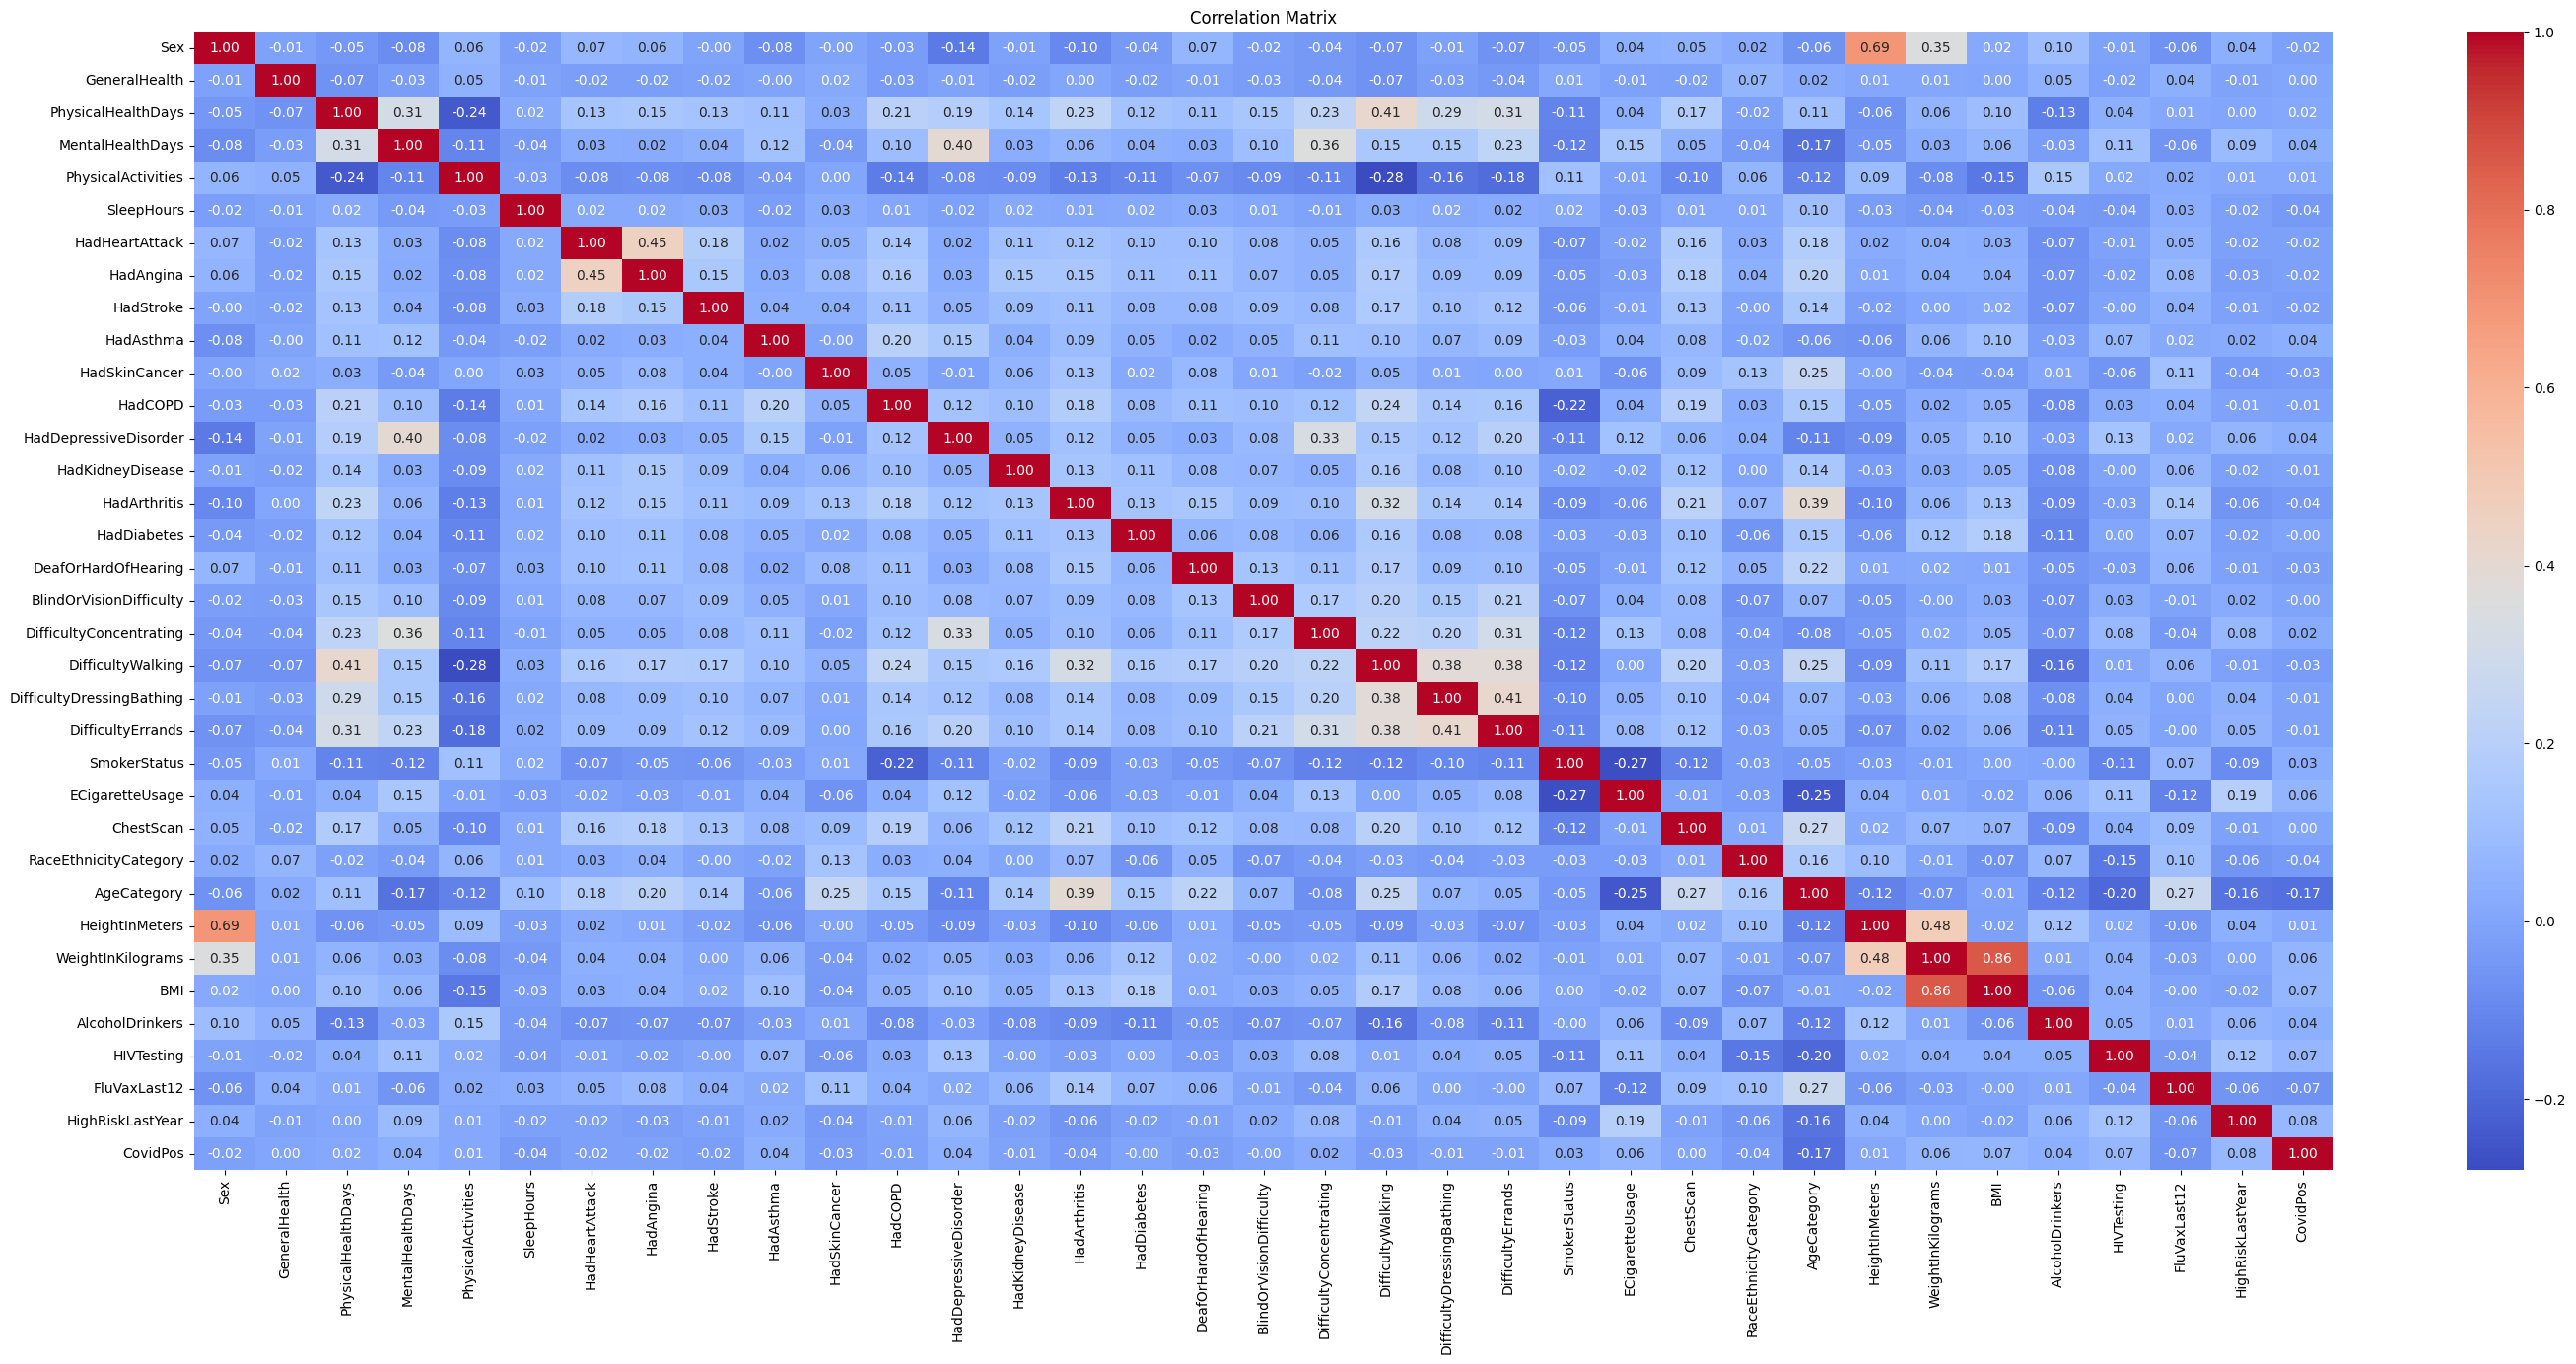

In [90]:
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(35,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [91]:
data.head()

Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1    0              0                   0                 0   
2    0              4                   2                 3   
4    0              1                   2                 0   
5    1              3                   1                 0   
6    0              4                   0                 0   

   PhysicalActivities  SleepHours  HadHeartAttack  HadAngina  HadStroke  \
1                   0           5               0          0          0   
2                   1           4               0          0          0   
4                   1           8               0          0          0   
5                   0           6               1          0          1   
6                   1           6               0          0          0   

   HadAsthma  ...  RaceEthnicityCategory  AgeCategory  HeightInMeters  \
1          0  ...                      4           12              51   
2          0  ...                      4            7              48   
4          0  ...                      4            4              48   
5          0  ...                      4           12              71   
6          0  ...                      0           12              56   

   WeightInKilograms   BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
1                131  1161                0           0             0   
2                116  1074                0           0             0   
4                 85   708                1           0             0   
5                184  1116                0           0             0   
6                113   821                1           0             0   

   HighRiskLastYear  CovidPos  
1                 0         0  
2                 0         1  
4                 0         0  
5                 0         0  
6                 0         0  

[5 rows x 35 columns]

# **Remove outliers**

In [92]:
def remove_outliers(data):
    numeric_cols = data.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if col == 'HadHeartAttack':
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

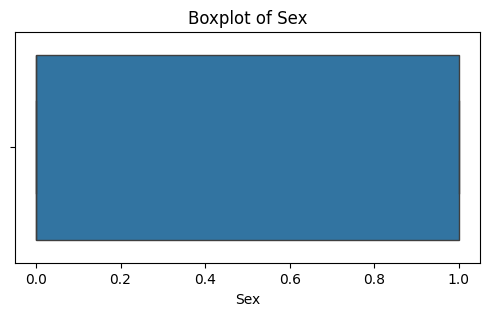

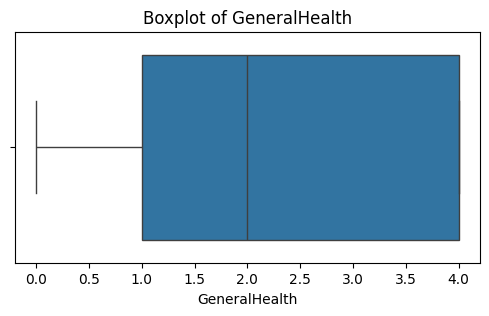

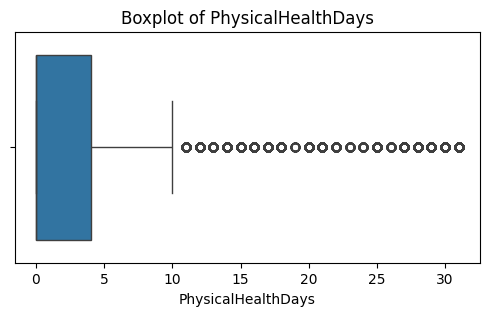

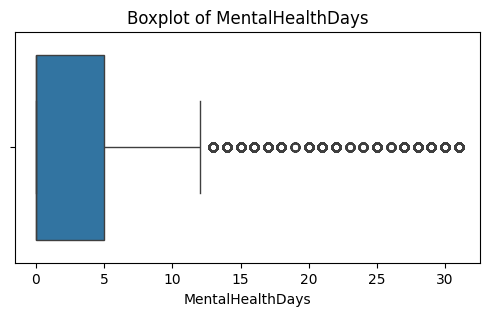

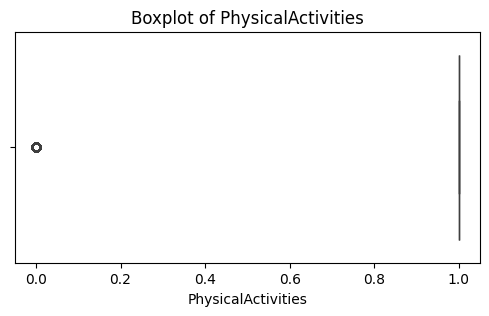

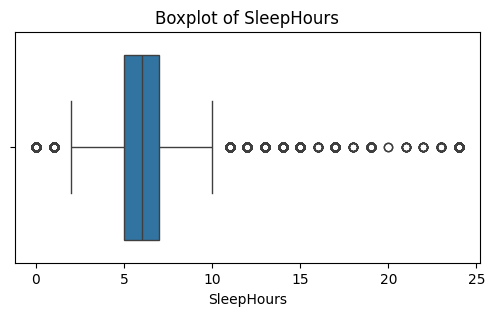

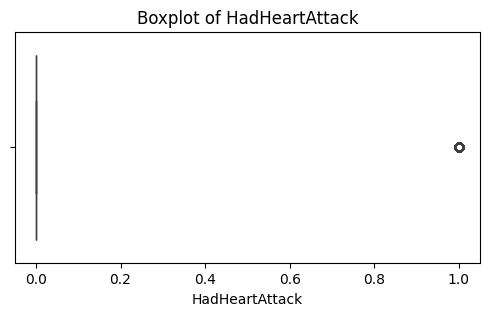

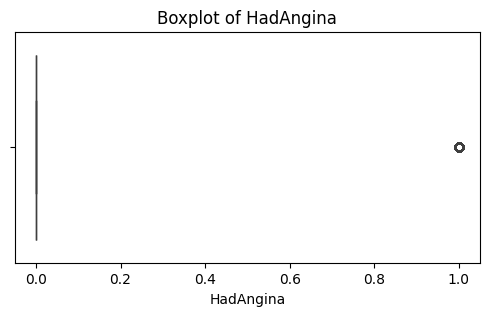

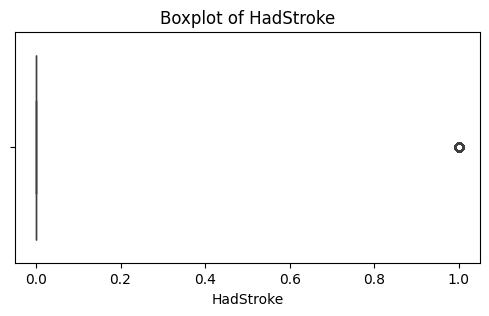

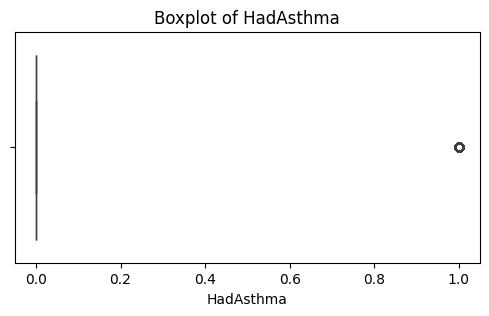

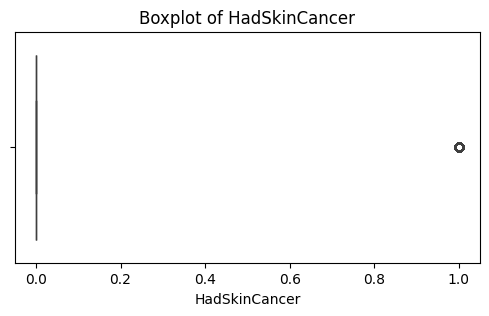

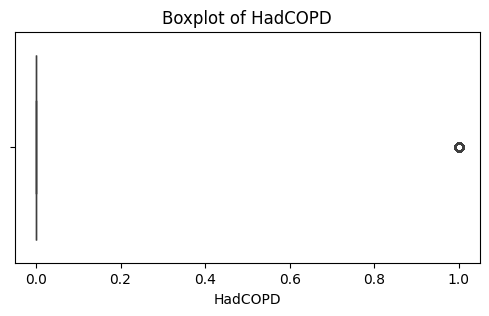

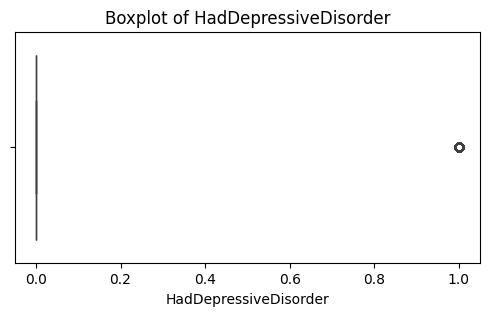

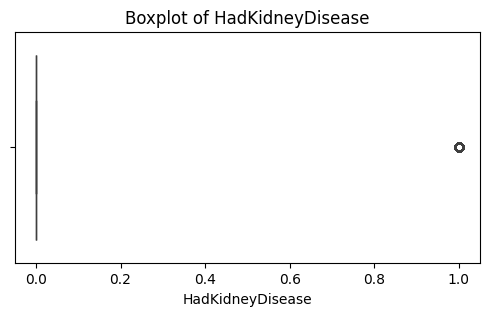

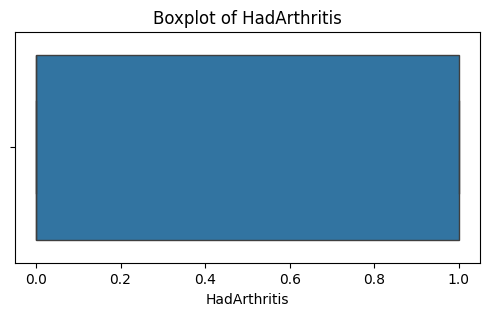

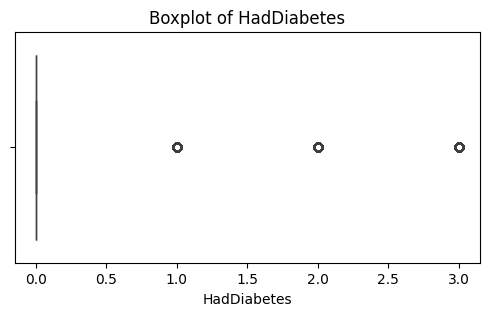

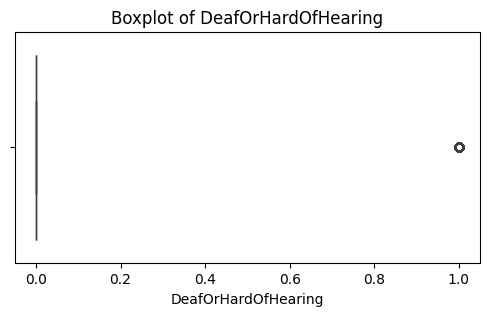

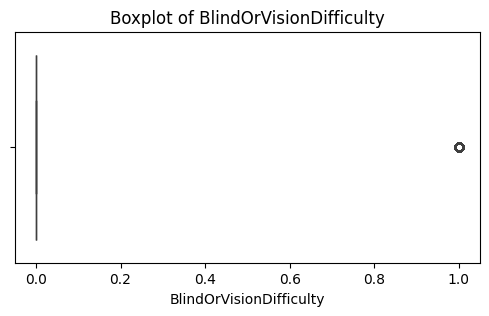

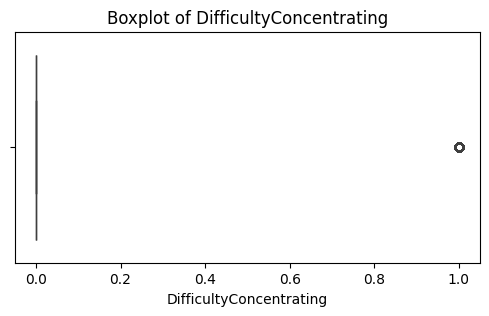

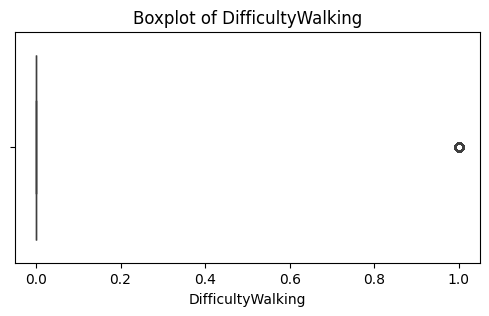

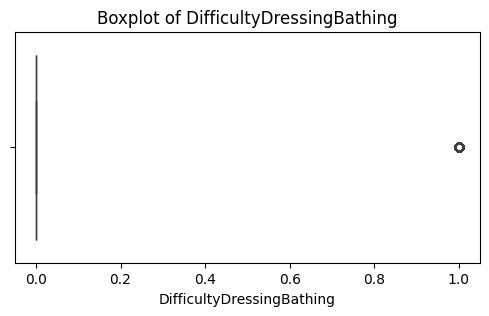

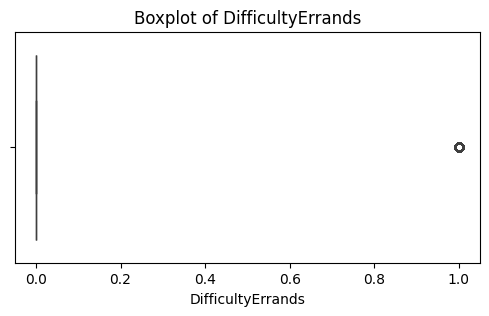

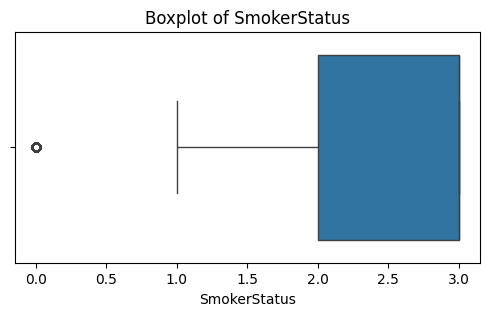

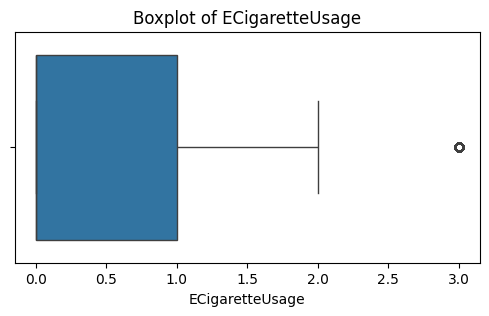

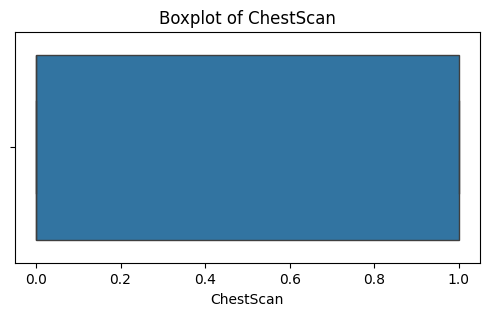

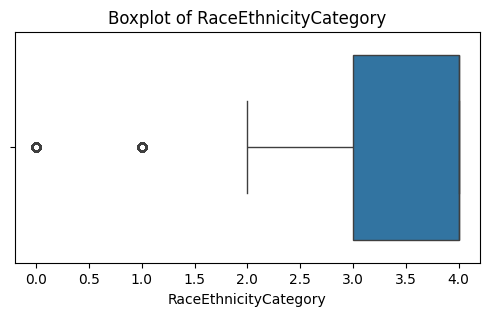

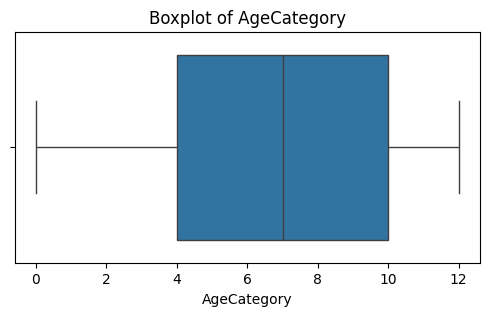

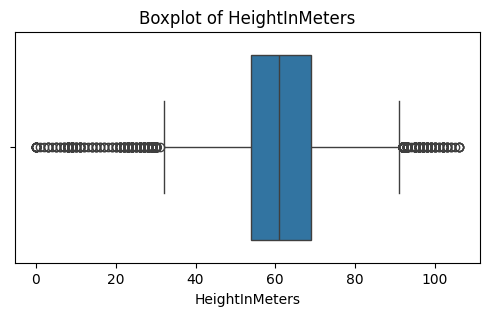

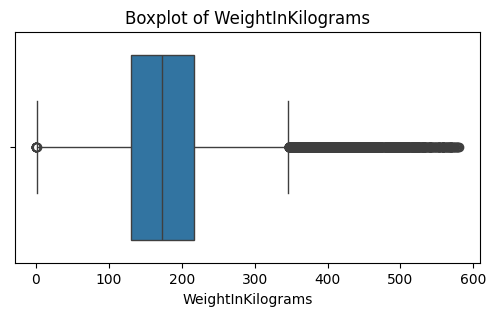

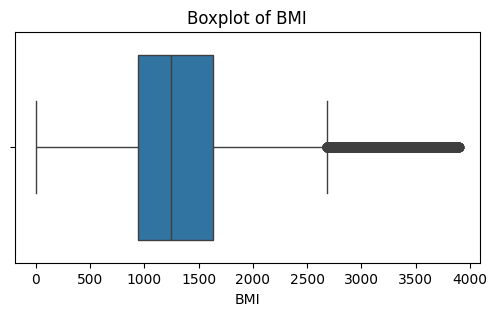

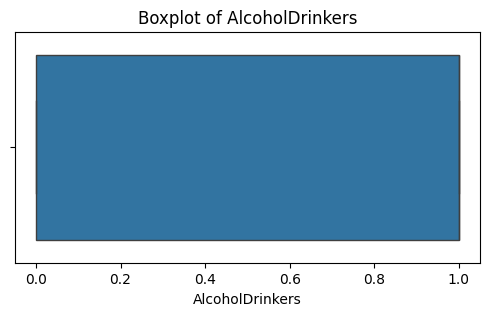

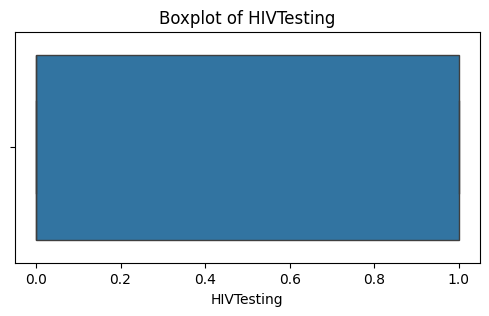

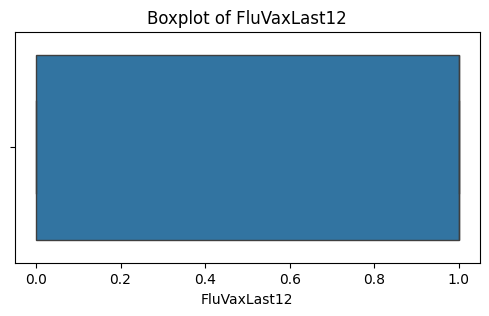

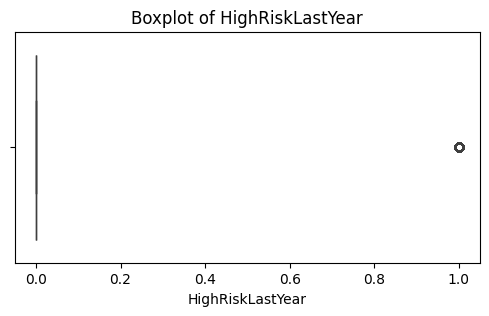

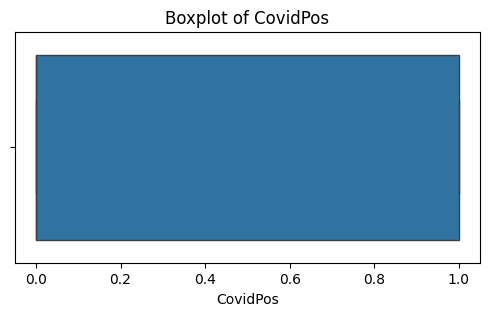

In [93]:
# Draw boxplot for the column
for col in data:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# **Model**

In [94]:
data['HadHeartAttack'] = data['HadHeartAttack'].abs()


In [95]:
x = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [99]:
y_train.unique()

array([0, 1])

In [100]:
y_test.nunique()

2

### **StandardScaler**

In [106]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training and train
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

# **Supervised Learning**

### **Logistic Regression**

In [119]:
# Create a Logistic Regression model

logistic_model = LogisticRegression(
                                     max_iter=1000,
                                     penalty='l2',
                                     C=3,
                                     solver='lbfgs',
                                     class_weight='balanced',
                                     random_state=42
                                     )


logistic_model.fit(x_train, y_train)

# predictions
y_pred_log = logistic_model.predict(x_test)
y_pred_train_log = logistic_model.predict(x_train)

# Accuracy
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_log):.6%}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.6%}")


Train Accuracy: 83.769969%
Accuracy: 83.967531%


In [120]:
# Print classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     68136
           1       0.22      0.74      0.34      4055

    accuracy                           0.84     72191
   macro avg       0.60      0.79      0.62     72191
weighted avg       0.94      0.84      0.88     72191



### **Decision Tree**

In [118]:
# Create a Decision Tree Classifier

data_tree = DecisionTreeClassifier(

    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=15,
    class_weight='balanced'

)

# Train the model
data_tree.fit(x_train, y_train)

# predictions
y_pred_dt = data_tree.predict(x_test)

print(f"Train Accuracy: {data_tree.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {data_tree.score(x_test, y_test):.2%}")


Train Accuracy: 90.05%
Test Accuracy: 85.60%


### **Bagging**

In [121]:
# BaggingClassifier with DecisionTree
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
    n_estimators=60,
    random_state=42
)

# Train the Bagging
bag.fit(x_train, y_train)

# Evaluate the model on training and testing sets
print("Bagging Train:", accuracy_score(y_train, bag.predict(x_train)))
print("Bagging Test:", accuracy_score(y_test, bag.predict(x_test)))

Bagging Train: 0.9510979668307008
Bagging Test: 0.9467662173955202


### **Random Forest**

In [122]:
# the RandomForestClassifier
model_ron = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=12,
    n_jobs=-1
)

# Train the model
model_ron.fit(x_train, y_train)

# Predict on the test and train
y_pred = model_ron.predict(x_test)
y_pred_train = model_ron.predict(x_train)

# Print accuracy
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 0.9415779831763985
Test Accuracy: 0.9172473022952999


### **K-Nearest Neighbors**

In [123]:
# Create a Knn model

knn_model = KNeighborsClassifier(
                                  n_neighbors=5,
                                  n_jobs=-1
                                  )

# train
knn_model.fit(x_train, y_train)

# predictions
y_pred_knn = knn_model.predict(x_train)
y_pred_test = knn_model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train, y_pred_knn):.4f}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')

Train Accuracy: 0.9540
Test Accuracy: 0.9439


### **XGBoost model**

In [124]:
# Create a XGBoost model

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2%}")

XGBoost Accuracy: 94.69%


### **SVC**

In [125]:
# Create an SVC model
svc_model = SVC()

# Train the model
svc_model.fit(x_train, y_train)

# predictions
y_pred_svc = svc_model.predict(x_test)

# Accuracy
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_svc):.2%}")


SVC Accuracy: 94.77%


In [2]:
import plotly.graph_objects as go

# Create a dataframe to store the results
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Bagging Model','Random Forest', 'XGBoost', 'SVC'],
    'train_acc': [accuracy_score(y_train, logistic_model.predict(x_train)),
                  accuracy_score(y_train, knn_model.predict(x_train)),
                  accuracy_score(y_train, data_tree.predict(x_train)),
                  accuracy_score(y_train, bag.predict(x_train)),
                  accuracy_score(y_train, model_ron.predict(x_train)),
                  accuracy_score(y_train, xgb.predict(x_train)),
                  accuracy_score(y_train, svc_model.predict(x_train))
                  ],

    'test_acc': [accuracy_score(y_test, logistic_model.predict(x_test)),
                 accuracy_score(y_test, knn_model.predict(x_test)),
                 accuracy_score(y_test, data_tree.predict(x_test)),
                 accuracy_score(y_test, bag.predict(x_test)),
                 accuracy_score(y_test, model_ron.predict(x_test)),
                 accuracy_score(y_test, xgb.predict(x_test)),
                 accuracy_score(y_test, svc_model.predict(x_test))
                 ]
}
results_df = pd.DataFrame(results)

# Plot bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=results_df['Model'],
    y=results_df['train_acc'],
    name='Train Accuracy'
))

fig.add_trace(go.Bar(
    x=results_df['Model'],
    y=results_df['test_acc'],
    name='Test Accuracy'
))

fig.update_layout(
    barmode='group',
    title="Train vs Test Accuracy by Model",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    yaxis=dict(range=[0.5, 1.0])
)

fig.show()

In [ ]:
import joblib

models = {
    "logistic": logistic_model,
    "knn": knn_model,
    "decision_tree": data_tree,
    "bagging": bag,
    "random_forest": model_ron,
    "xgboost": xgb,
    "svc": svc_model
}

joblib.dump(models, "all_models.pkl")
print("all_models.pkl")